In [1]:
import sys
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')
import mdot_to_Lbol
import arepo_package
import scipy.interpolate
radiative_efficiency=0.1
total_conv=mdot_to_Lbol.get_conversion_factor_arepo(radiative_efficiency)
import h5py
import illustris_python as il
import numpy 
import pandas as pd
import scipy.integrate
from scipy.optimize import curve_fit
import os
%pylab inline

title_fontsize=30
import warnings
warnings.filterwarnings("ignore")

label_fontsize=40

hubble=0.6771

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')
import mdot_to_Lbol
import arepo_package
import scipy.interpolate
import illustris_python

import scipy.integrate

radiative_efficiency=0.2
total_conv=mdot_to_Lbol.get_conversion_factor_arepo(radiative_efficiency)
import h5py

import warnings
warnings.filterwarnings('ignore')

%pylab inline

colors_res=['#83c995','orange','blue','black']


def show_seeding_histories2(basePath,col,labl='.',width=4,style='solid',nbins=40,cumulative=0,plot=1):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    redshifts_fac=1./scale_fac_complete2-1
    return redshifts_fac


def show_seed_FOFmass(basePath,col,labl='.',width=4,style='solid',nbins=40,cumulative=0):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    redshifts_fac=1./scale_fac_complete2-1

    seed_redshifts=1./scale_fac_complete2-1.
    mask=(seed_redshifts>redshift_cut)
    return FOFDMmass_complete2[mask]*1e10
 
    

def show_seed_SFGmass(basePath,col,labl='.',width=4,style='solid',nbins=40,cumulative=0):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    redshifts_fac=1./scale_fac_complete2-1

    seed_redshifts=1./scale_fac_complete2-1.
    mask=(seed_redshifts>redshift_cut)
    return FOFStarFormingGasMass_complete2[mask]*1e10


def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0,explicit_bins=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    if(explicit_bins==0):
        HM_bin=numpy.arange(0,6)-0.5
    
        
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)
    return centers,HMF/norm,dHMF/norm

def show_seeding_halomass2(basePath,labl='.',width=4,style='solid',nbins=40,offset=0):
    #nbins=40
    scale_fac_complete2,BH_id_complete2,density_complete2,metallicity_complete2,SFR_complete2,FOFDMmass_complete2,indexmaxdens_complete2,file_id_complete2,FOFStarFormingGasMass_complete2,FOFStarFormingGasMetallicity_complete2,N_empty=arepo_package.get_seeding_events2(basePath)
    #scale_fac_complete,BH_id_complete,density_complete,metallicity_complete,SFR_complete,FOFDMmass_complete,indexmaxdens_complete,FOFTask_complete, file_id_complete,N_empty=arepo_package.get_seeding_events(basePath)
    #scale_fac_complete,BH_id_complete,density_complete,metallicity_complete,SFR_complete,FOFDMmas
    redshifts_fac=1./scale_fac_complete2-1
    print("No of seeds formed:", len(redshifts_fac[redshifts_fac>0]))
    #obj=ax
    seed_redshifts=1./scale_fac_complete2-1.
    mask=(seed_redshifts>redshift_cut)
    print(FOFDMmass_complete2[mask]) 
    return FOFDMmass_complete2




def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    return centers,HMF/norm,dHMF/norm


def get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete_sorted,primary_mass_sorted,secondary_mass_sorted,primary_id_sorted,secondary_id_sorted,file_id_complete_sorted,N_empty=arepo_package.get_merger_events_from_snapshot(basePath,upto_redshift,HOSTS=0)
    mass_ratio=secondary_mass_sorted/primary_mass_sorted
    #print(mass_ratio[mass_ratio>1.])
        #print(primary_mass_sorted,secondary_mass_sorted)
    merger_redshifts=1./scale_fac_complete_sorted-1.
    
    #print(merger_redshifts)
    
    #print("###",primary_mass_sorted)
    mask_primary=primary_mass_sorted>=mass_cut/1e10
    mask_secondary=secondary_mass_sorted>=mass_cut/1e10
    mask_total_mass=(primary_mass_sorted+secondary_mass_sorted)>=total_mass_cut/1e10
    mask_redshift=merger_redshifts>=redshift_cut
    mask_ratio_cut=mass_ratio>=mass_ratio_cut
    mask=((mask_primary&mask_secondary)&(mask_redshift&mask_ratio_cut))&mask_total_mass
    merger_redshifts=merger_redshifts[mask]
  
    #print("!!!",merger_redshifts)
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
 
    dist*=counts_sum

    dist_err*=counts_sum
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
    

    dz=numpy.diff(bins)[0]
    #print("!!!",dist)    
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt


def get_merger_distributions_hosts(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete,BH_id_primary,BH_mass_primary,hosthalomass_primary,hosthalostellarmass_primary,hosthalogasmass_primary,hosthalodmmass_primary,BH_id_secondary,BH_mass_secondary,hosthalomass_secondary,hosthalostellarmass_secondary,hosthalogasmass_secondary,hosthalodmmass_secondary,file_id_complete=arepo_package.get_merger_events_hosts(basePath,HDF5=1)        #print(primary_mass_sorted,secondary_mass_sorted)
    mass_ratio=BH_id_secondary/BH_mass_primary
    mask_ratio_cut=mass_ratio>mass_ratio_cut
    merger_redshifts=1./scale_fac_complete-1.
    #print("###",BH_mass_primary)
    mask_primary=BH_mass_primary>mass_cut/1e10
    mask_secondary=BH_mass_secondary>mass_cut/1e10
    mask_total_mass=(BH_mass_primary+BH_mass_secondary)>total_mass_cut/1e10
    mask_redshift=merger_redshifts>redshift_cut
    mask=((mask_primary&mask_secondary)&(mask_redshift&mask_ratio_cut))&mask_total_mass
    
    maskhost1=hosthalomass_primary+hosthalomass_secondary>14.2e10/1e10*h
    maskhost2=hosthalomass_primary>7.1e10/1e10*h
    maskhost3=hosthalodmmass_primary>2e9/1e10*h
    maskhost4=hosthalodmmass_secondary>2e9/1e10*h
    maskhost5=hosthalostellarmass_primary>1e8/1e10*h   
    maskhost6=hosthalostellarmass_secondary>1e8/1e10*h
    
    if(apply_host_cuts==0):
        maskhost=mask
    else:
        maskhost=((((maskhost1&maskhost2)&maskhost3)&maskhost4)&maskhost5)&maskhost6
    
    
    merger_redshifts=merger_redshifts[mask&maskhost]
    
    #print("!!!",merger_redshifts)
    
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
    
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
     
    
    dz=numpy.diff(bins)[0]
    #print("!!!",dist)
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt

def get_merger_rate(basePath, nbins, min_value,max_value,ZOOM=0,HDF5=0,input_simulation_boxsize_in_Mpch=1.,path_to_hdf5='.',GasFractionCut=0.1,hosts=0):
    Mpc_to_kpc=1000
    if (hosts):
        bins,dist,dist_err,norm,dz_dt=get_merger_distributions_hosts(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5=path_to_hdf5)
    else:
        bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5=path_to_hdf5)
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])
    if ZOOM:
        if (HDF5):
            simulation_volume=input_simulation_boxsize_in_Mpch**3
        else:
            output_redshifts,high_res_volumes,total_volumes=numpy.load(basePath+'/zoom_volumes_high_res_fraction_cut_%.2f.npy'%(GasFractionCut),allow_pickle=True)
            #print(output_redshifts,high_res_volumes)
            mask=high_res_volumes>0 
            get_volume=scipy.interpolate.interp1d(output_redshifts[mask],high_res_volumes[mask],fill_value='extrapolate')
            simulation_volume=get_volume(bins)
            print("Simulation volumes are:", simulation_volume)
    else:
        if (HDF5):
            simulation_volume=input_simulation_boxsize_in_Mpch**3
        else:
            simulation_volume=(arepo_package.get_box_size(basePath)/Mpc_to_kpc)**3
            print("Simulation volumes are:", simulation_volume)
        
    
    merger_rate=dist*1.
    merger_rate_err=dist_err*1
    
    merger_rate*=dz_dt
    merger_rate_err*=dz_dt
    
    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell
    
    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    return bins, dist, dist_err, merger_rate, merger_rate_err 


def make_LF(basePath, desired_redshift,col,mstyle,lstyle,obj,labl='.',make_scatter=1,ZOOM=0,alph=1,lwidth=3,offset=0):

    DM1Pos,output_redshift=arepo_package.get_particle_property(basePath,'Coordinates',1,desired_redshift)
    COM=numpy.average(DM1Pos,axis=0)
    
    GroupBHMdot,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mdot',5,desired_redshift)
    GroupBHMdot=GroupBHMdot*total_conv
    #print(output_redshift)

    GroupBHMass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',5,desired_redshift)
    GroupBHMass=GroupBHMass*1e10

    
    Coordinates,output_redshift=arepo_package.get_particle_property(basePath,'Coordinates',5,desired_redshift)
    dist=numpy.sqrt(numpy.sum((Coordinates-COM)**2,axis=1))
      
    #GroupBHMdot=numpy.array([convert_mdot_to_Lbol(mdot,mass,radiative_efficiency,1) for mdot,mass in zip(GroupBHMdot,GroupBHMass)])

    
    if (ZOOM==1):
        mask_pos=dist<max_dist
        mask=mask_pos
        GroupBHMdot=GroupBHMdot[mask]
        GroupBHMass=GroupBHMass[mask]
        mask2=GroupBHMass>10**logmasscutov

        N_space= numpy.array([len(GroupBHMdot[mask2&(GroupBHMdot>10**loglumcut)]) for loglumcut in loglumcut_space]) 
        #print(N_space)
        obj.errorbar(loglumcut_space[N_space>0]+offset,N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl,linestyle=lstyle);           
    else:   
        mask1=GroupBHMdot>10**loglumcut
        mask2=GroupBHMass>10**logmasscutov

        N_space= numpy.array([len(GroupBHMdot[mask2&(GroupBHMdot>10**loglumcut)]) for loglumcut in loglumcut_space]) 
        obj.errorbar(loglumcut_space[N_space>0]+offset,N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl,linestyle=lstyle);
  
    #mask=GroupBHMass>0
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,alpha=1);
 
      

    #mask=(GroupLen>100)&(GroupBHMass>0)
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,label=labl);

    #print("Output_redshift is:",output_redshift)
    
    #median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)
    #obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=3,color=col,linestyle=lstyle,label=labl);
    #obj.set_xlim(3.5,12)
    obj.set_ylim(1e-1,1e3)
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    obj.set_yscale('log')
    obj.tick_params(labelsize=40)

def make_MF(basePath, desired_redshift,col,mstyle,lstyle,obj,labl='.',make_scatter=1,ZOOM=0,alph=1,lwidth=3):
    
    DM1Pos,output_redshift=arepo_package.get_particle_property(basePath,'Coordinates',1,desired_redshift)
    COM=numpy.average(DM1Pos,axis=0)
    
    GroupBHMass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',5,desired_redshift)
    GroupBHMass=GroupBHMass*1e10
    
    Coordinates,output_redshift=arepo_package.get_particle_property(basePath,'Coordinates',5,desired_redshift)
    dist=numpy.sqrt(numpy.sum((Coordinates-COM)**2,axis=1))


    if (ZOOM==1):
        
        mask_pos=dist<max_dist
        mask=mask_pos
       # GroupBHMdot=GroupBHMdot[mask]
        GroupBHMass=GroupBHMass[mask]
     
        N_space= numpy.array([len(GroupBHMass[GroupBHMass>10**logmasscut]) for logmasscut in logmasscut_space]) 
        print(N_space)
        obj.errorbar(logmasscut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);           
    else:    
        N_space= numpy.array([len(GroupBHMass[GroupBHMass>10**logmasscut]) for logmasscut in logmasscut_space]) 
        obj.errorbar(logmasscut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);
  
    #mask=GroupBHMass>0
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,alpha=1);
 
      

    #mask=(GroupLen>100)&(GroupBHMass>0)
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,label=labl);

    print("Output_redshift is:",output_redshift)
    
    #median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)
    #obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=3,color=col,linestyle=lstyle,label=labl);
    #obj.set_xlim(3.5,12)
    obj.set_ylim(1e-1,1e3)
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    obj.set_yscale('log')
    return logmasscut_space,N_space,numpy.sqrt(N_space)


def make_MF_group(basePath, desired_redshift,col,mstyle,lstyle,obj,labl='.',make_scatter=1,ZOOM=0,alph=1,lwidth=3):
    
    GroupMassType,output_redshift=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
    GroupLenType,output_redshift=arepo_package.get_group_property(basePath,'GroupLenType',desired_redshift)
    
    GroupMass1=GroupMassType[:,1]
    GroupMass2=GroupMassType[:,2]
    
    LowResFraction=GroupMass2/(GroupMass1+GroupMass2)
    
    GroupLen=GroupLenType[:,4]
    GroupMass=GroupMassType[:,4]
    #print(GroupLen)
    GroupBHMass,output_redshift=arepo_package.get_group_property(basePath,'GroupBHMass',desired_redshift)
    GroupMass*=1e10
    GroupBHMass*=1e10

    if (ZOOM==1):
        mask=LowResFraction<0.1
        GroupBHMass=GroupBHMass[mask]    
        N_space= numpy.array([len(GroupBHMass[GroupBHMass>10**logmasscut]) for logmasscut in logmasscut_space]) 
        print(N_space)
        obj.errorbar(logmasscut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);           
    else:    
        N_space= numpy.array([len(GroupBHMass[GroupBHMass>10**logmasscut]) for logmasscut in logmasscut_space]) 
        obj.errorbar(logmasscut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);
  
    #mask=GroupBHMass>0
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,alpha=1);
 
      

    #mask=(GroupLen>100)&(GroupBHMass>0)
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,label=labl);

    print("Output_redshift is:",output_redshift)
    
    #median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)
    #obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=3,color=col,linestyle=lstyle,label=labl);
    #obj.set_xlim(3.5,12)
    obj.set_ylim(1e-1,1e3)
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    obj.set_yscale('log')

    


def make_LF_group(basePath, desired_redshift,col,mstyle,lstyle,obj,labl='.',make_scatter=1,ZOOM=0,alph=1,lwidth=3):
    
    GroupMassType,output_redshift=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
    GroupLenType,output_redshift=arepo_package.get_group_property(basePath,'GroupLenType',desired_redshift)
    
    GroupMass1=GroupMassType[:,1]
    GroupMass2=GroupMassType[:,2]
    
    LowResFraction=GroupMass2/(GroupMass1+GroupMass2)
    
    GroupLen=GroupLenType[:,4]
    GroupMass=GroupMassType[:,4]
    #print(GroupLen)
    GroupBHMdot,output_redshift=arepo_package.get_group_property(basePath,'GroupBHMdot',desired_redshift)
    GroupBHMdot=GroupBHMdot*total_conv

    GroupBHMass,output_redshift=arepo_package.get_group_property(basePath,'GroupBHMass',desired_redshift)
    GroupBHMass=GroupBHMass*1e10
    
    if (ZOOM==1):
        mask=LowResFraction<0.1
        GroupBHMdot=GroupBHMdot[mask]
        GroupBHMass=GroupBHMass[mask]
    
        mask2=GroupBHMass>10**logmasscutov

        N_space= numpy.array([len(GroupBHMdot[mask2&(GroupBHMdot>10**loglumcut)]) for loglumcut in loglumcut_space]) 
        #print(N_space)
        obj.errorbar(loglumcut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);           
    else:   
        mask1=GroupBHMdot>10**loglumcut
        mask2=GroupBHMass>10**logmasscutov

        N_space= numpy.array([len(GroupBHMdot[mask2&(GroupBHMdot>10**loglumcut)]) for loglumcut in loglumcut_space]) 
        obj.errorbar(loglumcut_space[N_space>0],N_space[N_space>0],numpy.sqrt(N_space[N_space>0]),ms=20,linewidth=lwidth,color=col,alpha=alph,label=labl);
  
    #mask=GroupBHMass>0
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,alpha=1);
 
      

    #mask=(GroupLen>100)&(GroupBHMass>0)
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,label=labl);

    #print("Output_redshift is:",output_redshift)
    
    #median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)
    #obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=3,color=col,linestyle=lstyle,label=labl);
    #obj.set_xlim(3.5,12)
    obj.set_ylim(1e-1,1e3)
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    obj.set_yscale('log')
    obj.tick_params(labelsize=40)

 
    

from scipy.integrate import quad
global c,h,omm,oml,omk
omk=0
oml=0.6911
omm=0.3089
c=3*10**5
h=0.6771


def DC(z0, z1):
    # Comoving distance in Mpc                                                                                          $
    def integrand(z):
        return 1.0/E(z)
    return c/(100.0)*quad(integrand,z0,z1)[0]

def dx_dz(z):
    # Comoving distance in Mpc                                                                                          $
    def integrand(z):
        return 1.0/E(z)
    return c/(100.0)*integrand(z)


def E(z):
        #normalized hubble parameter                                                                                    $
    return np.sqrt(omm*(1.0+z)**3 + oml + omk*(1.0+z)**2)

def DL(z):
    #Luminosity distance in Mpcs                                                                                        $
    return (1.0+z)*DC(0,z)

def DM(z):
        #Distance Modulus                                                                                               $
        return 5*np.log10((DL(z)*1e6)/10.0)

def mtoM(m,z):
    return m - DM(z) - K(z)

def Mtom(M, z):
    return M + DM(z) + K(z)

def LtoM(L):
    M = -2.5 * np.log10(L*1e-7)+34.1
    return M

def MtoL(M):
    return 10**((-1/2.5*(M-34.1)))*1e7

def K(z):
    #K correction, assuming same filter size in emitted and observed frame                                              $
    return 2.5*np.log10(1.0/(1+z))

def T(z0,z1):
    sectoyrs=3.171e-08
    Mpctokm=3.0857E+19
    def integrand(z):
        return 1.0/E(z)/(1+z)
    return 1./(100.0)*quad(integrand,z0,z1)[0]*Mpctokm*sectoyrs






Populating the interactive namespace from numpy and matplotlib


In [3]:

def extract_distribution(basePath,d_type=1,proprty='redshift',number_density=1,explicit_bins=0):
    boxsize=arepo_package.get_box_size(basePath)/1e3
    if(d_type==1):
        data=numpy.load(basePath+'/postprocessing/final_group_properties_seed%.2f_min.npy'%LogTargetGroupBHMass)
        unique_LogGroupMass_min_redshift_space=data[0]
        unique_LogGroupStellarMass_min_redshift_space=data[1]
        unique_LogGroupSFR_min_redshift_space=data[2]
        unique_LogGroupSF_min_redshift_space=data[3]
        unique_LogGroupSFMP_min_redshift_space=data[4]
        unique_LogGroupStellarMetallicity_min_redshift_space=data[5]
        unique_LogGroupGasMetallicity_min_redshift_space=data[6]
        unique_min_redshift_space=data[7]

        data=numpy.load(basePath+'/postprocessing/final_group_properties_seed%.2f_max.npy'%LogTargetGroupBHMass)
        unique_LogGroupMass_max_redshift_space=data[0]
        unique_LogGroupStellarMass_max_redshift_space=data[1]
        unique_LogGroupSFR_max_redshift_space=data[2]
        unique_LogGroupSF_max_redshift_space=data[3]
        unique_LogGroupSFMP_max_redshift_space=data[4]
        unique_LogGroupStellarMetallicity_max_redshift_space=data[5]
        unique_LogGroupGasMetallicity_max_redshift_space=data[6]
        unique_max_redshift_space=data[7]

        data=numpy.load(basePath+'/postprocessing/final_group_properties_seed%.2f_target.npy'%LogTargetGroupBHMass)
        unique_LogGroupMass_target_redshift_space=data[0]
        unique_LogGroupStellarMass_target_redshift_space=data[1]
        unique_LogGroupSFR_target_redshift_space=data[2]
        unique_LogGroupSF_target_redshift_space=data[3]
        unique_LogGroupSFMP_target_redshift_space=data[4]
        unique_LogGroupStellarMetallicity_target_redshift_space=data[5]
        unique_LogGroupGasMetallicity_target_redshift_space=data[6]
        unique_target_redshift_space=data[7]

        unique_GroupNeighbors_max_redshift_space,unique_GroupNeighbors_min_redshift_space,unique_GroupNeighbors_target_redshift_space=numpy.load(basePath+'/postprocessing/final_group_neighbors_seed%.2f.npy'%LogTargetGroupBHMass)

        mask=(unique_target_redshift_space>redshift_cut) & (unique_target_redshift_space<redshift_max)
        a,b,c=get_distribution(unique_target_redshift_space,Nbins,minimum,maximum,linear=1,explicit_bins=explicit_bins) 

        norm=boxsize**3
        if(number_density==0):
            norm=scipy.integrate.trapz(b,a) 
        return a,b/norm,c/norm



    
    if(d_type==0):
        scale_fac_complete,BH_id_complete,StellarMass_complete,StellarMetallicity_complete,SFR_complete,FOFDMmass_complete,GasMetallicity_complete,file_id_complete,FOFStarFormingGasMass_complete,FOFStarFormingGasMetallicity_complete,FOFStarFormingMetalFreeGasMass_complete,N_empty,Neighbor,kk=arepo_package.get_seeding_events4(basePath,GET_ENVIRONMENT=1)
        print(len(BH_id_complete),len(numpy.unique(BH_id_complete)))
        redshift_complete=1./scale_fac_complete-1.
        mask=(redshift_complete>redshift_cut)
        x,y=np.unique(BH_id_complete, return_index=True)
        
        print(len(redshift_complete[y]))
        
        if(proprty=='redshift'):
            a,b,c=get_distribution(redshift_complete[y],Nbins,minimum,maximum,linear=1)
        if(proprty=='halomass'):
            a,b,c=get_distribution(numpy.log10(FOFDMmass_complete[y]*1e10),Nbins,minimum,maximum,linear=1)
        if(proprty=='Neighbor'): 
            print(redshift_complete[Neighbor==0],max(redshift_complete))
            a,b,c=get_distribution(Neighbor[y],Nbins,minimum,maximum,linear=1,explicit_bins=explicit_bins)
            
        #norm=scipy.integrate.trapz(b,a)
        norm=boxsize**3
        if(number_density==0):
            norm=scipy.integrate.trapz(b,a) 
        mask=b>0
        return a[mask],b[mask]/norm,c[mask]/norm

        



0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16


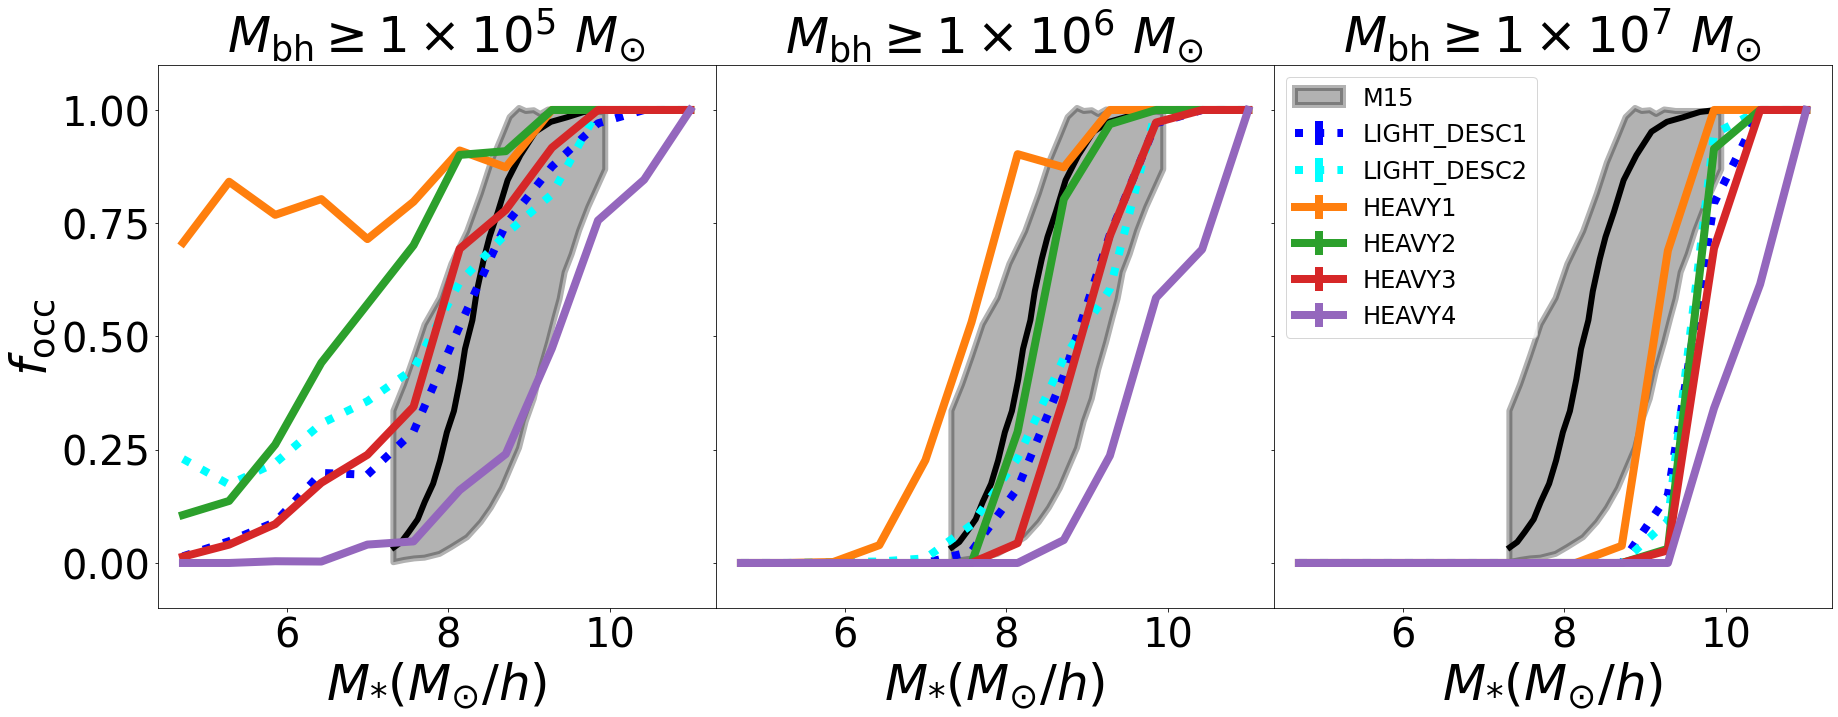

In [3]:
def make_plot(ax1,ax2,ax3,style='solid',col='black',plot1=True,plot2=True,plot3=True,redo=1,width=8):
    
        boxsize=arepo_package.get_box_size(basePath)
        boxsize/=1e3
       
        len1=[]
        len2=[]
        len3=[]

        len1BH=[]
        len2BH=[]
        len3BH=[]
        
        if('L6p25n1024' in basePath):
            subhalo_masscut=1e5
        if('L12p5n512' in basePath):
            subhalo_masscut=64e7
        if('L25n1024' in basePath):
            subhalo_masscut=64e7
        
        
        log_stellar_space=[]
        
        log_stellar_mass_bins=numpy.linspace(3,11,15)
        diff_bin=numpy.diff(log_stellar_mass_bins)[0]
        
        if(os.path.exists(basePath+'/BH_occupation_3.10.npy') & (redo==0)):
            log_stellar_space,len1,len1BH=numpy.load(basePath+'/BH_occupation_3.10_%d.npy'%redshift)
            log_stellar_space,len2,len2BH=numpy.load(basePath+'/BH_occupation_4.10_%d.npy'%redshift)
            log_stellar_space,len3,len3BH=numpy.load(basePath+'/BH_occupation_5.00_%d.npy'%redshift)    
        else:
            SubhaloBHMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',redshift)
            print(redshift,o)
            SubhaloMassType,o=arepo_package.get_subhalo_property(basePath,'SubhaloMassType',redshift) 
            SubhaloMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloMass',redshift) 
            SubhaloStellarMass=SubhaloMassType[:,4]
            LogSubhaloStellarMass= numpy.log10(SubhaloStellarMass*1e10)

            
            for log_stellar_mass in log_stellar_mass_bins:
                try:
                    mask=(LogSubhaloStellarMass > log_stellar_mass-diff_bin/2) & (LogSubhaloStellarMass < log_stellar_mass+diff_bin/2)
                    mask2=SubhaloMass > subhalo_masscut/1e10
                    mask=mask&mask2
                    LogSubhaloStellarMassBin=LogSubhaloStellarMass[mask]
                    SubhaloBHMassBin=SubhaloBHMass[mask]
                    
                    
                    
                    
                    len1BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin/hubble>=mass_cut1/1e10]))
                    len2BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin/hubble>=mass_cut2/1e10]))
                    len3BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin/hubble>=mass_cut3/1e10]))
                    
                    len1.append(len(SubhaloBHMassBin))
                    len2.append(len(SubhaloBHMassBin))
                    len3.append(len(SubhaloBHMassBin))
                    
                    log_stellar_space.append(log_stellar_mass)
                except IOError:
                    aaa=1



            len1=numpy.array(len1)
            len2=numpy.array(len2)
            len3=numpy.array(len3)
            
            len1BH=numpy.array(len1BH)
            len2BH=numpy.array(len2BH)
            len3BH=numpy.array(len3BH)
            log_stellar_space=numpy.array(log_stellar_space)

            numpy.save(basePath+'/BH_occupation_5.00_%d.npy'%redshift,[log_stellar_space,len1,len1BH])
            numpy.save(basePath+'/BH_occupation_6.00_%d.npy'%redshift,[log_stellar_space,len2,len2BH])
            numpy.save(basePath+'/BH_occupation_7.00_%d.npy'%redshift,[log_stellar_space,len3,len3BH])


        if(plot1):
            maskp=len1>0
            #print(log_stellar_space[maskp])
            err= 0*len1BH/len1*(numpy.sqrt(len1BH)/len1BH + numpy.sqrt(len1)/len1)
            ax1.errorbar(log_stellar_space[maskp]+offset,len1BH[maskp]/len1[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot2):
            maskp=len2>0
            err= 0*len2BH/len2*(numpy.sqrt(len2BH)/len2BH + numpy.sqrt(len2)/len2)
            ax2.errorbar(log_stellar_space[maskp]+offset,len2BH[maskp]/len2[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot3):
            maskp=len3>0
        
            err= 0*len3BH/len3*(numpy.sqrt(len3BH)/len3BH + numpy.sqrt(len3)/len3)
            ax3.errorbar(log_stellar_space[maskp]+offset,len3BH[maskp]/len3[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(ii==2):
            ax1.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax2.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax3.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
        
        ax1.tick_params(labelsize=40)
       # ax1.set_yscale('log')
        ax2.tick_params(labelsize=40)
       # ax2.set_yscale('log')
        ax3.tick_params(labelsize=40)
       # ax3.set_yscale('log')
        if(ii==0):       
            ax1.set_title(r'$M_{\mathrm{bh}}\geq1\times10^5 \ M_{\odot}$',fontsize=label_fontsize)
            ax2.set_title(r'$M_{\mathrm{bh}}\geq1\times10^6 \ M_{\odot}$',fontsize=label_fontsize)
            ax3.set_title(r'$M_{\mathrm{bh}}\geq1\times10^7 \ M_{\odot}$',fontsize=label_fontsize)



label_fontsize=50



f,axx=plt.subplots(1,3,figsize=(30,10),sharey=True,sharex=True)

hubble = 0.6771            
mass_cut1=1e5 
mass_cut2=1e6
mass_cut3=1e7
levelmax_gas,logseedmass_gas=12,3.19
ii=0
for redshift in [0]:

    Mh,Msfmp=1000,5
    offset=0
    labl='LIGHT_DESC1'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='blue',plot1=True,plot2=True,plot3=True)

    Mh,Msfmp=3000,5
    offset=0
    labl='LIGHT_DESC2'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='cyan',plot1=True,plot2=True,plot3=True)

    
    labl='HEAVY1'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C1',plot1=True,plot2=True,plot3=True)
 
    labl='HEAVY2'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C2',plot1=True,plot2=True,plot3=True)

    labl='HEAVY3'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C3',plot1=True,plot2=True,plot3=True)

    labl='HEAVY4'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C4',plot1=True,plot2=True,plot3=True)
    
    axx[0].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[1].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[2].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)

    ii+=1
#axx[0,0].legend(loc='lower right',fontsize=28)


data=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction.txt')
data_lb=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction_lb.txt')

data_ub=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction_ub.txt')



axx[0].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[0].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3)


axx[1].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[1].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3)


axx[2].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[2].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3,label='M15')




axx[2].legend(loc='upper left',fontsize=24)
#axx[0].set_title('$M_{bh}>1.5e3 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[1].set_title('$M_{bh}>1.25e4 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[2].set_title('$M_{bh}>1e5 \ M_{\odot}/h$',fontsize=label_fontsize)


axx[0].set_ylim(-0.1,1.1)

#axx[]

axx[0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)
#axx[1,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

#axx[2,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/BH_occupations_stellar.png',bbox_inches='tight')


0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16


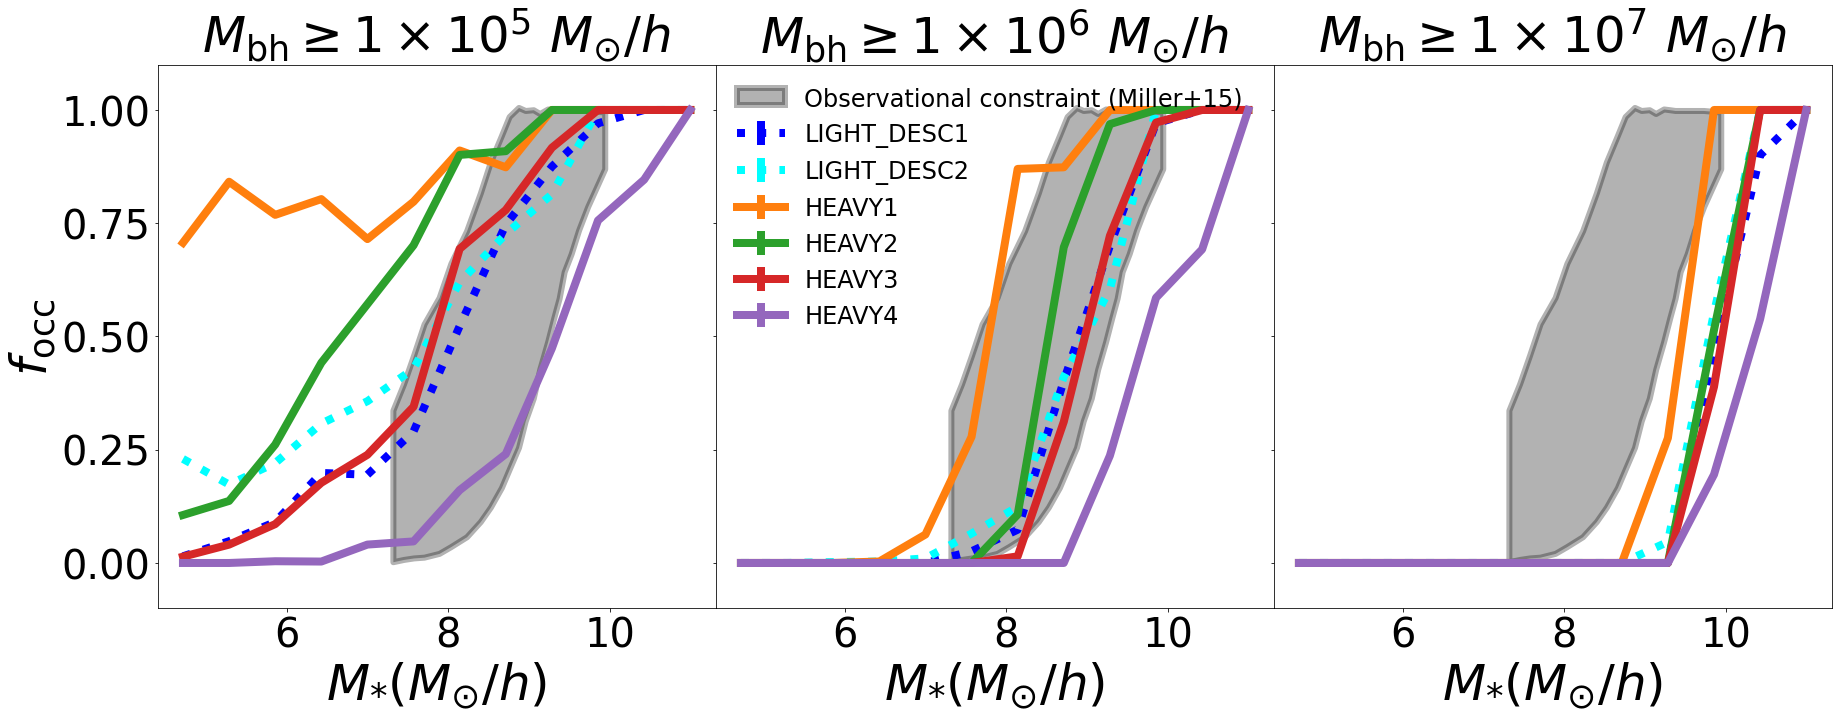

In [13]:
def make_plot(ax1,ax2,ax3,style='solid',col='black',plot1=True,plot2=True,plot3=True,redo=1,width=8):
    
        boxsize=arepo_package.get_box_size(basePath)
        boxsize/=1e3
       
        len1=[]
        len2=[]
        len3=[]

        len1BH=[]
        len2BH=[]
        len3BH=[]
        
        if('L6p25n1024' in basePath):
            subhalo_masscut=1e5
        if('L12p5n512' in basePath):
            subhalo_masscut=64e7
        if('L25n1024' in basePath):
            subhalo_masscut=64e7
        
        
        log_stellar_space=[]
        
        log_stellar_mass_bins=numpy.linspace(3,11,15)
        diff_bin=numpy.diff(log_stellar_mass_bins)[0]
        
        if(os.path.exists(basePath+'/BH_occupation_3.10.npy') & (redo==0)):
            log_stellar_space,len1,len1BH=numpy.load(basePath+'/BH_occupation_3.10_%d.npy'%redshift)
            log_stellar_space,len2,len2BH=numpy.load(basePath+'/BH_occupation_4.10_%d.npy'%redshift)
            log_stellar_space,len3,len3BH=numpy.load(basePath+'/BH_occupation_5.00_%d.npy'%redshift)    
        else:
            SubhaloBHMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',redshift)
            print(redshift,o)
            SubhaloMassType,o=arepo_package.get_subhalo_property(basePath,'SubhaloMassType',redshift) 
            SubhaloMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloMass',redshift) 
            SubhaloStellarMass=SubhaloMassType[:,4]
            LogSubhaloStellarMass= numpy.log10(SubhaloStellarMass*1e10)

            
            for log_stellar_mass in log_stellar_mass_bins:
                try:
                    mask=(LogSubhaloStellarMass > log_stellar_mass-diff_bin/2) & (LogSubhaloStellarMass < log_stellar_mass+diff_bin/2)
                    mask2=SubhaloMass > subhalo_masscut/1e10
                    mask=mask&mask2
                    LogSubhaloStellarMassBin=LogSubhaloStellarMass[mask]
                    SubhaloBHMassBin=SubhaloBHMass[mask]
                    
                    
                    
                    
                    len1BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut1/1e10]))
                    len2BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut2/1e10]))
                    len3BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut3/1e10]))
                    
                    len1.append(len(SubhaloBHMassBin))
                    len2.append(len(SubhaloBHMassBin))
                    len3.append(len(SubhaloBHMassBin))
                    
                    log_stellar_space.append(log_stellar_mass)
                except IOError:
                    aaa=1



            len1=numpy.array(len1)
            len2=numpy.array(len2)
            len3=numpy.array(len3)
            
            len1BH=numpy.array(len1BH)
            len2BH=numpy.array(len2BH)
            len3BH=numpy.array(len3BH)
            log_stellar_space=numpy.array(log_stellar_space)

            numpy.save(basePath+'/BH_occupation_5.00_%d.npy'%redshift,[log_stellar_space,len1,len1BH])
            numpy.save(basePath+'/BH_occupation_6.00_%d.npy'%redshift,[log_stellar_space,len2,len2BH])
            numpy.save(basePath+'/BH_occupation_7.00_%d.npy'%redshift,[log_stellar_space,len3,len3BH])


        if(plot1):
            maskp=len1>0
            #print(log_stellar_space[maskp])
            err= 0*len1BH/len1*(numpy.sqrt(len1BH)/len1BH + numpy.sqrt(len1)/len1)
            ax1.errorbar(log_stellar_space[maskp]+offset,len1BH[maskp]/len1[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot2):
            maskp=len2>0
            err= 0*len2BH/len2*(numpy.sqrt(len2BH)/len2BH + numpy.sqrt(len2)/len2)
            ax2.errorbar(log_stellar_space[maskp]+offset,len2BH[maskp]/len2[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot3):
            maskp=len3>0
        
            err= 0*len3BH/len3*(numpy.sqrt(len3BH)/len3BH + numpy.sqrt(len3)/len3)
            ax3.errorbar(log_stellar_space[maskp]+offset,len3BH[maskp]/len3[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(ii==2):
            ax1.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax2.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax3.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
        
        ax1.tick_params(labelsize=40)
       # ax1.set_yscale('log')
        ax2.tick_params(labelsize=40)
       # ax2.set_yscale('log')
        ax3.tick_params(labelsize=40)
       # ax3.set_yscale('log')
        if(ii==0):       
            ax1.set_title(r'$M_{\mathrm{bh}}\geq1\times10^5 \ M_{\odot}/h$',fontsize=label_fontsize)
            ax2.set_title(r'$M_{\mathrm{bh}}\geq1\times10^6 \ M_{\odot}/h$',fontsize=label_fontsize)
            ax3.set_title(r'$M_{\mathrm{bh}}\geq1\times10^7 \ M_{\odot}/h$',fontsize=label_fontsize)



label_fontsize=50



f,axx=plt.subplots(1,3,figsize=(30,10),sharey=True,sharex=True)

            
mass_cut1=1e5 
mass_cut2=1e6
mass_cut3=1e7
levelmax_gas,logseedmass_gas=12,3.19
ii=0
for redshift in [0]:

    Mh,Msfmp=1000,5
    offset=0
    labl='LIGHT_DESC1'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='blue',plot1=True,plot2=True,plot3=True)

    Mh,Msfmp=3000,5
    offset=0
    labl='LIGHT_DESC2'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='cyan',plot1=True,plot2=True,plot3=True)

    
    labl='HEAVY1'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C1',plot1=True,plot2=True,plot3=True)
 
    labl='HEAVY2'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C2',plot1=True,plot2=True,plot3=True)

    labl='HEAVY3'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C3',plot1=True,plot2=True,plot3=True)

    labl='HEAVY4'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C4',plot1=True,plot2=True,plot3=True)
    
    axx[0].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[1].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[2].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)

    ii+=1
#axx[0,0].legend(loc='lower right',fontsize=28)


data=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction.txt')
data_lb=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction_lb.txt')

data_ub=numpy.loadtxt('../arepo_code_development/observational_data/M15_BH_occ_fraction_ub.txt')



#axx[0].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[0].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3,label='M15 observations')


#axx[1].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[1].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3,label='Observational constraint (Miller+15)')


#axx[2].plot(numpy.log10(data[:,0]),data[:,1],color='black',linewidth=6)
axx[2].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3,label='M15')




axx[1].legend(loc='upper left',fontsize=24,frameon=False)
#axx[0].set_title('$M_{bh}>1.5e3 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[1].set_title('$M_{bh}>1.25e4 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[2].set_title('$M_{bh}>1e5 \ M_{\odot}/h$',fontsize=label_fontsize)


axx[0].set_ylim(-0.1,1.1)

#axx[]

axx[0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)
#axx[1,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

#axx[2,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/BH_occupations_stellar.png',bbox_inches='tight')


[1.64924002e+43 3.98308196e+42 1.15817202e+41 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16
[2.88675223e+42 6.38587184e+43 1.90170584e+43 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16
[2.52329296e+42 1.77739363e+43 3.60388702e+42 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16
[7.24067592e+43 9.45164792e+42 2.25038227e+42 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16
[9.88034913e+42 1.31988787e+43 1.64821250e+42 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16
[4.05124002e+42 0.00000000e+00 7.48187095e+39 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0 2.220446049250313e-16


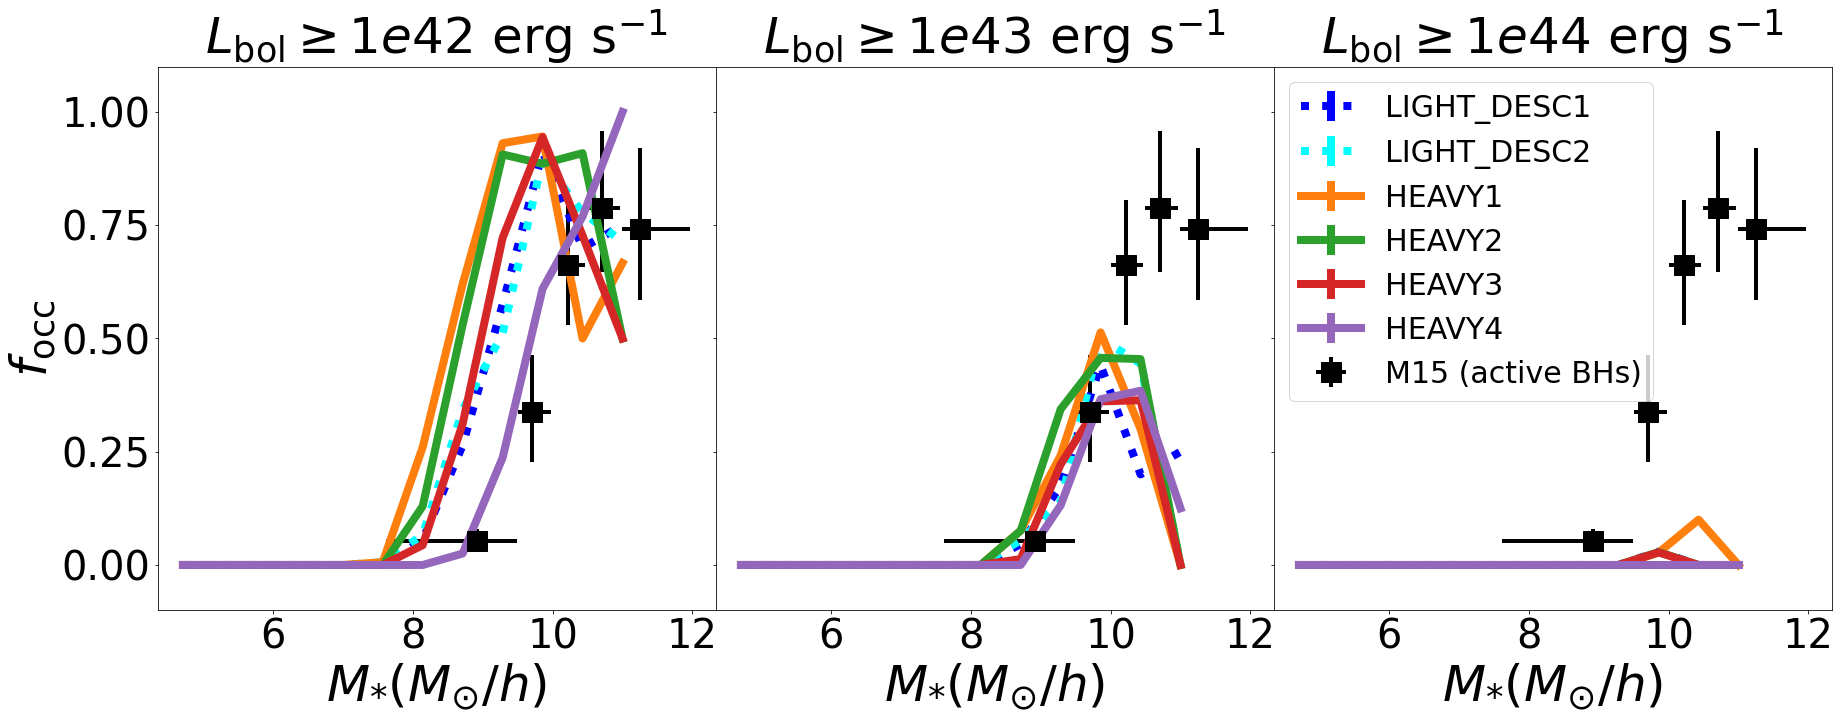

In [54]:
def make_plot(ax1,ax2,ax3,style='solid',col='black',plot1=True,plot2=True,plot3=True,redo=1,width=8):
    
        boxsize=arepo_package.get_box_size(basePath)
        boxsize/=1e3
       
        len1=[]
        len2=[]
        len3=[]

        len1BH=[]
        len2BH=[]
        len3BH=[]
        
        if('L6p25n1024' in basePath):
            subhalo_masscut=1e5
        if('L12p5n512' in basePath):
            subhalo_masscut=64e7
        if('L25n1024' in basePath):
            subhalo_masscut=64e7
        
        
        log_stellar_space=[]
        
        log_stellar_mass_bins=numpy.linspace(3,11,15)
        diff_bin=numpy.diff(log_stellar_mass_bins)[0]
        
        if(os.path.exists(basePath+'/AGN_occupation_3.10.npy') & (redo==0)):
            log_stellar_space,len1,len1BH=numpy.load(basePath+'/AGN_occupation_3.10_%d.npy'%redshift)
            log_stellar_space,len2,len2BH=numpy.load(basePath+'/AGN_occupation_4.10_%d.npy'%redshift)
            log_stellar_space,len3,len3BH=numpy.load(basePath+'/AGN_occupation_5.00_%d.npy'%redshift)    
        else:
            SubhaloBHMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',redshift)
            SubhaloBHMdot,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMdot',redshift)
            SubhaloLbol=SubhaloBHMdot*total_conv
            print(SubhaloLbol)
            print(redshift,o)
            SubhaloMassType,o=arepo_package.get_subhalo_property(basePath,'SubhaloMassType',redshift) 
            SubhaloMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloMass',redshift) 
            SubhaloStellarMass=SubhaloMassType[:,4]
            LogSubhaloStellarMass= numpy.log10(SubhaloStellarMass*1e10)

            
            for log_stellar_mass in log_stellar_mass_bins:
                try:
                    mask=(LogSubhaloStellarMass > log_stellar_mass-diff_bin/2) & (LogSubhaloStellarMass < log_stellar_mass+diff_bin/2)
                    mask2=SubhaloMass > subhalo_masscut/1e10
                    mask=mask&mask2
                    LogSubhaloStellarMassBin=LogSubhaloStellarMass[mask]
                    SubhaloLbolBin=SubhaloLbol[mask]
                    
                    
                    
                    
                    len1BH.append(len(SubhaloLbolBin[SubhaloLbolBin>=lbol_cut1]))
                    len2BH.append(len(SubhaloLbolBin[SubhaloLbolBin>=lbol_cut2]))
                    len3BH.append(len(SubhaloLbolBin[SubhaloLbolBin>=lbol_cut3]))
                    
                    len1.append(len(SubhaloLbolBin))
                    len2.append(len(SubhaloLbolBin))
                    len3.append(len(SubhaloLbolBin))
                    
                    log_stellar_space.append(log_stellar_mass)
                except IOError:
                    aaa=1



            len1=numpy.array(len1)
            len2=numpy.array(len2)
            len3=numpy.array(len3)
            
            len1BH=numpy.array(len1BH)
            len2BH=numpy.array(len2BH)
            len3BH=numpy.array(len3BH)
            log_stellar_space=numpy.array(log_stellar_space)

            numpy.save(basePath+'/AGN_occupation_5.00_%d.npy'%redshift,[log_stellar_space,len1,len1BH])
            numpy.save(basePath+'/AGN_occupation_6.00_%d.npy'%redshift,[log_stellar_space,len2,len2BH])
            numpy.save(basePath+'/AGN_occupation_7.00_%d.npy'%redshift,[log_stellar_space,len3,len3BH])


        if(plot1):
            maskp=len1>0
            #print(log_stellar_space[maskp])
            err= 0*len1BH/len1*(numpy.sqrt(len1BH)/len1BH + numpy.sqrt(len1)/len1)
            ax1.errorbar(log_stellar_space[maskp]+offset,len1BH[maskp]/len1[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot2):
            maskp=len2>0
            err= 0*len2BH/len2*(numpy.sqrt(len2BH)/len2BH + numpy.sqrt(len2)/len2)
            ax2.errorbar(log_stellar_space[maskp]+offset,len2BH[maskp]/len2[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(plot3):
            maskp=len3>0
        
            err= 0*len3BH/len3*(numpy.sqrt(len3BH)/len3BH + numpy.sqrt(len3)/len3)
            ax3.errorbar(log_stellar_space[maskp]+offset,len3BH[maskp]/len3[maskp],err[maskp],color=col,linewidth=width,linestyle=style,label=labl)
        if(ii==2):
            ax1.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax2.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax3.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
        
        ax1.tick_params(labelsize=40)
       # ax1.set_yscale('log')
        ax2.tick_params(labelsize=40)
       # ax2.set_yscale('log')
        ax3.tick_params(labelsize=40)
       # ax3.set_yscale('log')
        if(ii==0):       
            ax1.set_title(r'$L_{\mathrm{bol}}\geq1e42 \ \mathrm{erg~s^{-1}}$',fontsize=label_fontsize)
            ax2.set_title(r'$L_{\mathrm{bol}}\geq1e43 \ \mathrm{erg~s^{-1}}$',fontsize=label_fontsize)
            ax3.set_title(r'$L_{\mathrm{bol}}\geq1e44 \ \mathrm{erg~s^{-1}}$',fontsize=label_fontsize)



label_fontsize=50



f,axx=plt.subplots(1,3,figsize=(30,10),sharey=True,sharex=True)

            
lbol_cut1=1e42
lbol_cut2=1e43
lbol_cut3=1e44
levelmax_gas,logseedmass_gas=12,3.19
ii=0
for redshift in [0]:

    Mh,Msfmp=1000,5
    offset=0
    labl='LIGHT_DESC1'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='blue',plot1=True,plot2=True,plot3=True)

    Mh,Msfmp=3000,5
    offset=0
    labl='LIGHT_DESC2'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='dotted',width=8,col='cyan',plot1=True,plot2=True,plot3=True)

    
    labl='HEAVY1'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C1',plot1=True,plot2=True,plot3=True)
 
    labl='HEAVY2'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C2',plot1=True,plot2=True,plot3=True)

    labl='HEAVY3'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C3',plot1=True,plot2=True,plot3=True)

    labl='HEAVY4'
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
    basePath=path_to_output+run+output
    make_plot(axx[0],axx[1],axx[2],style='solid',width=8,col='C4',plot1=True,plot2=True,plot3=True)
    
    
    axx[0].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[1].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)
    axx[2].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=label_fontsize)

    ii+=1
#axx[0,0].legend(loc='lower right',fontsize=28)

#axx[0,2].legend(loc='upper left',fontsize=32)
#axx[0].set_title('$M_{bh}>1.5e3 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[1].set_title('$M_{bh}>1.25e4 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[2].set_title('$M_{bh}>1e5 \ M_{\odot}/h$',fontsize=label_fontsize)
data=numpy.loadtxt('../arepo_code_development/observational_data/M15_AGN_occ_fraction.txt')
data_lb=numpy.loadtxt('../arepo_code_development/observational_data/M15_AGN_occ_fraction_lb.txt')

data_ub=numpy.loadtxt('../arepo_code_development/observational_data/M15_AGN_occ_fraction_ub.txt')


data_xlb=numpy.loadtxt('../arepo_code_development/observational_data/M15_AGN_occ_fraction_xlb.txt')

data_xub=numpy.loadtxt('../arepo_code_development/observational_data/M15_AGN_occ_fraction_xub.txt')



axx[0].errorbar(numpy.log10(data[:,0]),data[:,1],xerr=[numpy.log10(data[:,0])-numpy.log10(data_xlb[:,0]),numpy.log10(data_xub[:,0])-numpy.log10(data[:,0])],yerr=[data[:,1]-data_lb[:,1],data_ub[:,1]-data[:,1]],marker='s',color='black',linestyle='',ms=20,linewidth=4)

axx[1].errorbar(numpy.log10(data[:,0]),data[:,1],xerr=[numpy.log10(data[:,0])-numpy.log10(data_xlb[:,0]),numpy.log10(data_xub[:,0])-numpy.log10(data[:,0])],yerr=[data[:,1]-data_lb[:,1],data_ub[:,1]-data[:,1]],marker='s',color='black',linestyle='',ms=20,linewidth=4)

axx[2].errorbar(numpy.log10(data[:,0]),data[:,1],xerr=[numpy.log10(data[:,0])-numpy.log10(data_xlb[:,0]),numpy.log10(data_xub[:,0])-numpy.log10(data[:,0])],yerr=[data[:,1]-data_lb[:,1],data_ub[:,1]-data[:,1]],marker='s',color='black',linestyle='',ms=20,linewidth=4,label='M15 (active BHs)')

#axx[0].fill_between(numpy.log10(data_lb[:,0]),data_lb[:,1],data_ub[:,1],color='black',linewidth=6,alpha=0.3)


axx[0].set_ylim(-0.1,1.1)


axx[2].legend(fontsize=30)
#axx[]

axx[0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)
#axx[1,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

#axx[2,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/AGN_occupations_stellar.png',bbox_inches='tight')


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  25
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  25
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  25
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
Desired redshift:  5
Output redshift:  4.99593346

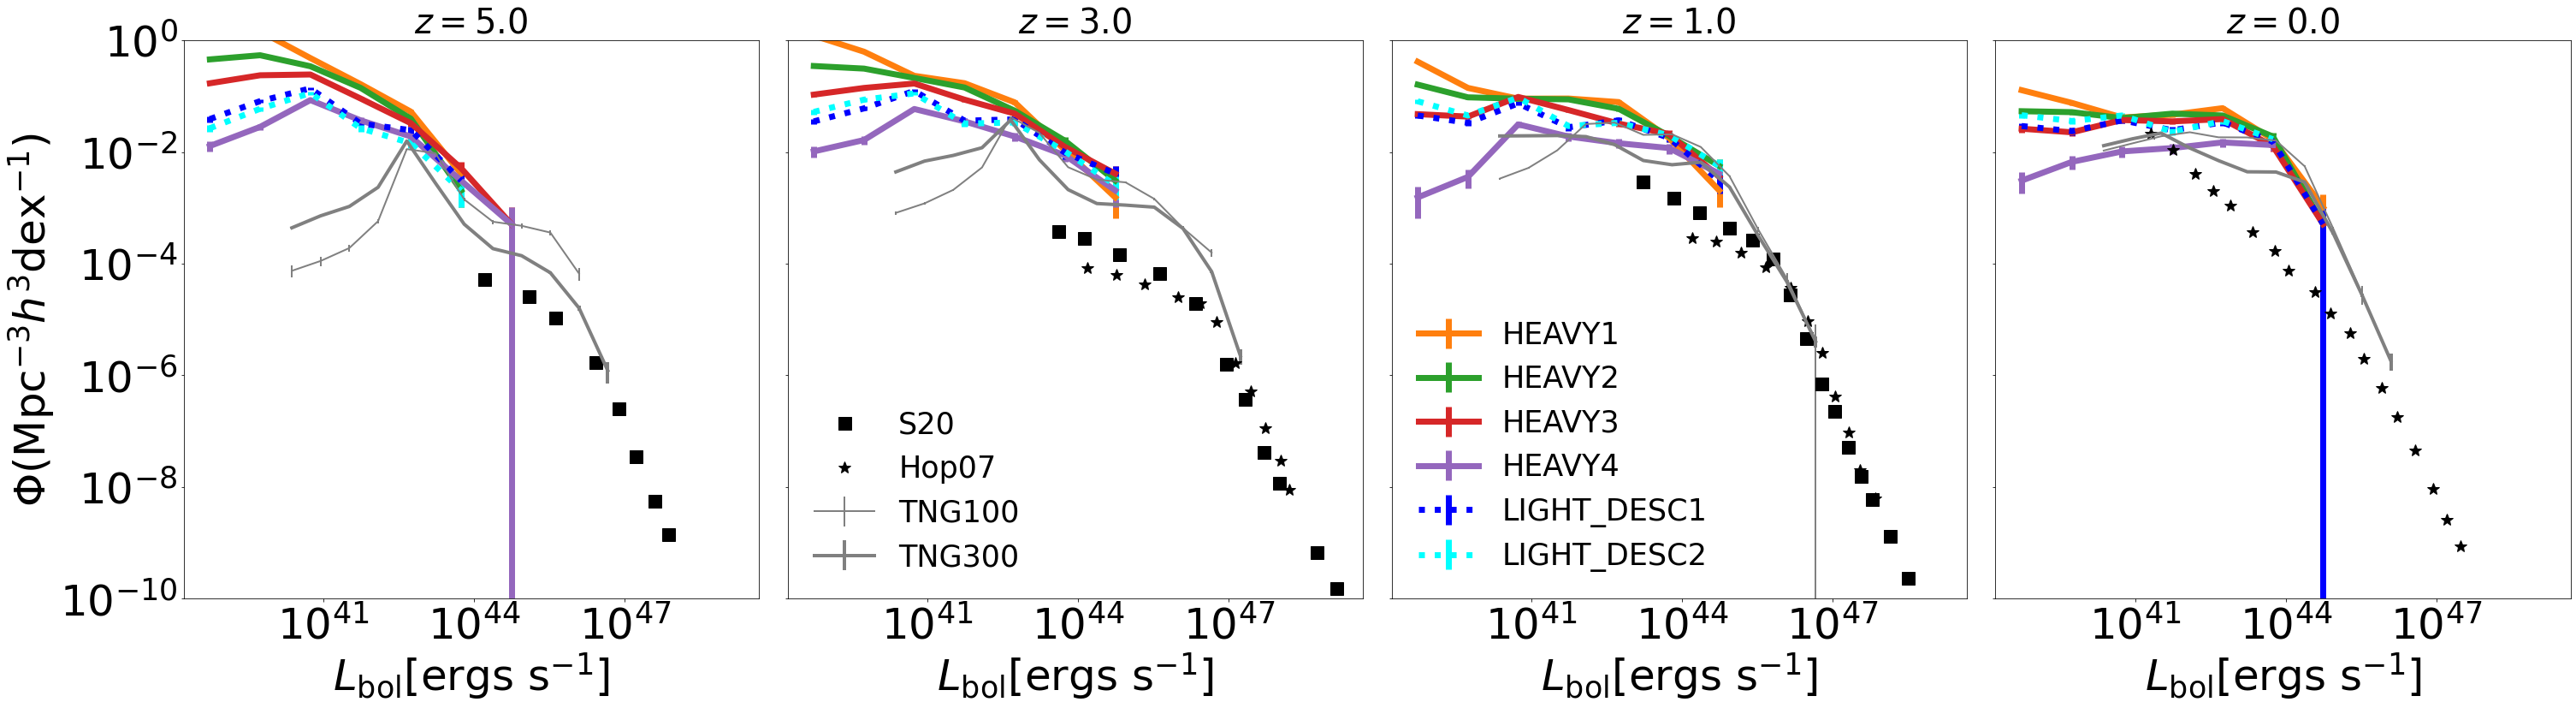

In [20]:
f,ax=plt.subplots(1,4,figsize=(50,12),sharey=True,sharex=True)



Gpc_to_Mpc=1000

def make_plot(ax,col='black',width=4,style='solid',labl1='',labl2=''):
    ii=0
    for desired_redshift in [5,3,1,0]:
        

        labll1,labll2='',''
     
        ax[0].set_ylim(1e-10,1)
        
        ax[ii].set_title('$z=%.1f$'%desired_redshift,fontsize=40)
        BHMdot,o=arepo_package.get_particle_property(basePath,'BH_Mdot',5,desired_redshift)
        BHMdot,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMdot',desired_redshift)
        BHLum=BHMdot*total_conv
        box_size=arepo_package.get_box_size(basePath)/1e3

        log_HM_min, log_HM_max, Nbins=36,45,10
        
        

        a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
        c[c>b]=0
        mask=b>0
        
   
        if(ii==1):
            labl=labl1
        elif(ii==2):
            labl=labl2
        else:
            labl=''
            
        ax[ii].errorbar(a[mask],b[mask],c[mask],color=col,linewidth=width,linestyle=style,label=labl)
        ax[ii].tick_params(labelsize=50)
        ax[ii].set_xlabel('$L_{\mathrm{bol}}[\mathrm{ergs \ s^{-1}}]$',fontsize=50)
        ii+=1

lcut=1e38







Mh,Msfmp=1000,5
        
box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
make_plot(ax,col='C1',style='solid',labl1='',labl2='HEAVY1',width=7)

        
Mh,Msfmp=3000,5

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
make_plot(ax,col='C2',style='solid',labl1='',labl2='HEAVY2',width=7)



#lcut=1e40
Mh,Msfmp=10000,5

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
make_plot(ax,col='C3',style='solid',labl1='',labl2='HEAVY3',width=7)


Mh,Msfmp=3000,150

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
make_plot(ax,col='C4',style='solid',labl1='',labl2='HEAVY4',width=7)


Mh,Msfmp=1000,5
offset=0
box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output
make_plot(ax,col='blue',style='dotted',labl1='',labl2='LIGHT_DESC1',width=7)

Mh,Msfmp=3000,5
offset=0
box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output
make_plot(ax,col='cyan',style='dotted',labl1='',labl2='LIGHT_DESC2',width=7)



L_sun=3.846e33

ii=0
for desired_redshift in [5,3]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    #print(data)
    ax[ii].errorbar(data[:,0],data[:,1]/0.7**3,color='black',label='S20',marker='s',linewidth=0,ms=15)
    ii+=1
ii=1  
for desired_redshift in [3]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z%d_actual_data.txt'%desired_redshift)
    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='Hop07',marker='*',linewidth=0,ms=15)
    print(data)
    ii+=1
    
    
ii=2
for desired_redshift in [1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    #print(data)
    ax[ii].errorbar(data[:,0],data[:,1]/0.7**3,color='black',label='',marker='s',linewidth=0,ms=15)
    ii+=1
ii=2  
for desired_redshift in [1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z%d_actual_data.txt'%desired_redshift)
    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='',marker='*',linewidth=0,ms=15)
    print(data)
    ii+=1

    
    
    
 
for desired_redshift in [0.1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z0p1_actualdata.txt')
    ax[3].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='Hop07',marker='*',linewidth=0,ms=15)
    print(data)
    #ii+=1
    
#ii=3
#for desired_redshift in [0.7]: 

#    data=numpy.loadtxt('../arepo_code_development/observational_data/Lac15_AGNLF_z0p7_actualdata.txt')
#    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3.,color='grey',label='Lac15',marker='o',linewidth=0,ms=15)

     
desired_redshift=5.0
log_HM_min, log_HM_max, Nbins=40,48,15
iii=0
for desired_redshift in [5,3]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=75
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask],c[mask],color='grey',label='TNG100',marker='',linewidth=2)
    
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=205
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask],c[mask],color='grey',label='TNG300',marker='',linewidth=4)
    
    
    iii+=1
    
    
for desired_redshift in [1,0]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=75
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask],c[mask],color='grey',label='',marker='',linewidth=2)
    
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=205
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask],c[mask],color='grey',label='',marker='',linewidth=4)
    
    
    iii+=1


ax[0].set_ylabel('$\Phi(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex^{-1}})$',fontsize=50)


#ax[3].legend(loc='upper right',fontsize=25)

ax[2].legend(loc='lower left',fontsize=35,frameon=False)

ax[1].legend(loc='lower left',fontsize=35,frameon=False)











ax[0].set_xscale('log')
ax[0].set_yscale('log')

plt.subplots_adjust(wspace=0.05,hspace=0)

plt.savefig('./Paper7_figures/LFs_z0.png',bbox_inches='tight')





Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19


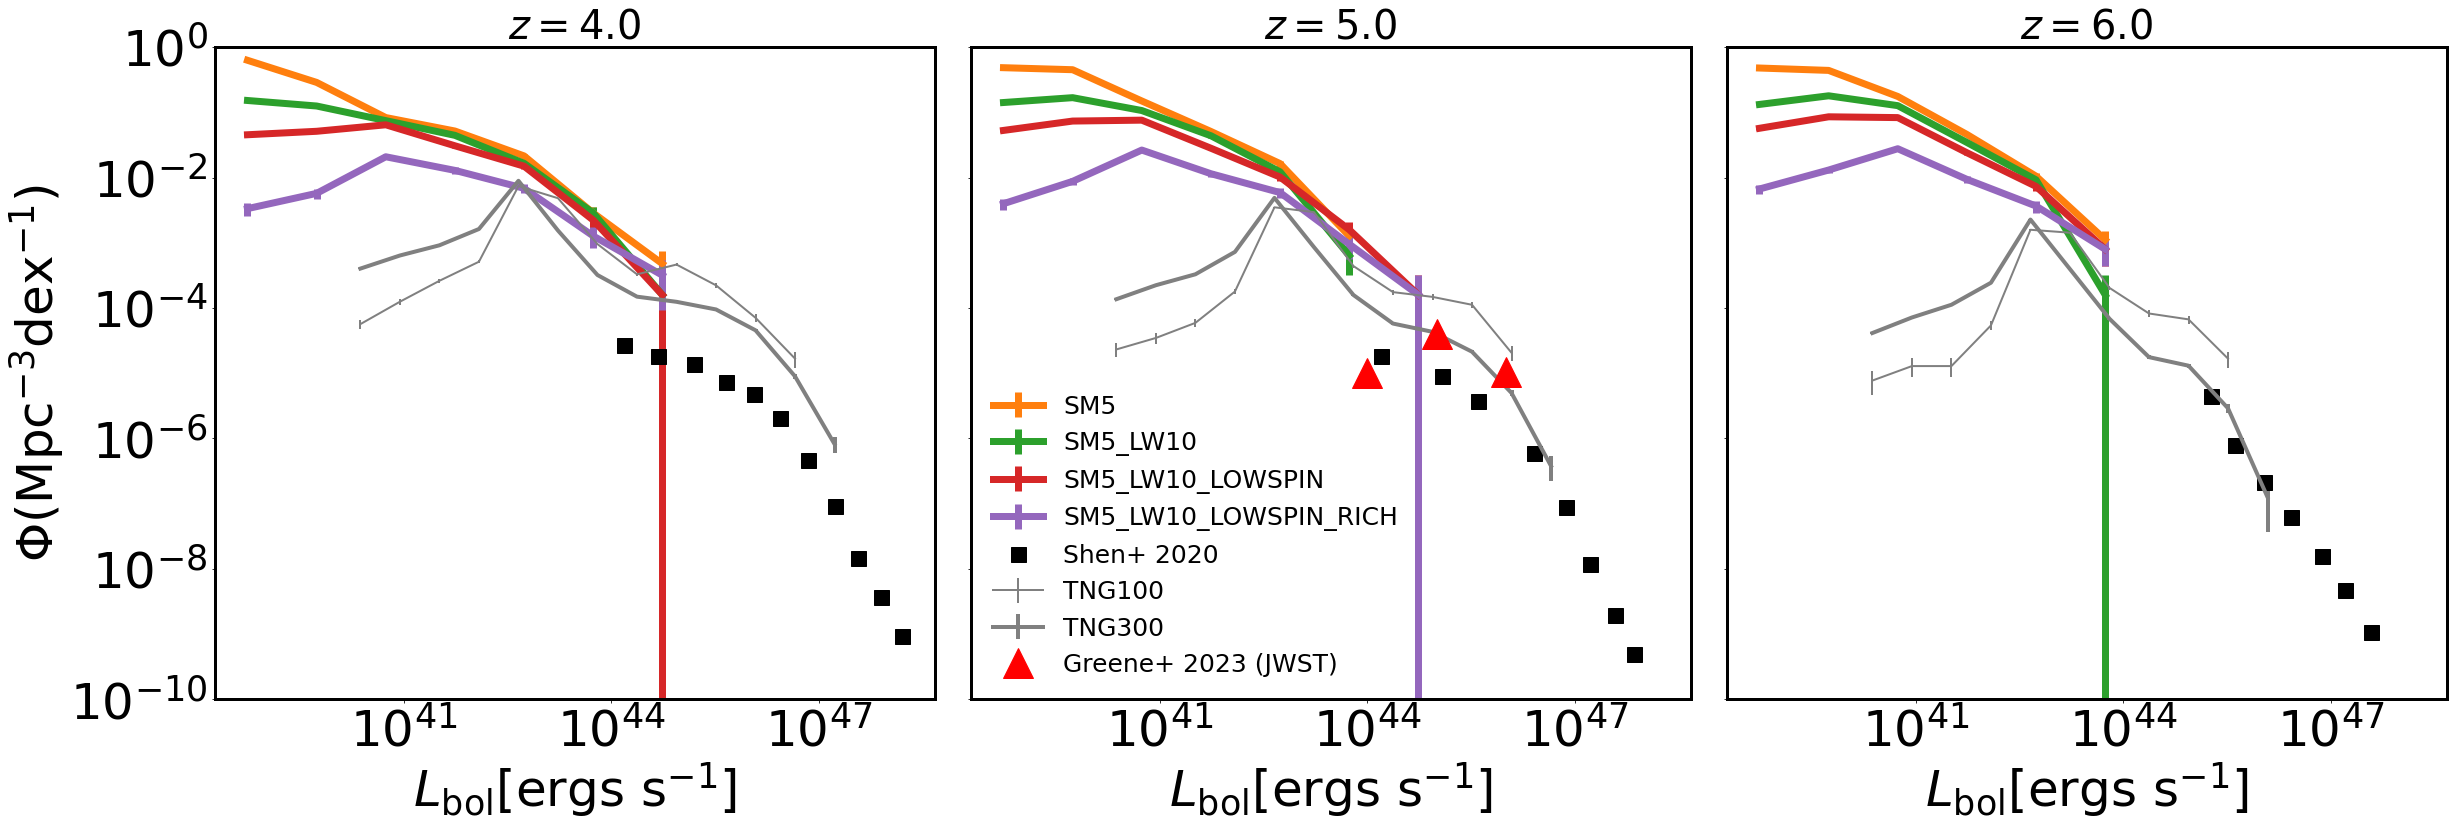

In [24]:
f,ax=plt.subplots(1,3,figsize=(40,12),sharey=True,sharex=True)



Gpc_to_Mpc=1000

def make_plot(ax,col='black',width=4,style='solid',labl1='',labl2=''):
    ii=0
    for desired_redshift in [4,5,6]:
        

        labll1,labll2='',''
     
        ax[0].set_ylim(1e-10,1)
        
        ax[ii].set_title('$z=%.1f$'%desired_redshift,fontsize=40)
        BHMdot,o=arepo_package.get_particle_property(basePath,'BH_Mdot',5,desired_redshift)
        BHMdot,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMdot',desired_redshift)
        BHLum=BHMdot*total_conv
        box_size=arepo_package.get_box_size(basePath)/1e3

        log_HM_min, log_HM_max, Nbins=36,45,10
        
        

        a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
        c[c>b]=0
        mask=b>0
        
   
        if(ii==0):
            labl=labl1
        elif(ii==1):
            labl=labl2
        else:
            labl=''
            
        ax[ii].errorbar(a[mask],b[mask]*h**3,c[mask]*h**3,color=col,linewidth=width,linestyle=style,label=labl)
        ax[ii].tick_params(labelsize=50)
        ax[ii].set_xlabel('$L_{\mathrm{bol}}[\mathrm{ergs \ s^{-1}}]$',fontsize=50)
        ii+=1

lcut=1e38







Mh,Msfmp=1000,5
        
box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
make_plot(ax,col='C1',style='solid',labl1='',labl2='SM5',width=7)

        
Mh,Msfmp=3000,5

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
make_plot(ax,col='C2',style='solid',labl1='',labl2='SM5_LW10',width=7)



#lcut=1e40
Mh,Msfmp=10000,5

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
make_plot(ax,col='C3',style='solid',labl1='',labl2='SM5_LW10_LOWSPIN',width=7)


Mh,Msfmp=3000,150

box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
make_plot(ax,col='C4',style='solid',labl1='',labl2='SM5_LW10_LOWSPIN_RICH',width=7)


Mh,Msfmp=1000,5
offset=0
box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output
#make_plot(ax,col='blue',style='dotted',labl1='',labl2='LIGHT_DESC1',width=7)

Mh,Msfmp=3000,5
offset=0
box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output
#make_plot(ax,col='cyan',style='dotted',labl1='',labl2='LIGHT_DESC2',width=7)



L_sun=3.846e33

ii=0
for desired_redshift in [4,5,6]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    #print(data)
    ax[ii].errorbar(data[:,0],data[:,1],color='black',label='Shen+ 2020',marker='s',linewidth=0,ms=15)
    ii+=1

'''    
ii=1  
for desired_redshift in [3]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z%d_actual_data.txt'%desired_redshift)
    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='Hop07',marker='*',linewidth=0,ms=15)
    print(data)
    ii+=1
    
    
ii=2
for desired_redshift in [1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    #print(data)
    ax[ii].errorbar(data[:,0],data[:,1]/0.7**3,color='black',label='',marker='s',linewidth=0,ms=15)
    ii+=1
ii=2  
for desired_redshift in [1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z%d_actual_data.txt'%desired_redshift)
    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='',marker='*',linewidth=0,ms=15)
    print(data)
    ii+=1

    
    
    
 
for desired_redshift in [0.1]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Hop07_AGNLF_z0p1_actualdata.txt')
    ax[3].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3,color='black',label='Hop07',marker='*',linewidth=0,ms=15)
    print(data)
    #ii+=1
    
#ii=3
#for desired_redshift in [0.7]: 

#    data=numpy.loadtxt('../arepo_code_development/observational_data/Lac15_AGNLF_z0p7_actualdata.txt')
#    ax[ii].errorbar(data[:,0]*L_sun,data[:,1]/0.7**3.,color='grey',label='Lac15',marker='o',linewidth=0,ms=15)
'''
     
desired_redshift=5.0
log_HM_min, log_HM_max, Nbins=40,48,15
iii=0
for desired_redshift in [4,5,6]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=75
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask]*h**3,c[mask]*h**3,color='grey',label='TNG100',marker='',linewidth=2)
    
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    BHLum=BHMdot*total_conv
    box_size=205
    a,b,c=arepo_package.luminosity_function(BHLum[BHLum>lcut], box_size, log_HM_min, log_HM_max, Nbins)
    mask=b>0
    ax[iii].errorbar(a[mask],b[mask]*h**3,c[mask]*h**3,color='grey',label='TNG300',marker='',linewidth=4)
    
    
    iii+=1
    
 
data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/greene_2023.txt')    
ax[1].errorbar(data[:,0],data[:,1],color='red',marker='^',ms=30,label='Greene+ 2023 (JWST)',linewidth=0)

#for xx,yy in zip(data[:,0],data[:,1]):
#    ax[1].arrow(xx, yy, 0, 0, width=30,color='red')



ax[0].set_ylabel('$\Phi(\mathrm{Mpc}^{-3}\mathrm{dex^{-1}})$',fontsize=50)


#ax[3].legend(loc='upper right',fontsize=25)
ax[1].legend(loc='lower left',fontsize=25,frameon=False)

#ax[0].legend(loc='lower left',fontsize=35,frameon=False)







for axx in ax.flatten():
    axx.spines['top'].set_linewidth(3)    # Top axis
    axx.spines['bottom'].set_linewidth(3) # Bottom axis
    axx.spines['left'].set_linewidth(3)   # Left axis
    axx.spines['right'].set_linewidth(3) 


ax[0].set_xscale('log')
ax[0].set_yscale('log')

plt.subplots_adjust(wspace=0.05,hspace=0)

plt.savefig('./Paper7_figures/LFs.png',bbox_inches='tight')





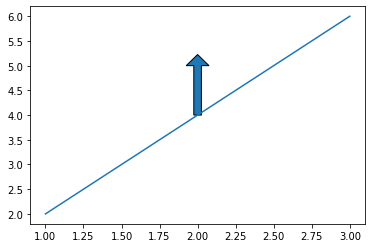

In [15]:
x = [1, 2, 3]
y = [2, 4, 6]

# Plotting the graph
plt.plot(x, y)

# Adding an up arrow to the graph starting from the base (2, 4) with a length of 2 units along both x and y directions
plt.arrow(2, 4, 0, 1, width=0.05)

# Displaying the graph

0
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [   0.    0.    0.    0.    0.    0. 5055.  933.  654.  396.  252.  117.
  102.   36.   24.]
0
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [   0.    0.    0.    0.    0.    0. 1740.  333.  186.  138.  105.   81.
   54.   15.   18.]
0
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [  0.   0.   0.   0.   0.   0. 846. 204.  6

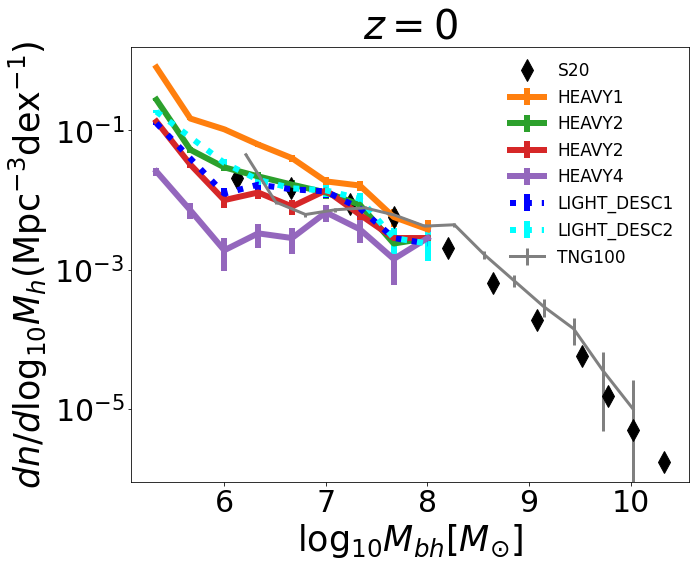

In [27]:
label_fontsize=40



def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)[0]
    return centers,HMF/norm,dHMF/norm


def make_plot(ax,z_desired,basePath_cur,style='dashed',col='black',width=6,log_mass_min=3.19,labl=' '):
    global Nbins, log_HM_min, log_HM_max
    redshift_space=[z_desired]

    BH_no_space=[]
    print(z_desired)
    
    boxsize=arepo_package.get_box_size(basePath_cur)/1e3

    for redshift in [z_desired]:
    

        BH_Mass,o=arepo_package.get_particle_property(basePath_cur,'BH_Mass',5,redshift)
        print(log_HM_min,log_HM_max)
        centers,HMF,dHMF=get_distribution(numpy.log10(BH_Mass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
        #print(BH_Mass*1e10)
        print(centers,HMF)
        
        mask=(centers>log_mass_min)&(HMF>0)
        ax.errorbar(centers[mask]-numpy.log10(hubble),HMF[mask]/boxsize**3*hubble**3,dHMF[mask]/boxsize**3*hubble**3,linewidth=width,linestyle=style,color=col,label=labl,marker='',ms=15)
      
    
        ax.set_yscale('log')

        ax.tick_params(labelsize=label_fontsize-10)
        ax.set_xlabel('$\log_{10}M_{bh}[M_{\odot}]$',fontsize=label_fontsize-5)


LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


f,axx=plt.subplots(1,1,figsize=(10,8),sharey=True,sharex=True)


for ii in [0]:
  
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20_BHMF.txt')
    axx.errorbar(numpy.log10(10**data[:,0]),10**data[:,1],color='black',label='S20',marker='d',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    


def do(col='black',basePath_cur='.',style='solid',width=5,labl='',labl2=''):
    global Nbins, log_HM_min, log_HM_max
    i=0
    for z_desired in [0]:
        axx.set_title('$z=%d$'%z_desired,fontsize=40)
        Nbins, log_HM_min, log_HM_max = 16, 3, 8  
        log_mass_min=3.00


        if(z_desired==1):
            flabl=labl
        elif(z_desired==0):
            flabl=labl2
        else:
            flabl=''

        make_plot(axx,z_desired,basePath_cur,col=col,width=width,log_mass_min=log_mass_min,labl=flabl,style=style)

      
        

        #axx[i].set_ylim(1e-3,3)
        #axx[i,0].axvline(numpy.log10(2e4))
        
        i+=1
global Nbins, log_HM_min, log_HM_max


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
do('C1',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY1',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
do('C2',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
do('C3',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
do('C4',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY4',width=6) 

Msfmp,Mh=5,1000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output        
do('blue',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC1',width=6,style='dotted') 


Msfmp,Mh=5,3000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output             
do('cyan',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC2',width=6,style='dotted') 


axx.set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}\mathrm{dex}^{-1})$',fontsize=label_fontsize-5)

#axx[1].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)

#axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

plt.subplots_adjust(wspace=0)



style='solid'
width=3
Nbins, log_HM_min, log_HM_max = 15, 5.90,10
log_mass_min=5.90
ii=0

    
    
for desired_redshift in [0]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=75.
    axx.errorbar(centers[mask]-numpy.log10(hubble),HMF[mask]/boxsize**3*hubble**3,dHMF[mask]/boxsize**3,linewidth=3,linestyle=style,color='grey',marker='',label='TNG100')
      
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=205.
    #axx.errorbar(centers[mask]-numpy.log10(hubble),HMF[mask]/boxsize**3*hubble**3,dHMF[mask]/boxsize**3,linewidth=6,linestyle=style,color='grey',marker='')
    ii+=1

data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots.txt')

data_right=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_right.txt')

data_left=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_left.txt')


data_up=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_up.txt')

data_down=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_down.txt')

#axx.errorbar(data[:,0],10**data[:,1]/0.7**3,xerr=[data[:,0]-data_left[:,0],data_right[:,0]-data[:,0]],yerr=[10**data[:,1]-10**data_down[:,1],10**data_up[:,1]-10**data[:,1]],marker='o',ms=20,linewidth=3,linestyle='',label='Little red dots at $z\sim5$ \n Mathee+2023',color='red')

axx.legend(loc='upper right',fontsize=label_fontsize-23,frameon=False)

#axx.legend(loc='upper right',fontsize=label_fontsize-13,frameon=False)

#axx[2].legend(loc='upper right',fontsize=label_fontsize-16,frameon=False)

plt.savefig('./Paper7_figures/mass_functions_z0.png',bbox_inches='tight')







0
6 11
[ 6.16666667  6.5         6.83333333  7.16666667  7.5         7.83333333
  8.16666667  8.5         8.83333333  9.16666667  9.5         9.83333333
 10.16666667 10.5        10.83333333] [867. 552. 411. 414. 327. 261. 237. 171. 126.  45.  54.  54.  48.  18.
  21.]
0
6 11
[ 6.16666667  6.5         6.83333333  7.16666667  7.5         7.83333333
  8.16666667  8.5         8.83333333  9.16666667  9.5         9.83333333
 10.16666667 10.5        10.83333333] [837. 537. 480. 363. 303. 264. 261. 153.  99.  60.  54.  51.  42.  24.
  12.]
0
6 11
[ 6.16666667  6.5         6.83333333  7.16666667  7.5         7.83333333
  8.16666667  8.5         8.83333333  9.16666667  9.5         9.83333333
 10.16666667 10.5        10.83333333] [753. 597. 468. 345. 300. 282. 234. 165. 141.  60.  60.  60.  42.  21.
  15.]
0
6 11
[ 6.16666667  6.5         6.83333333  7.16666667  7.5         7.83333333
  8.16666667  8.5         8.83333333  9.16666667  9.5         9.83333333
 10.16666667 10.5        10.83333333] [7

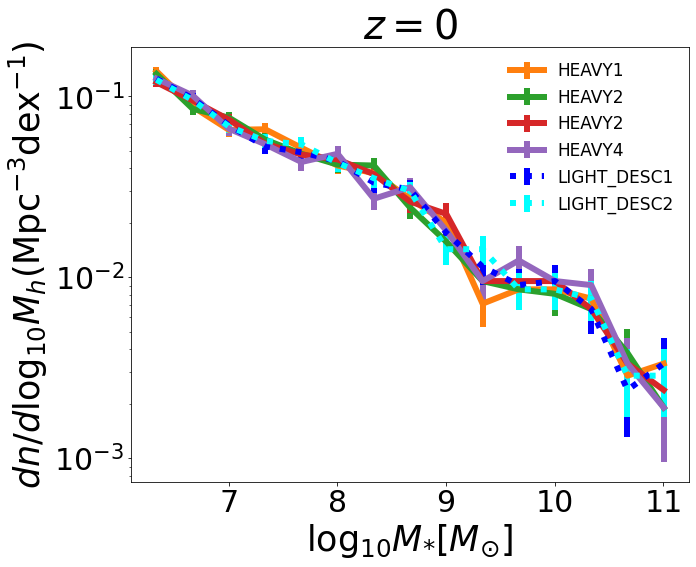

In [8]:
label_fontsize=40



def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)[0]
    return centers,HMF/norm,dHMF/norm


def make_plot(ax,z_desired,basePath_cur,style='dashed',col='black',width=6,log_mass_min=3.19,labl=' '):
    global Nbins, log_HM_min, log_HM_max
    redshift_space=[z_desired]

    BH_no_space=[]
    print(z_desired)
    
    boxsize=arepo_package.get_box_size(basePath_cur)/1e3

    for redshift in [z_desired]:
    

        SubhaloMassType,o=arepo_package.get_subhalo_property(basePath_cur,'SubhaloMassType',redshift)
        #SubhaloBHMass,o=arepo_package.get_subhalo_property(basePath_cur,'SubhaloBHMass',redshift)
        SubhaloSM=SubhaloMassType[:,4]
        print(log_HM_min,log_HM_max)
        centers,HMF,dHMF=get_distribution(numpy.log10(SubhaloSM*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
        #print(BH_Mass*1e10)
        print(centers,HMF)
        
        mask=(centers>log_mass_min)&(HMF>0)
        ax.errorbar(centers[mask]-numpy.log10(hubble),HMF[mask]/boxsize**3*hubble**3,dHMF[mask]/boxsize**3*hubble**3,linewidth=width,linestyle=style,color=col,label=labl,marker='',ms=15)
      
    
        ax.set_yscale('log')

        ax.tick_params(labelsize=label_fontsize-10)
        ax.set_xlabel('$\log_{10}M_{*}[M_{\odot}]$',fontsize=label_fontsize-5)


LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


f,axx=plt.subplots(1,1,figsize=(10,8),sharey=True,sharex=True)


 


def do(col='black',basePath_cur='.',style='solid',width=5,labl='',labl2=''):
    global Nbins, log_HM_min, log_HM_max
    i=0
    for z_desired in [0]:
        axx.set_title('$z=%d$'%z_desired,fontsize=40)
        Nbins, log_HM_min, log_HM_max = 16, 6, 11  
        log_mass_min=3.00


        if(z_desired==1):
            flabl=labl
        elif(z_desired==0):
            flabl=labl2
        else:
            flabl=''

        make_plot(axx,z_desired,basePath_cur,col=col,width=width,log_mass_min=log_mass_min,labl=flabl,style=style)

      
        

        #axx[i].set_ylim(1e-3,3)
        #axx[i,0].axvline(numpy.log10(2e4))
        
        i+=1
global Nbins, log_HM_min, log_HM_max


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
do('C1',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY1',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
do('C2',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
do('C3',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
do('C4',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY4',width=6) 

Msfmp,Mh=5,1000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output        
do('blue',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC1',width=6,style='dotted') 


Msfmp,Mh=5,3000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output             
do('cyan',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC2',width=6,style='dotted') 


axx.set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}\mathrm{dex}^{-1})$',fontsize=label_fontsize-5)

#axx[1].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)

#axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

plt.subplots_adjust(wspace=0)



style='solid'
width=3
Nbins, log_HM_min, log_HM_max = 15, 5.90,10
log_mass_min=5.90
ii=0

    
    


data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots.txt')

data_right=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_right.txt')

data_left=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_left.txt')


data_up=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_up.txt')

data_down=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_down.txt')

#axx.errorbar(data[:,0],10**data[:,1]/0.7**3,xerr=[data[:,0]-data_left[:,0],data_right[:,0]-data[:,0]],yerr=[10**data[:,1]-10**data_down[:,1],10**data_up[:,1]-10**data[:,1]],marker='o',ms=20,linewidth=3,linestyle='',label='Little red dots at $z\sim5$ \n Mathee+2023',color='red')

axx.legend(loc='upper right',fontsize=label_fontsize-23,frameon=False)

#axx.legend(loc='upper right',fontsize=label_fontsize-13,frameon=False)

#axx[2].legend(loc='upper right',fontsize=label_fontsize-16,frameon=False)

plt.savefig('./Paper7_figures/mass_functions_z0.png',bbox_inches='tight')







5
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 2.8707e+04 2.7450e+03 1.6800e+03 6.7500e+02 2.8800e+02 1.0800e+02
 3.9000e+01 9.0000e+00 0.0000e+00]
3
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 2.1606e+04 2.2920e+03 1.5420e+03 7.5900e+02 3.1800e+02 1.6800e+02
 6.3000e+01 2.4000e+01 3.0000e+00]
1
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  25
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.1

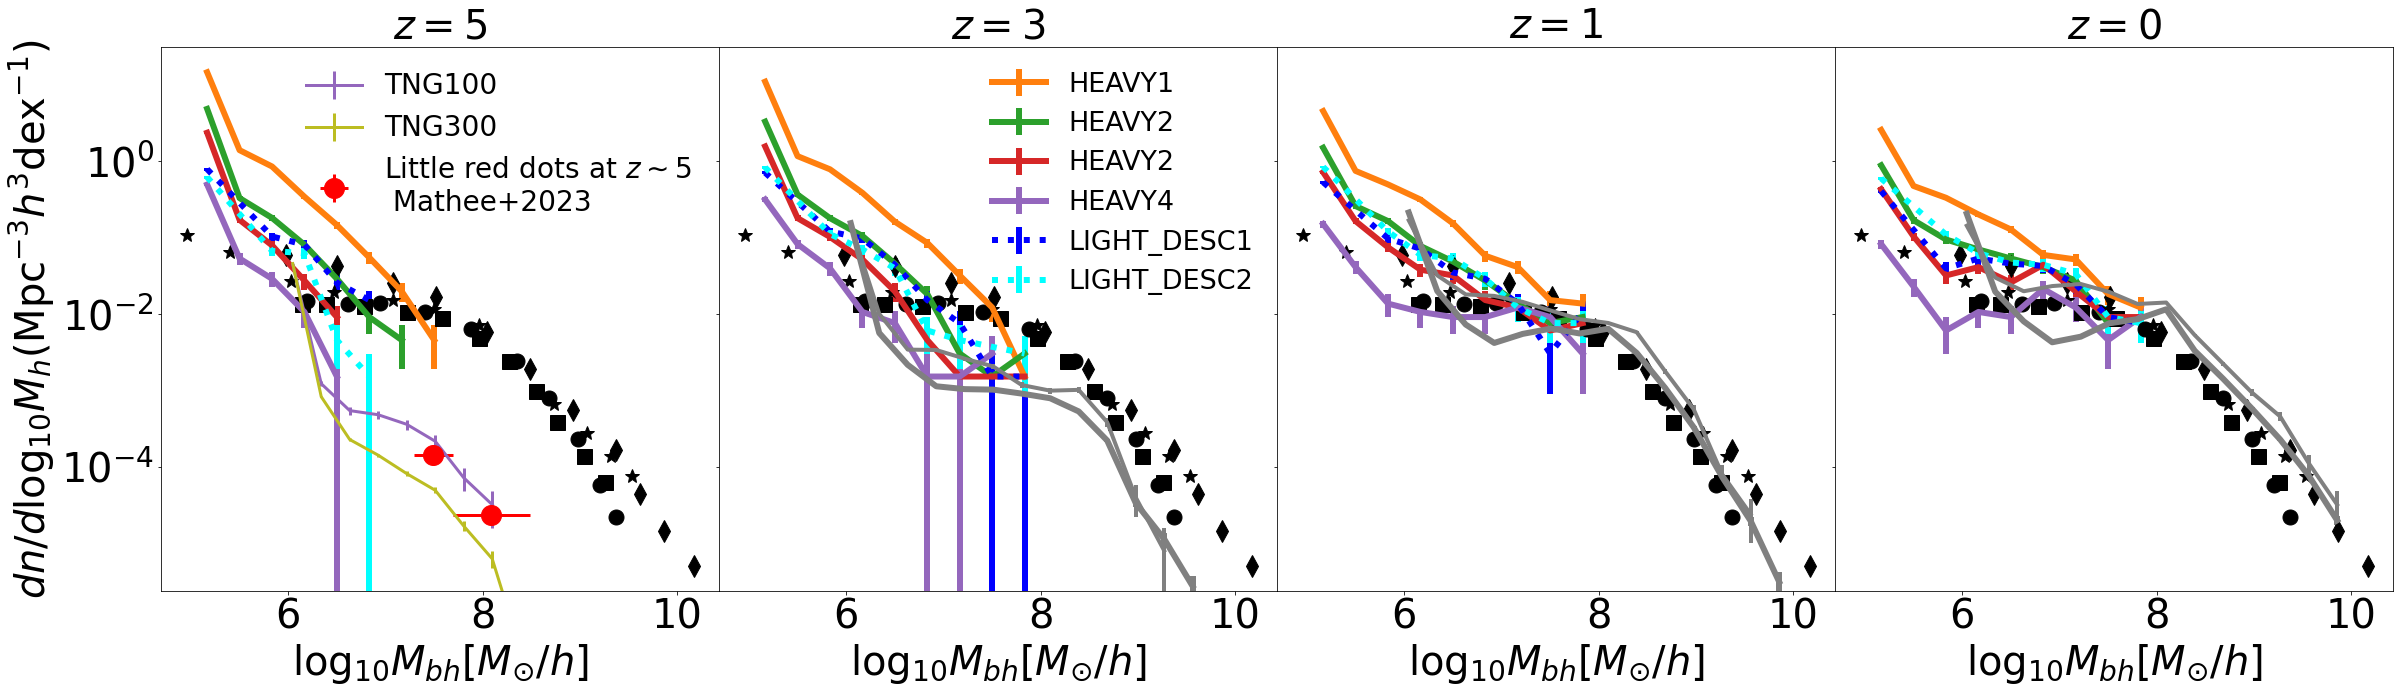

In [17]:
label_fontsize=40



def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)[0]
    return centers,HMF/norm,dHMF/norm


def make_plot(ax,z_desired,basePath_cur,style='dashed',col='black',width=6,log_mass_min=3.19,labl=' '):
    global Nbins, log_HM_min, log_HM_max
    redshift_space=[z_desired]

    BH_no_space=[]
    print(z_desired)
    
    boxsize=arepo_package.get_box_size(basePath_cur)/1e3

    for redshift in [z_desired]:
    

        BH_Mass,o=arepo_package.get_particle_property(basePath_cur,'BH_Mass',5,redshift)
        print(log_HM_min,log_HM_max)
        centers,HMF,dHMF=get_distribution(numpy.log10(BH_Mass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
        #print(BH_Mass*1e10)
        print(centers,HMF)
        
        mask=(centers>log_mass_min)&(HMF>0)
        ax.errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=width,linestyle=style,color=col,label=labl,marker='',ms=15)
      
    
        ax.set_yscale('log')

        ax.tick_params(labelsize=label_fontsize)
        ax.set_xlabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=label_fontsize)


LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


f,axx=plt.subplots(1,4,figsize=(40,10),sharey=True,sharex=True)

for ii in [3]:
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='M08 (z=0)',marker='o',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='S20 (z=0)',marker='d',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='S09 (z=0)',marker='*',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='C10 (z=0)',marker='s',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
 
for ii in [0,1,2]:
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='',marker='o',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='',marker='d',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='',marker='*',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='black',label='',marker='s',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
 

def do(col='black',basePath_cur='.',style='solid',width=5,labl='',labl2=''):
    global Nbins, log_HM_min, log_HM_max
    i=0
    for z_desired in [5,3,1,0]:
        axx[i].set_title('$z=%d$'%z_desired,fontsize=40)
        Nbins, log_HM_min, log_HM_max = 16, 3, 8  
        log_mass_min=3.00


        if(z_desired==1):
            flabl=labl
        elif(z_desired==3):
            flabl=labl2
        else:
            flabl=''

        make_plot(axx[i],z_desired,basePath_cur,col=col,width=width,log_mass_min=log_mass_min,labl=flabl,style=style)

      
        

        #axx[i].set_ylim(1e-3,3)
        #axx[i,0].axvline(numpy.log10(2e4))
        
        i+=1
global Nbins, log_HM_min, log_HM_max


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
do('C1',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY1',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
do('C2',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
do('C3',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY2',width=6) 


box_label='L25n1024'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
do('C4',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='HEAVY4',width=6) 

Msfmp,Mh=5,1000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output        
do('blue',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC1',width=6,style='dotted') 


Msfmp,Mh=5,3000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output             
do('cyan',basePath_cur=basePath,labl='BRAHMA-12.5-R5',labl2='LIGHT_DESC2',width=6,style='dotted') 


axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

#axx[1].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)

#axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

plt.subplots_adjust(wspace=0)



style='solid'
width=3
Nbins, log_HM_min, log_HM_max = 15, 5.90,10
log_mass_min=5.90
ii=0
for desired_redshift in [5]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=75.
    axx[ii].errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=width,linestyle=style,color='C4',label='TNG100',marker='')
      
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=205.
    axx[ii].errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=width,linestyle=style,color='C8',label='TNG300',marker='')
    ii+=1
    
    
for desired_redshift in [3,1,0]:
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG100_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=75.
    axx[ii].errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=4,linestyle=style,color='grey',marker='')
      
    BHMass,BHMdot,o=numpy.load('/home/aklantbhowmick/TNG100_BH_mass_mdot_z0/TNG300_BH_mass_mdot_z%.6f.npy'%desired_redshift,allow_pickle=True)
    centers,HMF,dHMF=get_distribution(numpy.log10(BHMass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
    mask=(centers>log_mass_min)&(HMF>0)
    boxsize=205.
    axx[ii].errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=6,linestyle=style,color='grey',marker='')
    ii+=1

data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots.txt')

data_right=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_right.txt')

data_left=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_left.txt')


data_up=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_up.txt')

data_down=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_down.txt')

axx[0].errorbar(data[:,0],10**data[:,1]/0.7**3,xerr=[data[:,0]-data_left[:,0],data_right[:,0]-data[:,0]],yerr=[10**data[:,1]-10**data_down[:,1],10**data_up[:,1]-10**data[:,1]],marker='o',ms=20,linewidth=3,linestyle='',label='Little red dots at $z\sim5$ \n Mathee+2023',color='red')

axx[0].legend(loc='upper right',fontsize=label_fontsize-12,frameon=False)

axx[1].legend(loc='upper right',fontsize=label_fontsize-13,frameon=False)

#axx[2].legend(loc='upper right',fontsize=label_fontsize-16,frameon=False)

plt.savefig('./Paper7_figures/mass_functions_z0.png',bbox_inches='tight')







0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
1 0.9972942257819404
1 0.9972942257819404
1 0.9972942257819404
1 0.9972942257819404
1 0.9972942257819404
1 0.9972942257819404
2 2.0020281392528516
2 2.0020281392528516
2 2.0020281392528516
2 2.0020281392528516
2 2.0020281392528516
2 2.0020281392528516


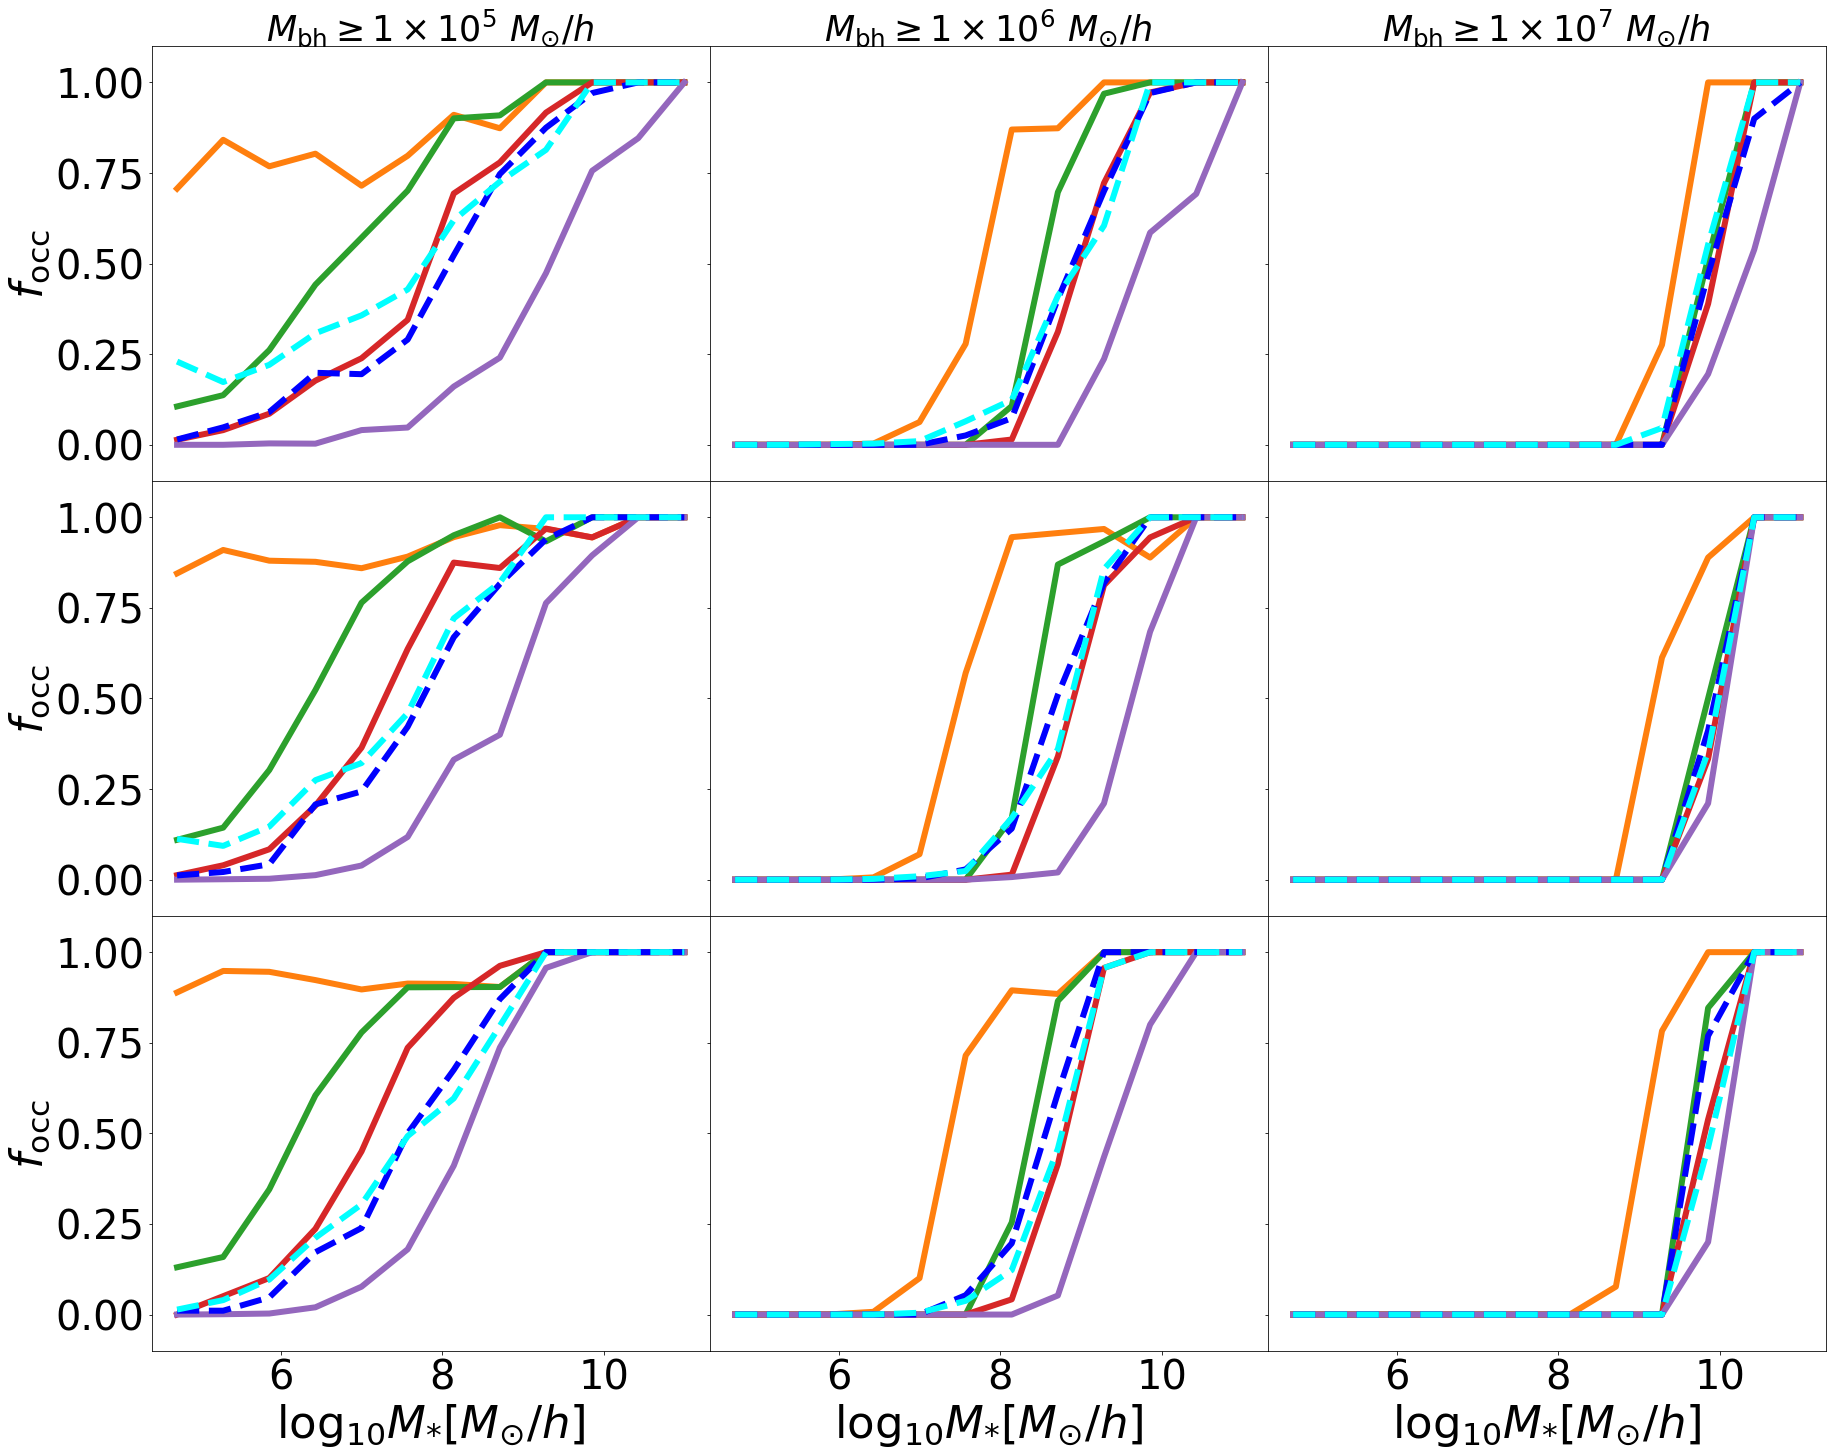

In [19]:
def make_plot(ax1,ax2,ax3,style='solid',col='black',plot1=True,plot2=True,plot3=True,redo=1):
    
        boxsize=arepo_package.get_box_size(basePath)
        boxsize/=1e3
       
        len1=[]
        len2=[]
        len3=[]

        len1BH=[]
        len2BH=[]
        len3BH=[]
        
        if('L6p25n1024' in basePath):
            subhalo_masscut=1e5
        if('L12p5n512' in basePath):
            subhalo_masscut=64e7
        if('L25n1024' in basePath):
            subhalo_masscut=64e7
        
        
        log_stellar_space=[]
        
        log_stellar_mass_bins=numpy.linspace(3,11,15)
        diff_bin=numpy.diff(log_stellar_mass_bins)[0]
        
        if(os.path.exists(basePath+'/BH_occupation_3.10.npy') & (redo==0)):
            log_stellar_space,len1,len1BH=numpy.load(basePath+'/BH_occupation_3.10_%d.npy'%redshift)
            log_stellar_space,len2,len2BH=numpy.load(basePath+'/BH_occupation_4.10_%d.npy'%redshift)
            log_stellar_space,len3,len3BH=numpy.load(basePath+'/BH_occupation_5.00_%d.npy'%redshift)    
        else:
            SubhaloBHMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',redshift)
            print(redshift,o)
            SubhaloMassType,o=arepo_package.get_subhalo_property(basePath,'SubhaloMassType',redshift) 
            SubhaloMass,o=arepo_package.get_subhalo_property(basePath,'SubhaloMass',redshift) 
            SubhaloStellarMass=SubhaloMassType[:,4]
            LogSubhaloStellarMass= numpy.log10(SubhaloStellarMass*1e10)

            
            for log_stellar_mass in log_stellar_mass_bins:
                try:
                    mask=(LogSubhaloStellarMass > log_stellar_mass-diff_bin/2) & (LogSubhaloStellarMass < log_stellar_mass+diff_bin/2)
                    mask2=SubhaloMass > subhalo_masscut/1e10
                    mask=mask&mask2
                    LogSubhaloStellarMassBin=LogSubhaloStellarMass[mask]
                    SubhaloBHMassBin=SubhaloBHMass[mask]
                    
                    
                    
                    
                    len1BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut1/1e10]))
                    len2BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut2/1e10]))
                    len3BH.append(len(SubhaloBHMassBin[SubhaloBHMassBin>=mass_cut3/1e10]))
                    
                    len1.append(len(SubhaloBHMassBin))
                    len2.append(len(SubhaloBHMassBin))
                    len3.append(len(SubhaloBHMassBin))
                    
                    log_stellar_space.append(log_stellar_mass)
                except IOError:
                    aaa=1



            len1=numpy.array(len1)
            len2=numpy.array(len2)
            len3=numpy.array(len3)
            
            len1BH=numpy.array(len1BH)
            len2BH=numpy.array(len2BH)
            len3BH=numpy.array(len3BH)
            log_stellar_space=numpy.array(log_stellar_space)

            numpy.save(basePath+'/BH_occupation_5.00_%d.npy'%redshift,[log_stellar_space,len1,len1BH])
            numpy.save(basePath+'/BH_occupation_6.00_%d.npy'%redshift,[log_stellar_space,len2,len2BH])
            numpy.save(basePath+'/BH_occupation_7.00_%d.npy'%redshift,[log_stellar_space,len3,len3BH])


        if(plot1):
            maskp=len1>0
            #print(log_stellar_space[maskp])
            err= 0*len1BH/len1*(numpy.sqrt(len1BH)/len1BH + numpy.sqrt(len1)/len1)
            ax1.errorbar(log_stellar_space[maskp]+offset,len1BH[maskp]/len1[maskp],err[maskp],color=col,linewidth=6,linestyle=style,label='SM%d_FOF%d'%(Msfmp,Mh))
        if(plot2):
            maskp=len2>0
            err= 0*len2BH/len2*(numpy.sqrt(len2BH)/len2BH + numpy.sqrt(len2)/len2)
            ax2.errorbar(log_stellar_space[maskp]+offset,len2BH[maskp]/len2[maskp],err[maskp],color=col,linewidth=6,linestyle=style)
        if(plot3):
            maskp=len3>0
        
            err= 0*len3BH/len3*(numpy.sqrt(len3BH)/len3BH + numpy.sqrt(len3)/len3)
            ax3.errorbar(log_stellar_space[maskp]+offset,len3BH[maskp]/len3[maskp],err[maskp],color=col,linewidth=6,linestyle=style,label=box_label)
        if(ii==2):
            ax1.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax2.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
            ax3.set_xlabel('$\log_{10}{M_{\mathrm{*}}}[M_{\odot}/h]$',fontsize=label_fontsize)
        
        ax1.tick_params(labelsize=40)
       # ax1.set_yscale('log')
        ax2.tick_params(labelsize=40)
       # ax2.set_yscale('log')
        ax3.tick_params(labelsize=40)
       # ax3.set_yscale('log')
        if(ii==0):       
            ax1.set_title(r'$M_{\mathrm{bh}}\geq1\times10^5 \ M_{\odot}/h$',fontsize=35)
            ax2.set_title(r'$M_{\mathrm{bh}}\geq1\times10^6 \ M_{\odot}/h$',fontsize=35)
            ax3.set_title(r'$M_{\mathrm{bh}}\geq1\times10^7 \ M_{\odot}/h$',fontsize=35)



label_fontsize=45


offset=0
f,axx=plt.subplots(3,3,figsize=(30,24),sharey=True,sharex=True)

            
mass_cut1=1e5 
mass_cut2=1e6
mass_cut3=1e7
levelmax_gas,logseedmass_gas=12,3.19
ii=0
for redshift in [0,1,2]:


    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='solid',col='C1',plot1=True,plot2=True,plot3=True)
 

    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='solid',col='C2',plot1=True,plot2=True,plot3=True)
    
    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='solid',col='C3',plot1=True,plot2=True,plot3=True)

    path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='solid',col='C4',plot1=True,plot2=True,plot3=True)

    Mh,Msfmp=1000,5
    offset=0
    box_label='L12p5n512'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='dashed',col='blue',plot1=True,plot2=True,plot3=True)

    Mh,Msfmp=3000,5
    offset=0
    box_label='L12p5n512'
    path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
    run='/AREPO/' # name of the simulation runs
    output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
    basePath=path_to_output+run+output
    make_plot(axx[ii,0],axx[ii,1],axx[ii,2],style='dashed',col='cyan',plot1=True,plot2=True,plot3=True)

    ii+=1
#axx[0,0].legend(loc='lower right',fontsize=28)

#axx[0,2].legend(loc='upper left',fontsize=32)
#axx[0].set_title('$M_{bh}>1.5e3 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[1].set_title('$M_{bh}>1.25e4 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[2].set_title('$M_{bh}>1e5 \ M_{\odot}/h$',fontsize=label_fontsize)


axx[0,0].set_ylim(-0.1,1.1)

#axx[]

axx[0,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)
axx[1,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

axx[2,0].set_ylabel('$f_{\mathrm{occ}}$',fontsize=label_fontsize)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/BH_occupations_stellar.png',bbox_inches='tight')


31875 31875
31875
7549 7549
7549
2892 2892
2892
727 715
715


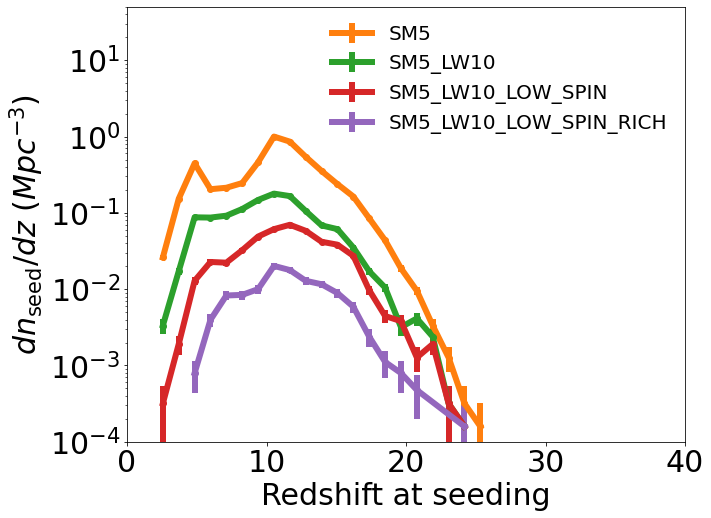

In [15]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=30,2,35

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


Msfmp,Mh=5,1000


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

#a,b,c=extract_distribution(basePath,d_type=0)
#norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='blue',linestyle='dotted')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

#a,b,c=extract_distribution(basePath,d_type=0)
#norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='grey',linestyle='dashed')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

#a,b,c=extract_distribution(basePath,d_type=0)
#norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='cyan',linestyle='dotted')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

#a,b,c=extract_distribution(basePath,d_type=0)
#norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='blue',linestyle='dashed')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b*h**3,c*h**3,marker='o',linewidth=6,color='C1',label='SM5')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b*h**3,c*h**3,marker='o',linewidth=6,color='C2',label='SM5_LW10')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b*h**3,c*h**3,marker='o',linewidth=6,color='C3',label='SM5_LW10_LOW_SPIN')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b*h**3,c*h**3,marker='o',linewidth=6,color='C4',label='SM5_LW10_LOW_SPIN_RICH')

             
axx.set_xlabel('Redshift at seeding',fontsize=30)


axx.set_ylabel('$dn_{\mathrm{seed}}/dz \ (Mpc^{-3})$',fontsize=30)

axx.set_ylim(1e-4,50)

axx.set_xlim(0,40)

axx.tick_params(labelsize=30)

axx.set_yscale('log')

axx.legend(loc='upper right',fontsize=20,frameon=False)

plt.savefig('./Paper7_figures/Redshift_at_seeding.png',bbox_inches='tight')


Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
0.3333333333333333
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
0.3333333333333333
Desired redshift:  8
Output redshift:  8.012172948865935
Output snapshot:  17
Desired redshift:  8
Output redshift:  8.012172948865935
Output snapshot:  17
0.3333333333333333
Desired redshift:  10
Output redshift:  9.996590466186332
Output snapshot:  15
Desired redshift:  10
Output redshift:  9.996590466186332
Output snapshot:  15
0.3333333333333333
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
0.3333333333333333
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  6
Output redshift:  6.010757

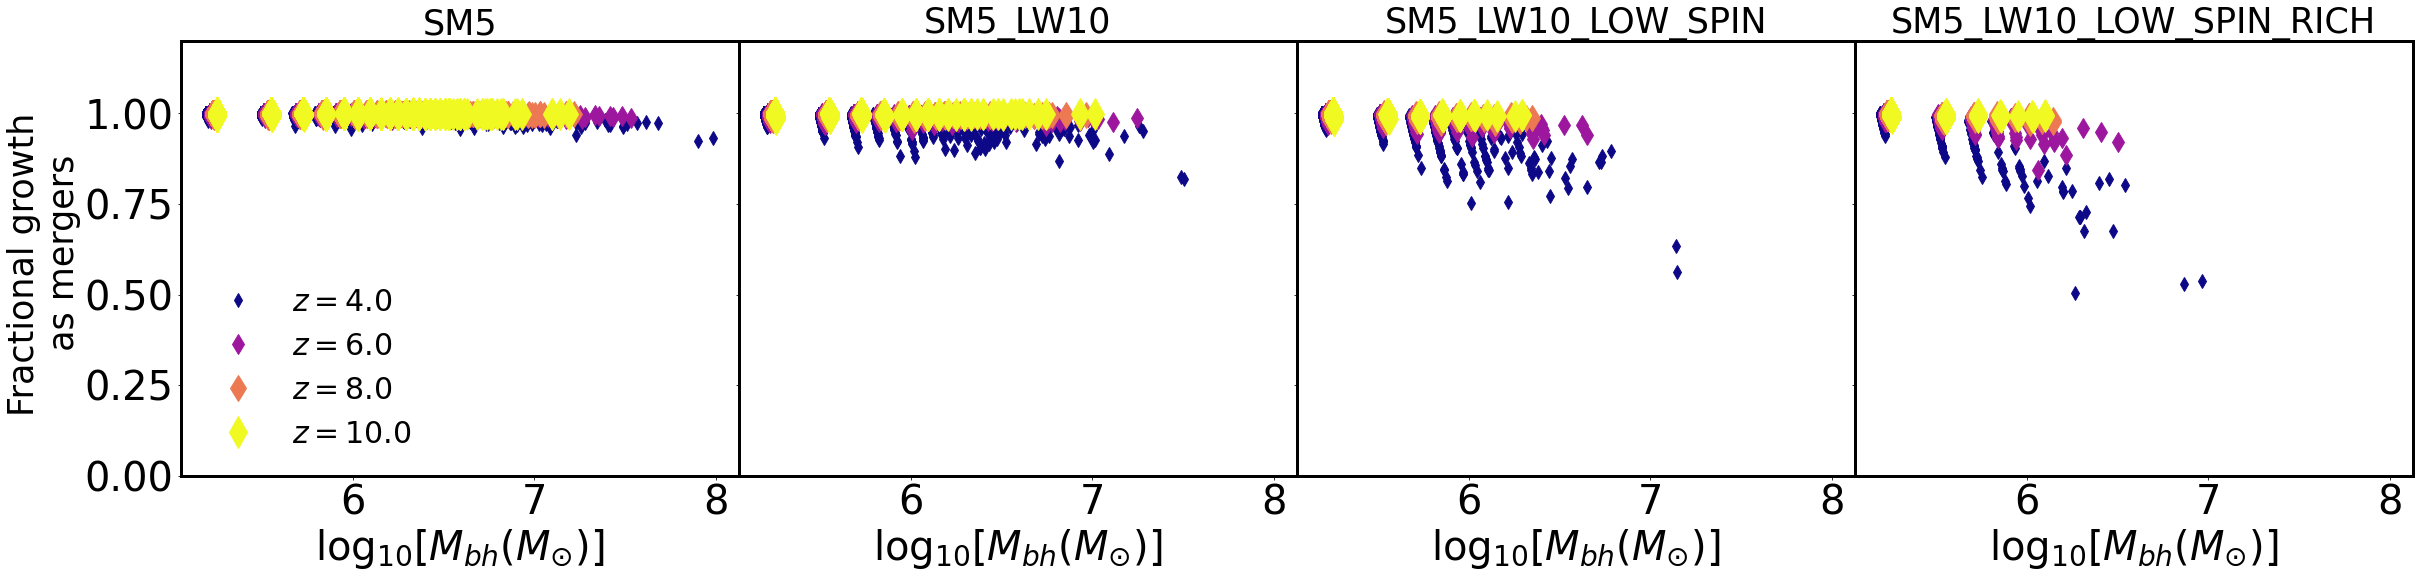

In [22]:
def make_plot(basePath, desired_redshift,col,mstyle,lstyle,obj,make_scatter=1,add_unresolved=0,unresolved_fac=4,LABL=1):
    if ('mirror' in basePath):
        suffix='$-1.6\sigma$'
    elif ('normal' in basePath):
        suffix='$0\sigma$'
    elif ('3sigma' in basePath):
        suffix='$3\sigma$'
    else:
        suffix='$1.6\sigma$'
    #GroupMassType,output_redshift=arepo_package.get_group_property(basePath,'GroupMassType',desired_redshift)
    BH_Mass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',5,desired_redshift)
    BH_Mass*=1e10
    #N_mergers=numpy.load(basePath+'/no_of_BH_mergers_%.2f.npy'%desired_redshift)
    
    BH_Progs,o=arepo_package.get_particle_property(basePath,'BH_Progs',5,desired_redshift)
    
    #print(BH_Progs*10**actual_logseedmass)
    BH_Mass_mergers=(BH_Progs)*10**actual_logseedmass 
    
    if(add_unresolved):
        BH_Mass_mergers+=(BH_Progs-1)*unresolved_fac*10**actual_logseedmass 
    #print(BH_Mass)
    
    Fractional_growth=BH_Mass_mergers/(BH_Mass)
    
    #print(BH_Mass,BH_Progs)
    if(LABL):
        labl='$z=%.1f$'%(desired_redshift)
    else:
        labl=''
    #colors = np.linspace(0, 1, #)
    if (make_scatter==1):
        print(colors[1])
        obj.errorbar(numpy.log10(BH_Mass)-log10(h)+offset,Fractional_growth,ms=10+float(i)*4,linewidth=0,color=cm.plasma(colors[i]),marker=mstyle,label=labl,alpha=1)
        #obj.errorbar(numpy.log10(BH_Mass),N_mergers_alternate,ms=10,linewidth=0,color='red',marker=mstyle,label='levelmax=%d,%s'%(levelmax,suffix));
    obj.set_ylim(0,1.2)
#    obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=2,color=col,linestyle=lstyle);
    obj.set_xlabel('$\log_{10}[M_{bh}(M_{\odot})]$',fontsize=40)
    obj.tick_params(labelsize=40)
    



f,axx=plt.subplots(1,4,figsize=(40,8),sharey=True,sharex=True)
ax=axx

levelmax,logseedmass=12,3.19
offset=0

actual_logseedmass=5.00


#ax.set_title('BRAHMA-12.5-R5',fontsize=30)
colors=numpy.linspace(0,1,4)
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

offset=0
i=0
for desired_redshift,col in list(zip([4,6,8,10],['C0','C1','C2','C3','C4','C5','C6','C7']))[:]:
    offset+=0.02
    #desired_redshift=6
    make_plot(basePath, desired_redshift,col,'d','solid',ax[0],add_unresolved=0,LABL=1)
    i+=1


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 
offset=0
i=0
for desired_redshift,col in list(zip([4,6,8,10],['C0','C1','C2','C3','C4','C5','C6','C7']))[:]:
    offset+=0.02
    #desired_redshift=6
    make_plot(basePath, desired_redshift,col,'d','solid',ax[1],add_unresolved=0,LABL=0)
    i+=1  



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 
offset=0
i=0
for desired_redshift,col in list(zip([4,6,8,10],['C0','C1','C2','C3','C4','C5','C6','C7']))[:]:
    offset+=0.02
    #desired_redshift=6
    make_plot(basePath, desired_redshift,col,'d','solid',ax[2],add_unresolved=0,LABL=0)
    i+=1
    
    
    
    
    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 
offset=0
i=0
for desired_redshift,col in list(zip([4,6,8,10],['C0','C1','C2','C3','C4','C5','C6','C7']))[:]:
    offset+=0.02
    #desired_redshift=6
    make_plot(basePath, desired_redshift,col,'d','solid',ax[3],add_unresolved=0,LABL=0)
    i+=1

ax[0].legend(loc='lower left',fontsize=30,frameon=False)
#ax[0].set_xlabel('$M_{bh}(M_{\odot}/h)$',fontsize=30)


ax[0].set_ylabel('Fractional growth \n as mergers',fontsize=35)

ax[0].set_title('SM5',fontsize=35)
ax[1].set_title('SM5_LW10',fontsize=35)
ax[2].set_title('SM5_LW10_LOW_SPIN',fontsize=35)
ax[3].set_title('SM5_LW10_LOW_SPIN_RICH',fontsize=35)


for axx in ax.flatten():
    axx.spines['top'].set_linewidth(3)    # Top axis
    axx.spines['bottom'].set_linewidth(3) # Bottom axis
    axx.spines['left'].set_linewidth(3)   # Left axis
    axx.spines['right'].set_linewidth(3) 


plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig('./Paper7_figures/mergers_vs_accretion.png',bbox_inches='tight')

#    median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)



7549 7549
7549
981 981
981
1227 1227
1227


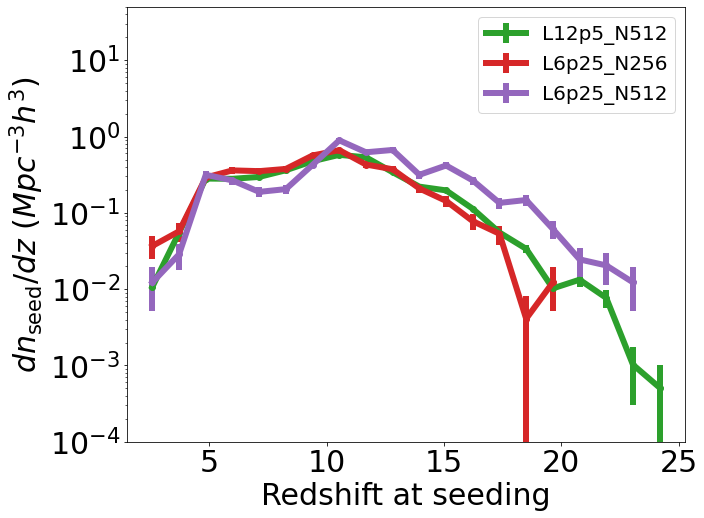

In [15]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=30,2,35

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


Msfmp,Mh=5,1000





path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C2',label='L12p5_N512')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L6p25n256//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C3',label='L6p25_N256')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L6p25n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C4',label='L6p25_N512')

             
axx.set_xlabel('Redshift at seeding',fontsize=30)

axx.legend(loc='upper right',fontsize=20)
axx.set_ylabel('$dn_{\mathrm{seed}}/dz \ (Mpc^{-3}h^3)$',fontsize=30)

axx.set_ylim(1e-4,50)

axx.tick_params(labelsize=30)

axx.set_yscale('log')

plt.savefig('./Paper7_figures/Redshift_at_seeding.png',bbox_inches='tight')


36675 36463
36463
31875 31875
31875
7549 7549
7549
2892 2892
2892
727 715
715


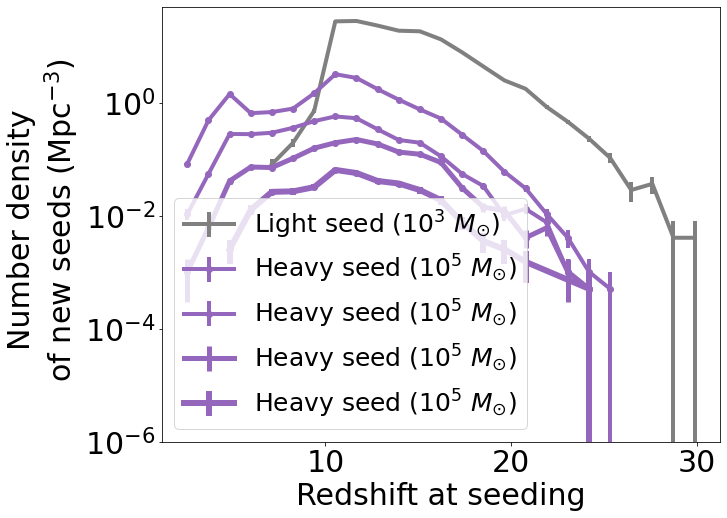

In [67]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=30,2,35

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


Msfmp,Mh=5,1000


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=4,color='grey',linestyle='solid',label='Light seed ($10^3~M_{\odot}$)')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C4',label='Heavy seed ($10^5~M_{\odot}$)')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C4',label='Heavy seed ($10^5~M_{\odot}$)')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=5,color='C4',label='Heavy seed ($10^5~M_{\odot}$)')





path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C4',label='Heavy seed ($10^5~M_{\odot}$)')

             
axx.set_xlabel('Redshift at seeding',fontsize=30)


axx.set_ylabel('Number density \n of new seeds ($\mathrm{Mpc}^{-3}$)',fontsize=30)

axx.set_ylim(1e-6,50)

axx.tick_params(labelsize=30)

axx.set_yscale('log')

axx.legend(loc='lower left',fontsize=25)

plt.savefig('./Paper7_figures/Redshift_at_seeding.png',bbox_inches='tight')


50409 50022
50022
1463 1463
1463
36675 36463
36463
1264 1264
1264
31875 31875
31875
7549 7549
7549
2892 2892
2892
727 715
715
Desired redshift:  7
Output redshift:  7.005417045544533
Output snapshot:  18
{'NumPart_ThisFile': array([8302521, 8437333,       0,       0,   11042,      39], dtype=int32), 'NumPart_Total': array([133020567, 134217728,         0,         0,     61143,       430],
      dtype=uint32), 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32), 'MassTable': array([0.        , 0.00010512, 0.        , 0.        , 0.        ,
       0.        ]), 'Time': 0.12491541593783131, 'Redshift': 7.005417045544533, 'BoxSize': 12500.0, 'NumFilesPerSnapshot': 16, 'Omega0': 0.3089, 'OmegaLambda': 0.6911, 'OmegaBaryon': 0.0486, 'HubbleParam': 0.6771, 'Flag_Sfr': 1, 'Flag_Cooling': 1, 'Flag_StellarAge': 0, 'Flag_Metals': 0, 'Flag_Feedback': 1, 'Flag_DoublePrecision': 0, 'Composition_vector_length': 0, 'Git_commit': b'e9248873f6fabf87d52c75937a7e11a479b2847d', 'Git_date': b

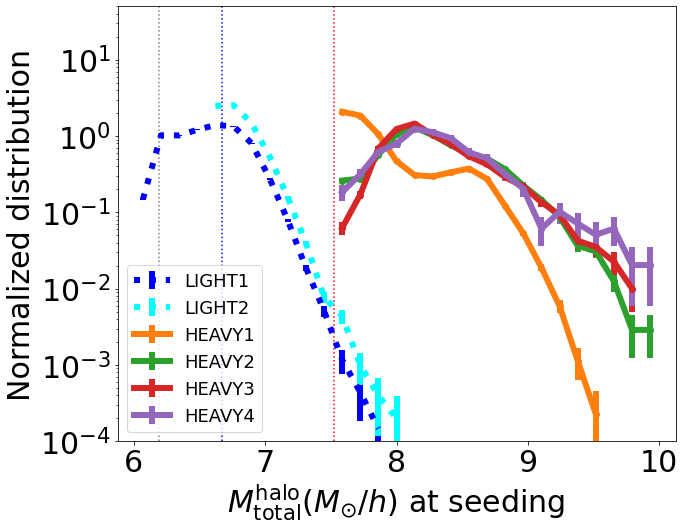

In [4]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=30,6,10

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19





path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=6,color='blue',linestyle='dotted',label='LIGHT1')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='grey',label='LIGHT_SM5_FOF1000',linestyle='dashed')





path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=6,color='cyan',linestyle='dotted',label='LIGHT2')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
#axx.errorbar(a,b,c,marker='',linewidth=6,color='blue',label='LIGHT_SM5_FOF3000',linestyle='dashed')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C1',label='HEAVY1')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C2',label='HEAVY2')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C3',label='HEAVY3')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass',number_density=0)
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=6,color='C4',label='HEAVY4')

             
    
massdm=arepo_package.load_snapshot_header(basePath,7)['MassTable'][1]

axx.axvline(numpy.log10(32*massdm*1e10),linestyle='dotted',color='red')

axx.axvline(numpy.log10(1000*1.56e3),linestyle='dotted',color='grey')

axx.axvline(numpy.log10(3000*1.56e3),linestyle='dotted',color='blue')

#axx.axvline(numpy.log10(500*1e5),linestyle='dashed')


axx.set_xlabel('$M^{\mathrm{halo}}_{\mathrm{total}}(M_{\odot}/h)$ at seeding',fontsize=30)


axx.set_ylabel('Normalized distribution',fontsize=30)

axx.tick_params(labelsize=30)

axx.set_yscale('log')
axx.set_ylim(1e-4,50)

axx.legend(loc='lower left',fontsize=18)
plt.savefig('./Paper7_figures/Halomass_at_seeding.png',bbox_inches='tight')



In [103]:
massdm*1e10*32/1e5

336.38620535423996

50409 50022
50022
[17.51903294 17.04266007 16.57852326 ... 10.40790682 10.40790682
  9.09160147] 31.778287662252524


TypeError: get_distribution() got an unexpected keyword argument 'explicit_bins'

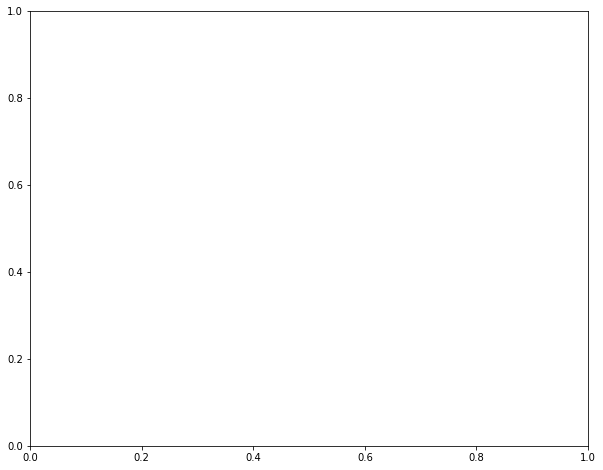

In [37]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=40,-1,5

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


Msfmp,Mh=5,1000


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=2,color='grey',linestyle='dashed')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=6,color='grey',linestyle='dashed')



path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=2,color='blue',linestyle='dashed')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=6,color='blue',linestyle='dashed')



path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C1')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C2')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C3')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='Neighbor')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C4')

             
    
massdm=arepo_package.load_snapshot_header(basePath,7)['MassTable'][1]

#axx.axvline(numpy.log10(32*massdm*1e10),linestyle='dashed')

#axx.axvline(numpy.log10(500*1e5),linestyle='dashed')


axx.set_xlabel('$N_{\mathrm{ngb}}$ at seeding',fontsize=30)


axx.set_ylabel('$n_{\mathrm{seed}} (Mpc^{-3}h^3)$',fontsize=30)

axx.tick_params(labelsize=30)

axx.set_yscale('log')

axx.set_ylim(1e-4,50)

plt.savefig('./Paper7_figures/Environment_at_seeding.png',bbox_inches='tight')



In [ ]:
f,axxx=plt.subplots(1,1,figsize=(10,8),sharey=True)
Nbins,minimum,maximum=30,6,10

axx=axxx
redshift_cut=7

redshift_max=40

LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


Msfmp,Mh=5,1000


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=2,color='C0',linestyle='dashed')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='',linewidth=2,color='C0')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C1')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C2')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C3')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output 

a,b,c=extract_distribution(basePath,d_type=0,proprty='halomass')
norm=scipy.integrate.trapz(b,a) 
axx.errorbar(a,b,c,marker='o',linewidth=4,color='C4')

             
    
massdm=arepo_package.load_snapshot_header(basePath,7)['MassTable'][1]

#axx.axvline(numpy.log10(32*massdm*1e10),linestyle='dashed')

#axx.axvline(numpy.log10(500*1e5),linestyle='dashed')


axx.set_xlabel('$M^{\mathrm{halo}}_{\mathrm{total}}(M_{\odot}/h)$ at seeding',fontsize=30)


axx.set_ylabel('$n_{\mathrm{seed}} (Mpc^{-3}h^3)$',fontsize=30)

axx.tick_params(labelsize=30)

axx.set_yscale('log')


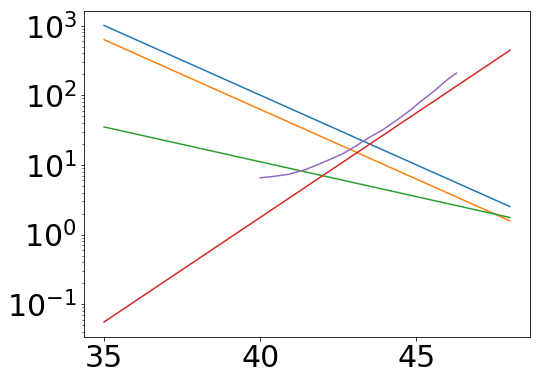

In [3]:
import scipy.interpolate
def bolometric_corrections(L,band):
    if (band=='5100A'):
        c,d=40,-0.2
    if (band=='3000A'):
        c,d=25,-0.2
    if (band=='1400A'):
        c,d=7,-0.1    
    if (band=='2-10keV'):
        c,d=7,0.3
    return c * (L/1e42)**d


log_bol_lum_space=numpy.linspace(35,48,30)

f,ax=plt.subplots(1,1,figsize=(8,6))
band='5100A'
ax.plot(log_bol_lum_space,bolometric_corrections(10**log_bol_lum_space,band))

band='3000A'
ax.plot(log_bol_lum_space,bolometric_corrections(10**log_bol_lum_space,band))

band='1400A'
ax.plot(log_bol_lum_space,bolometric_corrections(10**log_bol_lum_space,band))

band='2-10keV'
ax.plot(log_bol_lum_space,bolometric_corrections(10**log_bol_lum_space,band))


data=numpy.loadtxt('/home/aklantbhowmick/Aklant/data_from_papers/bol_correction_vasudevan.txt')
ax.plot(data[:,0],data[:,1])

ax.set_yscale('log')

ax.tick_params(labelsize=30)


def bolometric_corrections2(L):
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/data_from_papers/bol_correction_vasudevan.txt')
    gen=scipy.interpolate.interp1d(data[:,0],data[:,1])
    return gen(numpy.log10(L))

Desired redshift:  2
Output redshift:  2.0020281392528516
Output snapshot:  23
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  2
Output redshift:  2.0020281392528516
Output snapshot:  23
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


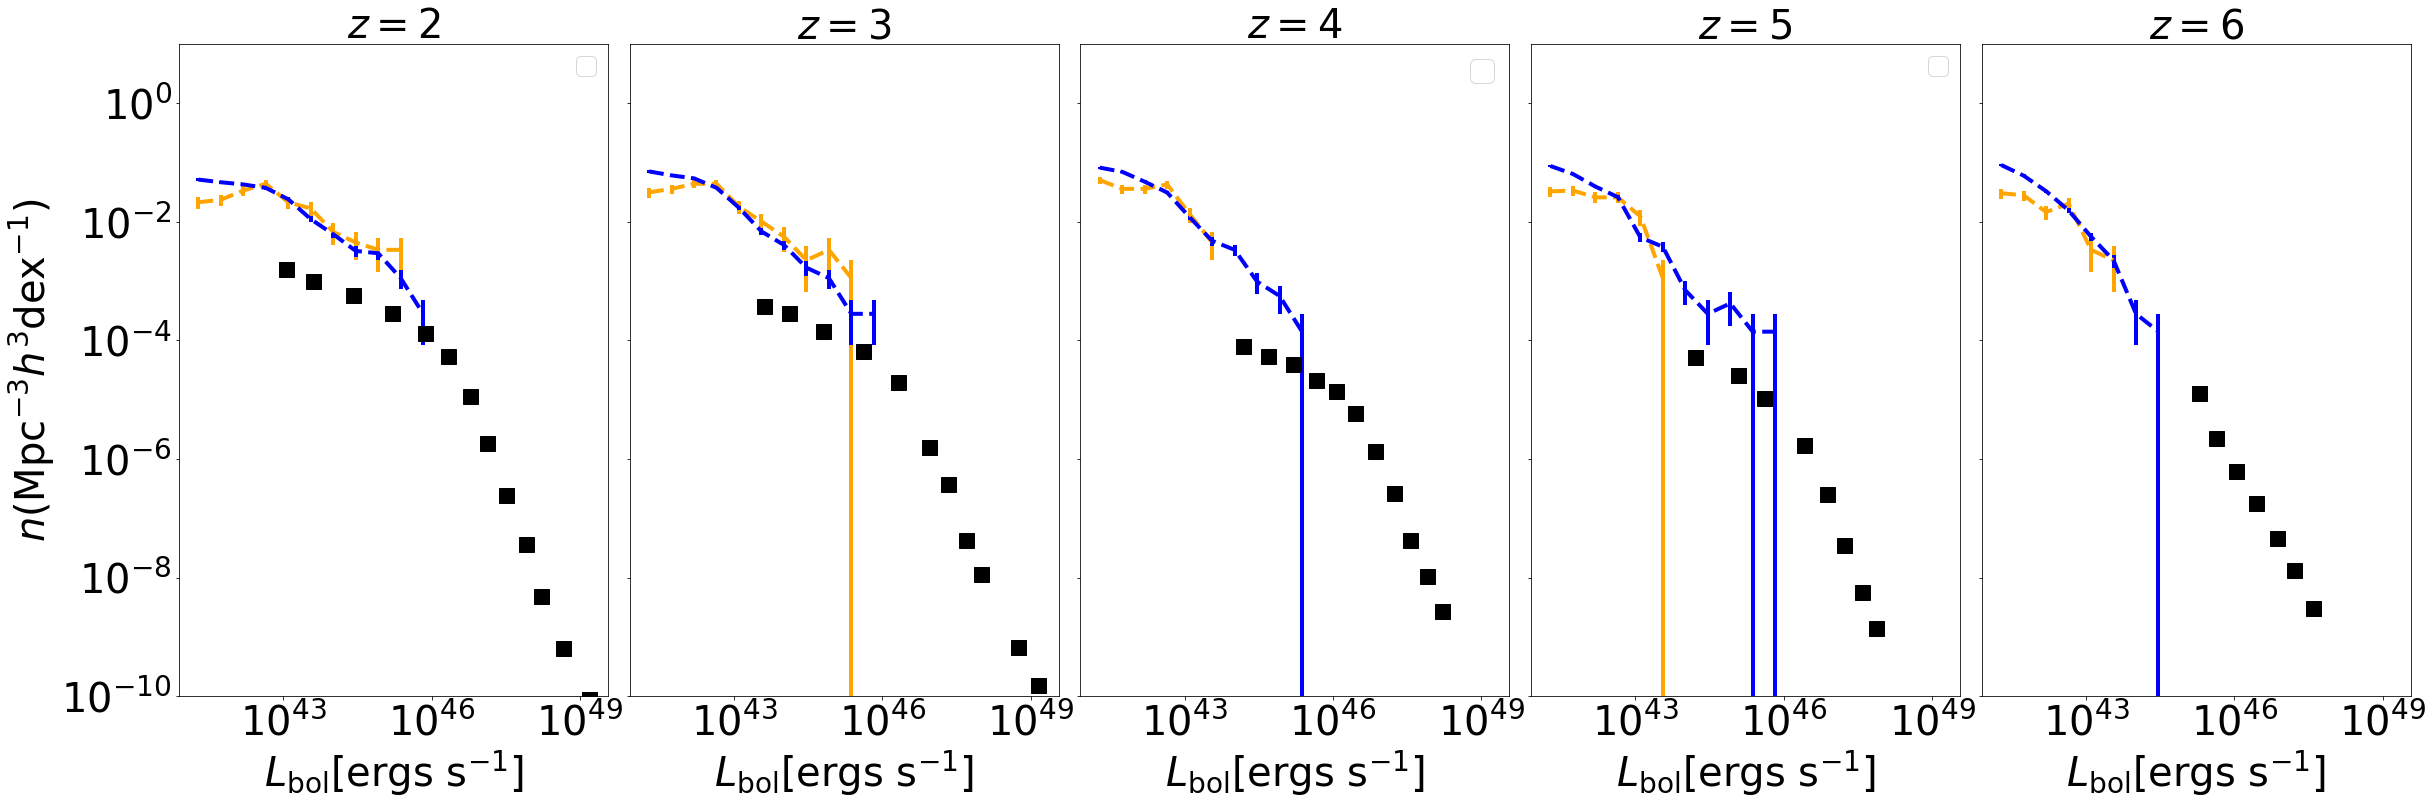

In [4]:
f,ax=plt.subplots(1,5,figsize=(40,12),sharey=True,sharex=True)



Gpc_to_Mpc=1000

def make_plot(ax,col='black',width=4,style='solid',labl1='',labl2=''):
    ii=0
    for desired_redshift in [2,3,4,5,6]:
        

        labll1,labll2='',''
     
        ax[0].set_ylim(1e-10,10)
        
        ax[ii].set_title('$z=%d$'%desired_redshift,fontsize=40)
        BHMdot,o=arepo_package.get_particle_property(basePath,'BH_Mdot',5,desired_redshift)
        BHLum=BHMdot*total_conv
        box_size=arepo_package.get_box_size(basePath)/1e3

        log_HM_min, log_HM_max, Nbins=41,46,12

        a,b,c=arepo_package.luminosity_function(BHLum, box_size, log_HM_min, log_HM_max, Nbins)
        c[c>b]=0
        mask=b>0
        
   
        if(ii==3):
            labl=labl1
        elif(ii==2):
            labl=labl2
        else:
            labl=''
            
        ax[ii].errorbar(a[mask],b[mask],c[mask],color=col,linewidth=width,linestyle=style,label=labl)
        ax[ii].tick_params(labelsize=40)
        ax[ii].set_xlabel('$L_{\mathrm{bol}}[\mathrm{ergs \ s^{-1}}]$',fontsize=40)
        ii+=1

        
Mh,Msfmp=1000,5
       


box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output

make_plot(ax,col='orange',style='dashed')


path_to_output='/orange//lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS//' # this is the folder containing the simulation run
run='/density_and_metallicity_based_criterion_L25n512/AREPO' # name of the simulation runs
basePath=path_to_output+run+'/output_debug6_test_painted0p5_ratio3000_SFMFGM5/'

make_plot(ax,col='blue',style='dashed')




for desired_redshift in [6]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    ax[4].errorbar(data[:,0],data[:,1]/0.7**3,color='black',marker='s',linewidth=0,ms=15)

for desired_redshift in [5]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    ax[3].errorbar(data[:,0],data[:,1]/0.7**3,color='black',marker='s',linewidth=0,ms=15)

for desired_redshift in [4]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    ax[2].errorbar(data[:,0],data[:,1]/0.7**3,color='black',marker='s',linewidth=0,ms=15)

for desired_redshift in [3]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    ax[1].errorbar(data[:,0],data[:,1]/0.7**3,color='black',marker='s',linewidth=0,ms=15)

    
for desired_redshift in [2]: 
    data=numpy.loadtxt('../arepo_code_development/observational_data/Shen20_AGNLF_z%d_actualdata.txt'%desired_redshift)      
    ax[0].errorbar(data[:,0],data[:,1]/0.7**3,color='black',marker='s',linewidth=0,ms=15)
 
    #ax[0].errorbar(obs_lum_bol,obs_y_mid/Gpc_to_Mpc**3/0.7**3*2.512,color='black',marker='o',linewidth=0)
    #ax[1].errorbar(obs_lum_bol,obs_y_mid/Gpc_to_Mpc**3/0.7**3*2.512,color='black',marker='o',linewidth=0)
    #ax[2].errorbar(obs_lum_bol,obs_y_mid/Gpc_to_Mpc**3/0.7**3*2.512,color='black',marker='o',linewidth=0)
    #ax[3].errorbar(obs_lum_bol,obs_y_mid/Gpc_to_Mpc**3/0.7**3*2.512,color='black',label='Matsuoka+2023 (z=7)',marker='o',linewidth=0)

    


                #labl1,labl2='',''

        

ax[0].set_ylabel('$n(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex^{-1}})$',fontsize=40)


ax[3].legend(loc='upper right',fontsize=25)

ax[2].legend(loc='upper right',fontsize=30)

ax[0].legend(loc='upper right',fontsize=25)











ax[0].set_xscale('log')
ax[0].set_yscale('log')

plt.subplots_adjust(wspace=0.05,hspace=0)

#plt.savefig('./Paper6_figures/LFs.png',bbox_inches='tight')





Desired redshift:  2
Output redshift:  2.0020281392528516
Output snapshot:  23
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  2
Output redshift:  2.0020281392528516
Output snapshot:  23
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  6
Output redshift:  6.0107573988449
Output snapshot:  19
Desired redshift:  2
Output redshift:  2.0020281392528516
Output snapshot:  10
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  9
Desired redshift:  4
Output redshift:  4.0079451114652676
Output

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


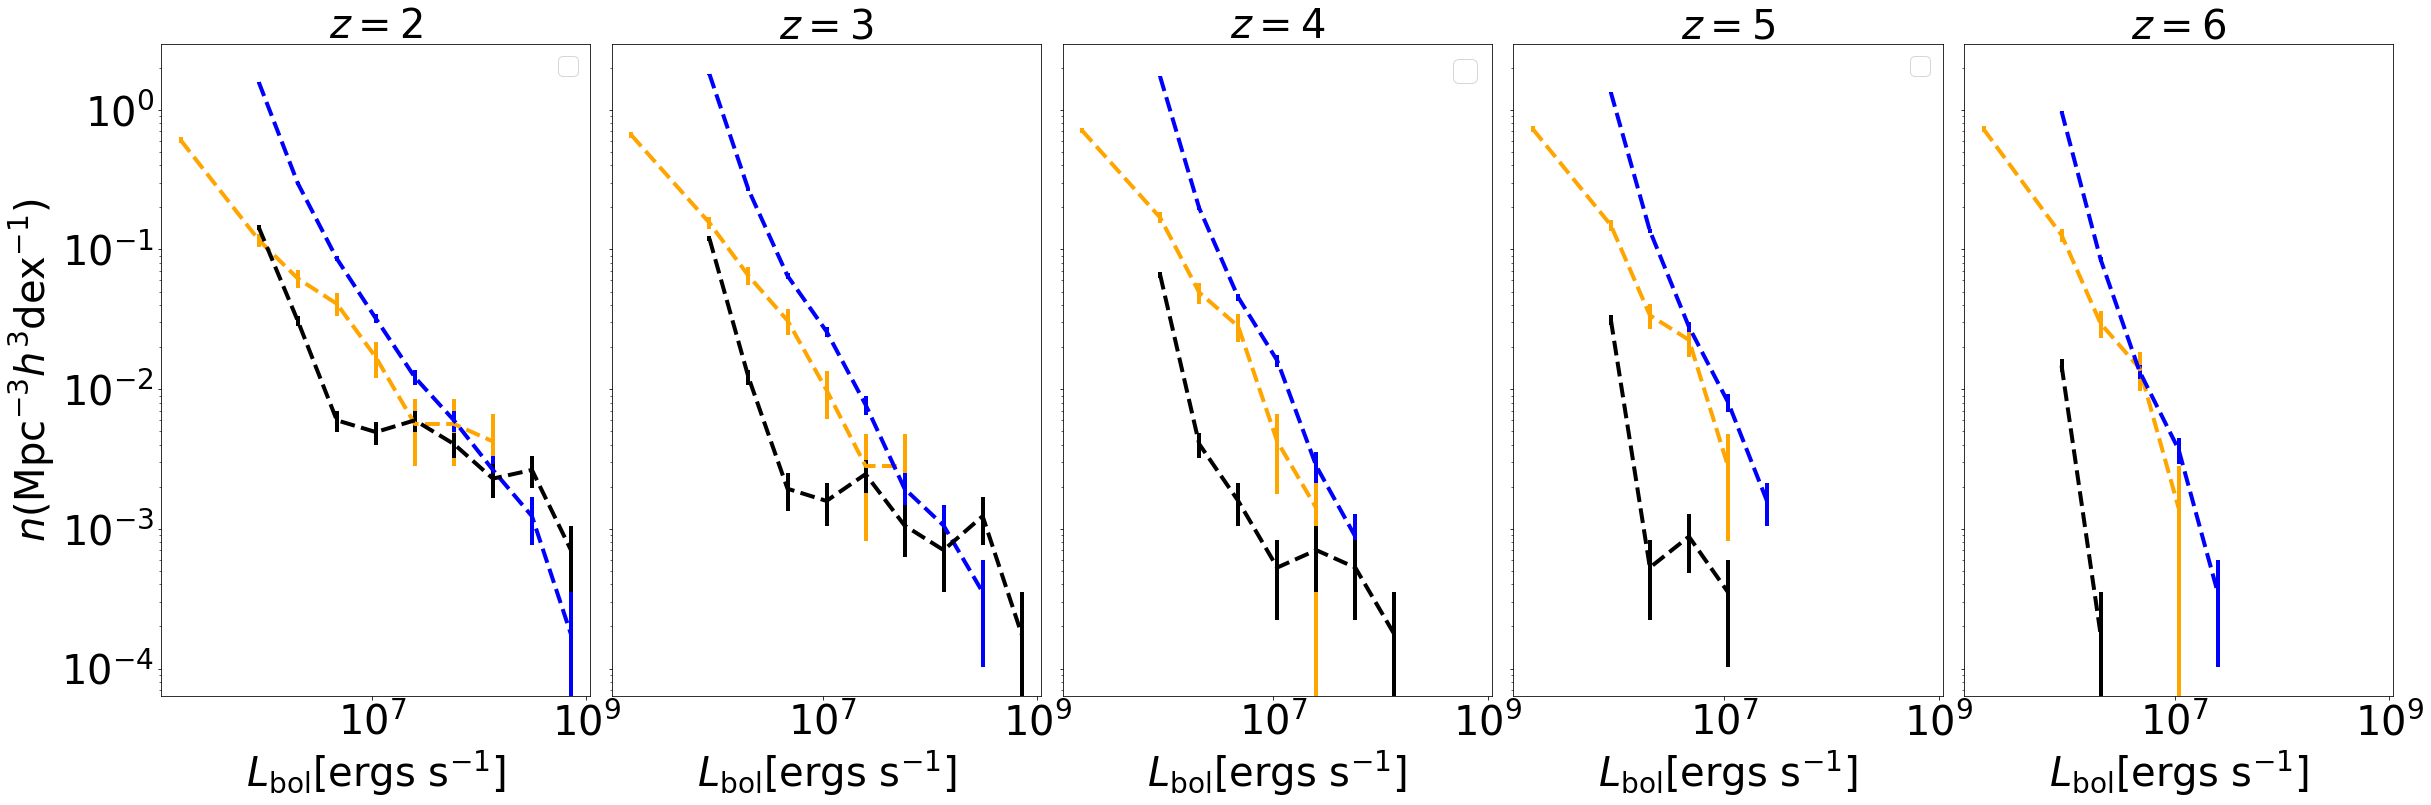

In [5]:
f,ax=plt.subplots(1,5,figsize=(40,12),sharey=True,sharex=True)



Gpc_to_Mpc=1000

def make_plot(ax,col='black',width=4,style='solid',labl1='',labl2=''):
    ii=0
    for desired_redshift in [2,3,4,5,6]:
        

        labll1,labll2='',''
     
        #ax[0].set_ylim(1e-10,10)
        
        ax[ii].set_title('$z=%d$'%desired_redshift,fontsize=40)
        BHMass,o=arepo_package.get_particle_property(basePath,'BH_Mass',5,desired_redshift)
        BHMass=BHMass*1e10

        box_size=arepo_package.get_box_size(basePath)/1e3

        log_HM_min, log_HM_max, Nbins=5,9,12

        a,b,c=arepo_package.luminosity_function(BHMass, box_size, log_HM_min, log_HM_max, Nbins)
        c[c>b]=0
        mask=b>0
        
   
        if(ii==3):
            labl=labl1
        elif(ii==2):
            labl=labl2
        else:
            labl=''
            
        ax[ii].errorbar(a[mask],b[mask],c[mask],color=col,linewidth=width,linestyle=style,label=labl)
        ax[ii].tick_params(labelsize=40)
        ax[ii].set_xlabel('$L_{\mathrm{bol}}[\mathrm{ergs \ s^{-1}}]$',fontsize=40)
        ii+=1

        
Mh,Msfmp=1000,5
       


box_label='L12p5n512'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh)
basePath=path_to_output+run+output

make_plot(ax,col='orange',style='dashed')


path_to_output='/orange//lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS//' # this is the folder containing the simulation run
run='/density_and_metallicity_based_criterion_L25n512/AREPO' # name of the simulation runs
basePath=path_to_output+run+'/output_debug6_test_painted0p5_ratio3000_SFMFGM5/'

make_plot(ax,col='blue',style='dashed')


    
path_to_output='/orange//lblecha/aklantbhowmick/arepo_runs_aklant/' # this is the folder containing the simulation run
run='/L25_n512/' # name of the simulation runs
basePath=path_to_output+run+'/output/'


make_plot(ax,col='black',style='dashed')






                #labl1,labl2='',''

        

ax[0].set_ylabel('$n(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex^{-1}})$',fontsize=40)


ax[3].legend(loc='upper right',fontsize=25)

ax[2].legend(loc='upper right',fontsize=30)

ax[0].legend(loc='upper right',fontsize=25)











ax[0].set_xscale('log')
ax[0].set_yscale('log')

plt.subplots_adjust(wspace=0.05,hspace=0)

#plt.savefig('./Paper6_figures/LFs.png',bbox_inches='tight')





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


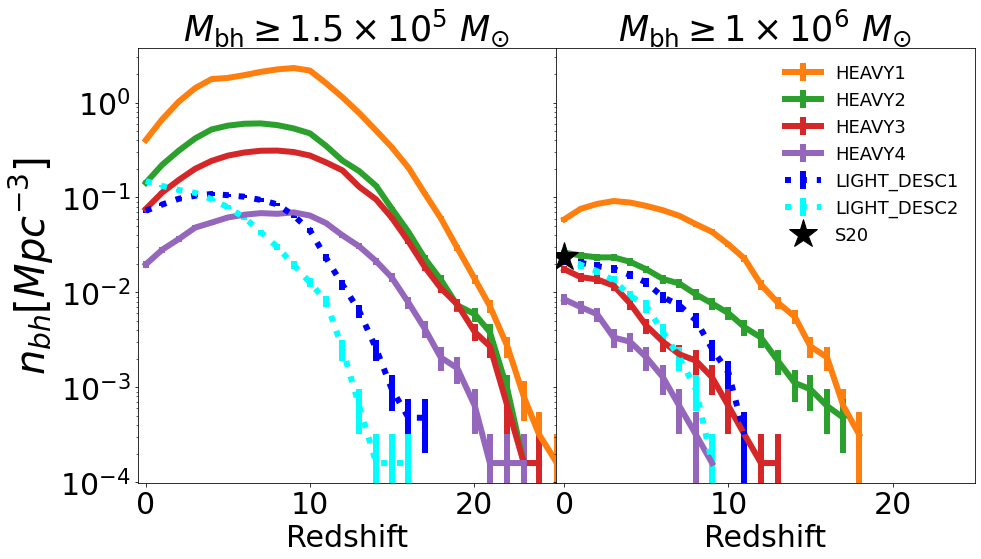

In [9]:
def make_plot(ax3,ax4,width=6,style='solid',col='black',plot1=True,plot2=True,plot3=True,plot4=True,redo=0):
    
        boxsize=arepo_package.get_box_size(basePath)
        boxsize/=1e3
       
        len1=[]
        len2=[]
        len3=[]
        len4=[]
        z_space=[]
        
        if(os.path.exists(basePath+'/number_of_BHs_5.00.npy') & (redo==0)):
            z_space,len3=numpy.load(basePath+'/number_of_BHs_5.00.npy')
            z_space,len4=numpy.load(basePath+'/number_of_BHs_5.90.npy')
        else:
        
            for redshift in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
                try:
                    BH_Mass,o=arepo_package.get_particle_property(basePath,'BH_Mass',5,redshift)
                    
                    #BH_Mdot,o=arepo_package.get_particle_property(basePath,'BH_Mdot',5,redshift)
                    
                    #BH_Lum = BH_Mdot*total_conv

    
                    len3.append(len(BH_Mass[BH_Mass>=mass_cut3/1e10]))
                    len4.append(len(BH_Mass[BH_Mass>=mass_cut4/1e10]))
                    z_space.append(o)
                except:
                    aaa=1
            



            len3=numpy.array(len3)
            len4=numpy.array(len4)
            
            z_space=numpy.array(z_space)


            numpy.save(basePath+'/number_of_BHs_5.00.npy',[z_space,len3])
            numpy.save(basePath+'/number_of_BHs_5.90.npy',[z_space,len4])


        if(plot3):
            ax3.errorbar(z_space[len3>0],len3[len3>0]/boxsize**3*hubble**3,numpy.sqrt(len3[len3>0])/boxsize**3*hubble**3,color=col,linewidth=width,linestyle=style,label='',marker=' ',ms=20)
        if(plot4):
            ax4.errorbar(z_space[len4>0],len4[len4>0]/boxsize**3*hubble**3,numpy.sqrt(len4[len4>0])/boxsize**3*hubble**3,color=col,linewidth=width,linestyle=style,label=box_label,marker=' ',ms=20)
        #if(Mh==1000):
         #   print(len4/boxsize**3)
        #print(z_space)
            

        ax3.set_xlabel('Redshift',fontsize=label_fontsize)
        ax4.set_xlabel('Redshift',fontsize=label_fontsize)

        ax3.tick_params(labelsize=30)
        ax3.set_yscale('log')
        ax4.tick_params(labelsize=30)
        ax4.set_yscale('log')
        

        ax3.set_title(r'$M_{\mathrm{bh}} \geq 1.5\times10^5 \ M_{\odot}$',fontsize=35)
        ax4.set_title(r'$M_{\mathrm{bh}} \geq 1\times10^6 \ M_{\odot}$',fontsize=35)



label_fontsize=30      
f,axx=plt.subplots(1,2,figsize=(15,8),sharey=True,sharex=True)

            
mass_cut3=1e5
mass_cut4=8e5
levelmax_gas,logseedmass_gas=12,3.19



box_label='HEAVY1'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],style='solid',col='C1',plot1=True,plot2=True,plot3=True,plot4=True,redo=0)

box_label='HEAVY2'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],style='solid',col='C2',plot1=False,plot2=False,plot3=True,plot4=True)


box_label='HEAVY3'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],style='solid',col='C3',plot1=True,plot2=True,plot3=True,plot4=True)

box_label='HEAVY4'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],style='solid',col='C4',plot1=True,plot2=True,plot3=True,plot4=True)




box_label='LIGHT_DESC1'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],width=6,style='dotted',col='blue',plot1=True,plot2=True,plot3=True,plot4=True)

box_label='LIGHT_DESC2'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
make_plot(axx[0],axx[1],width=6,style='dotted',col='cyan',plot1=True,plot2=True,plot3=True,plot4=True)



'''
box_label=''
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 
make_plot(axx[0],axx[1],width=4,style='dashed',col='grey',plot1=True,plot2=True,plot3=True,plot4=True)
'''


for ii in [1]:
    
    #data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09.txt')
    #axx[ii].errorbar([0],[10**data[:,1][0]/0.7**3],marker='d',label='',linewidth=0,ms=10,color='black')

    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10.txt')
    #axx[ii].errorbar([0],[10**data[:,1][0]],marker='s',label='C10',linewidth=0,ms=15,color='black')

    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08.txt')
    #axx[ii].errorbar([0],[10**data[:,1][0]],marker='o',label='M08',linewidth=0,ms=15,color='black')


    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20.txt')
    axx[ii].errorbar([0],[10**data[1]],marker='*',label='S20',linewidth=0,ms=30,color='black')
    
    

#for ii in [0]:
    
#    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09.txt')
#    axx[ii].errorbar([0],[10**data[:,1][0]],marker='d',label='S09',linewidth=0,ms=30,color='black')

    #data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10.txt')
    #axx[ii].errorbar([0],[10**data[:,1][0]/0.7**3],marker='s',label='C10',linewidth=0,ms=10,color='black')

    #data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08.txt')
    #axx[ii].errorbar([0],[10**data[:,1][0]/0.7**3],marker='o',label='M08',linewidth=0,ms=10,color='black')


    #data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20.txt')
    #axx[ii].errorbar([0],[10**data[1]/0.7**3],marker='*',label='S20',linewidth=0,ms=10,color='black')
    
    


axx[1].legend(loc='upper right',fontsize=18,frameon=False)

axx[0].legend(loc='lower left',fontsize=18,frameon=False)

axx[0].set_xlim(-0.5,25)

#axx[2].legend(loc='upper right',fontsize=32)
#axx[0].set_title('$M_{bh}>1.5e3 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[1].set_title('$M_{bh}>1.25e4 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[2].set_title('$M_{bh}>1e5 \ M_{\odot}/h$',fontsize=label_fontsize)


#axx[0].set_ylim(1e-1,4000)


axx[0].set_ylabel('$n_{bh}[Mpc^{-3}]$',fontsize=40)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/Number_density_z0.png',bbox_inches='tight')


0
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [  0.   0.   0.   0.   0.   0. 798.   0.  78. 105.  90.  84.  48.  18.
  15.]
3
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [   0.    0.    0.    0.    0.    0. 1392.    0.  237.  192.   87.   30.
   15.    3.    3.]
5
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [   0.    0.    0.    0.    0.    0. 1548.    0.  204.  159.   51.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3 8
[3.16666667 3.5        3.83333333 4.16666667 4.5        4.83333333
 5.16666667 5.5        5.83333333 6.16666667 6.5        6.83333333
 7.16666667 7.5        7.83333333] [  0.   0.   0.   0.   0.   0. 975. 105.  57.  21.   3.   0.   0.   0.
   0.]


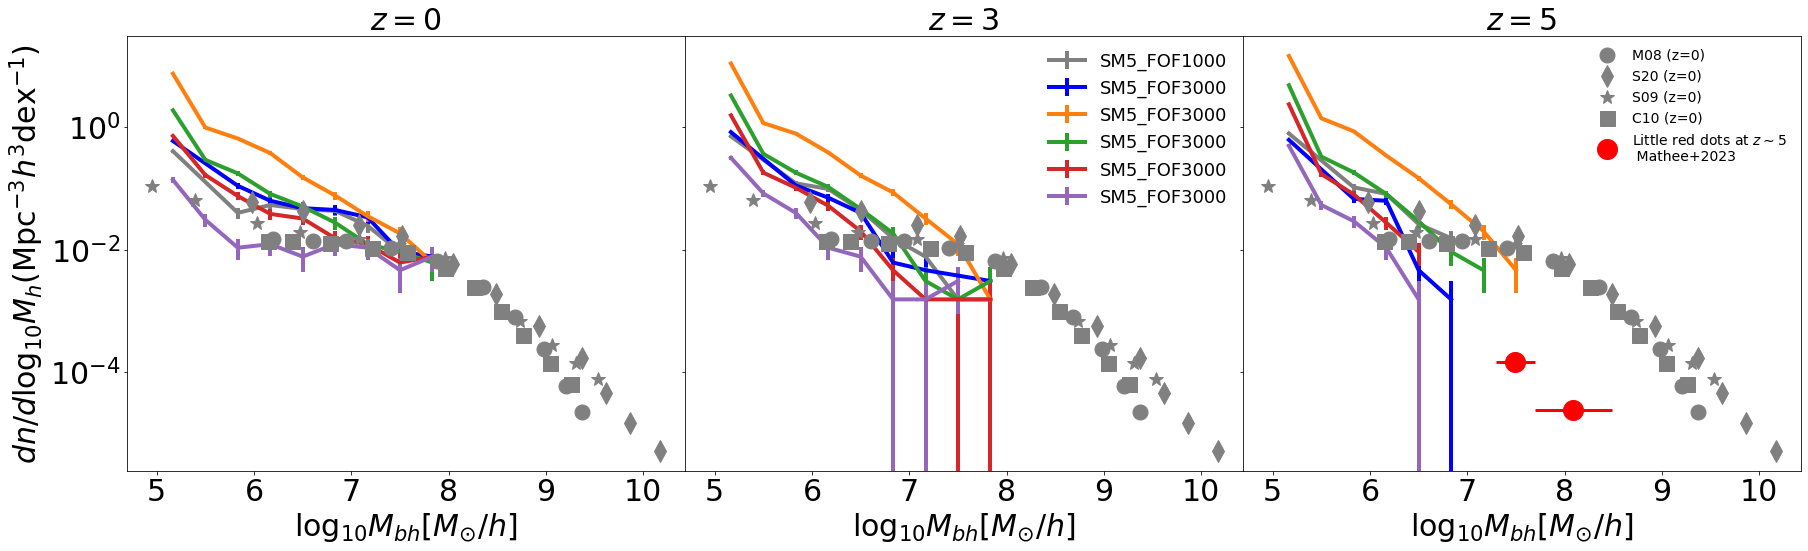

In [14]:
label_fontsize=30
def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)[0]
    return centers,HMF/norm,dHMF/norm


def make_plot(ax,z_desired,basePath_cur,style='solid',col='black',width=6,log_mass_min=3.19,labl=' '):
    global Nbins, log_HM_min, log_HM_max
    redshift_space=[z_desired]

    BH_no_space=[]
    print(z_desired)
    
    boxsize=arepo_package.get_box_size(basePath_cur)/1e3

    for redshift in [z_desired]:
    

        BH_Mass,o=arepo_package.get_particle_property(basePath_cur,'BH_Mass',5,redshift)
        print(log_HM_min,log_HM_max)
        centers,HMF,dHMF=get_distribution(numpy.log10(BH_Mass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=1)
        #print(BH_Mass*1e10)
        print(centers,HMF)
        
        mask=(centers>log_mass_min)&(HMF>0)
        ax.errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=width,linestyle=style,color=col,label=labl,marker='',ms=15)
      
    
        ax.set_yscale('log')

        ax.tick_params(labelsize=label_fontsize)
        ax.set_xlabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=label_fontsize)


LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


f,axx=plt.subplots(1,3,figsize=(30,8),sharey=True,sharex=True)



def do(col='black',basePath_cur='.',style='solid',width=5,labl='',labl2=''):
    global Nbins, log_HM_min, log_HM_max
    i=0
    for z_desired in [0,3,5]:
        axx[i].set_title('$z=%d$'%z_desired,fontsize=30)
        Nbins, log_HM_min, log_HM_max = 16, 3, 8  
        log_mass_min=3.00


        if(z_desired==1):
            flabl=labl
        elif(z_desired==3):
            flabl=labl2
        else:
            flabl=''

        make_plot(axx[i],z_desired,basePath_cur,col=col,width=width,log_mass_min=log_mass_min,labl=flabl,style=style)

      
        

        #axx[i].set_ylim(1e-3,3)
        #axx[i,0].axvline(numpy.log10(2e4))
        
        i+=1
global Nbins, log_HM_min, log_HM_max

Msfmp,Mh=5,1000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output        
do('grey',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF1000',width=4) 


Msfmp,Mh=5,3000
j=0
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS///' # this is the folder containing the simulation run
run='/L12p5n512/AREPO/' # name of the simulation runs
output='/output_Msfmp%d_Mh%d_double_powerlaw_env_5_0.1_0.3_slope1.6/'%(Msfmp,Mh) 
basePath=path_to_output+run+output             
do('blue',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF3000',width=4) 



box_label='HEAVY_SM5'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output
do('C1',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF3000',width=4) 


box_label='HEAVY_SM5_LW10'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
do('C2',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF3000',width=4) 


box_label='HEAVY_SM5_LW10_LOWSPIN'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
do('C3',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF3000',width=4) 

box_label='HEAVY_SM5_LW10_LOWSPIN_RICH'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
do('C4',basePath_cur=basePath,style='solid',labl='BRAHMA-12.5-R5',labl2='SM5_FOF3000',width=4) 



axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

#axx[1].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)

#axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

plt.subplots_adjust(wspace=0)

for ii in [2]:
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='M08 (z=0)',marker='o',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='S20 (z=0)',marker='d',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='S09 (z=0)',marker='*',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='C10 (z=0)',marker='s',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
 
for ii in [0,1]:
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/M08_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='',marker='o',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S20_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='',marker='d',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/S09_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='',marker='*',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
    
    data=numpy.loadtxt('/home/aklantbhowmick/analis_data/C10_BHMF.txt')
    axx[ii].errorbar(numpy.log10(10**data[:,0]*0.7),10**data[:,1]/0.7**3,color='grey',label='',marker='s',linewidth=0,ms=15)
    #axx[ii].legend(fontsize=25,loc='lower left',frameon=False)
 
'''    
    data=numpy.loadtxt('../arepo_code_development/observational_data/BHMF_z0_actualdata3.txt')
    axx[ii].errorbar(numpy.log10(data[:,0]*0.7),data[:,1]/0.7**3*numpy.log(10),color='orange',label='Marconi+ 2004',marker='o',linewidth=0,ms=10)
    axx[ii].legend(fontsize=25,loc='lower left',frameon=False)


    data=numpy.loadtxt('../arepo_code_development/observational_data/BHMF_S13_z0_2.txt')
    axx[ii].errorbar(numpy.log10(data[:,0]*0.7),data[:,1]/0.7**3,color='orange',label='Shankar+ 2013',marker=' ',linewidth=2,ms=10,linestyle='solid')
    axx[ii].legend(fontsize=25,loc='lower left',frameon=False)



    data=numpy.loadtxt('../arepo_code_development/observational_data/BHMF_Merloni_z0.txt')
    axx[ii].errorbar(numpy.log10(data[:,0]*0.7),data[:,1]/0.7**3,color='orange',label='Merloni+ 2008 (z=0.1)',marker=' ',linewidth=2,ms=10,linestyle='dashed')
    axx[ii].legend(fontsize=25,loc='lower left',frameon=False
    

    
    

'''

data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots.txt')

data_right=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_right.txt')

data_left=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_left.txt')


data_up=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_up.txt')

data_down=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/red_dots_down.txt')

axx[2].errorbar(data[:,0],10**data[:,1]/0.7**3,xerr=[data[:,0]-data_left[:,0],data_right[:,0]-data[:,0]],yerr=[10**data[:,1]-10**data_down[:,1],10**data_up[:,1]-10**data[:,1]],marker='o',ms=20,linewidth=3,linestyle='',label='Little red dots at $z\sim5$ \n Mathee+2023',color='red')

axx[0].legend(loc='upper right',fontsize=label_fontsize-12,frameon=False)

axx[1].legend(loc='upper right',fontsize=label_fontsize-12,frameon=False)

axx[2].legend(loc='upper right',fontsize=label_fontsize-16,frameon=False)

plt.savefig('./Paper6_figures/mass_functions_z0.png',bbox_inches='tight')







In [101]:
def get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete_sorted,primary_mass_sorted,secondary_mass_sorted,primary_id_sorted,secondary_id_sorted,file_id_complete_sorted,N_empty=arepo_package.get_merger_events_from_snapshot(basePath,upto_redshift,HOSTS=0)
    mass_ratio=secondary_mass_sorted/primary_mass_sorted
    #print(mass_ratio[mass_ratio>1.])
        #print(primary_mass_sorted,secondary_mass_sorted)
    merger_redshifts=1./scale_fac_complete_sorted-1.
    #print(merger_redshifts)
    
    #print(merger_redshifts)
    
    #print("###",primary_mass_sorted)
    mask_primary=primary_mass_sorted>=mass_cut/1e10
    mask_secondary=secondary_mass_sorted>=mass_cut/1e10
    mask_total_mass=(primary_mass_sorted+secondary_mass_sorted)>total_mass_cut/1e10
    mask_redshift=merger_redshifts>=redshift_cut
    mask_ratio_cut=mass_ratio>=mass_ratio_cut
    mask=((mask_primary&mask_secondary)&(mask_redshift&mask_ratio_cut))&mask_total_mass
    merger_redshifts=merger_redshifts[mask]
  
    #print("!!!",merger_redshifts)
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
    #print(dist)
    dist*=counts_sum

    dist_err*=counts_sum
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
    

    dz=numpy.diff(bins)[0]
    #print("!!!",dist)    
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt



def get_merger_distributions_hosts(basePath,nbins,min_value,max_value,mass_cut,linear=0,HDF5=0,path_to_hdf5='./'):
    if(HDF5):
        fobj=h5py.File(path_to_hdf5)
        scale_fac_complete_sorted=fobj.get('time')[:]
        primary_mass_sorted=fobj.get('mass_out')[:]
        secondary_mass_sorted=fobj.get('mass_in')[:]
    else:
        scale_fac_complete,BH_id_primary,BH_mass_primary,hosthalomass_primary,hosthalostellarmass_primary,hosthalogasmass_primary,hosthalodmmass_primary,BH_id_secondary,BH_mass_secondary,hosthalomass_secondary,hosthalostellarmass_secondary,hosthalogasmass_secondary,hosthalodmmass_secondary,file_id_complete=arepo_package.get_merger_events_hosts(basePath)        #print(primary_mass_sorted,secondary_mass_sorted)
    merger_redshifts=1./scale_fac_complete-1.
    mask_primary=BH_mass_primary>=mass_cut/1e10
    mask_secondary=BH_mass_secondary>=mass_cut/1e10
    mask=mask_primary&mask_secondary
    
    maskhost1=hosthalomass_primary+hosthalomass_secondary>14.2e10/1e10*h
    maskhost2=hosthalomass_primary>7.1e10/1e10*h
    maskhost3=hosthalodmmass_primary>2e9/1e10*h
    maskhost4=hosthalodmmass_secondary>2e9/1e10*h
    maskhost5=hosthalostellarmass_primary>1e8/1e10*h   
    maskhost6=hosthalostellarmass_secondary>1e8/1e10*h
    
    if(apply_host_cuts==0):
        maskhost=mask
    else:
        maskhost=((((maskhost1&maskhost2)&maskhost3)&maskhost4)&maskhost5)&maskhost6
    
    
    merger_redshifts=merger_redshifts[mask&maskhost]
    
    bins, dist, dist_err,norm,counts_sum=arepo_package.get_probability_density(merger_redshifts,nbins,min_value,max_value,linear=linear)
    
    dt=numpy.array([T(zz-norm/2,zz+norm/2) for zz in bins])
    
    
    dz=numpy.diff(bins)[0]
    
    dz_dt=numpy.array([dz/T(zz-dz/2,zz+dz/2) for zz in bins])
    
    return bins,dist,dist_err,norm,dz_dt

In [102]:
path_to_TNG100='/blue/lblecha/lblecha/IllustrisTNG/Runs/L75n1820TNG/postprocessing/blackholes/blackhole_mergers.hdf5'

path_to_TNG300='/blue/lblecha/lblecha/IllustrisTNG/Runs/L205n1250TNG/postprocessing/blackholes/blackhole_mergers.hdf5'
path_to_Illustris='/orange/lblecha/lblecha/Illustris/L75n1820FP/postprocessing/released/blackhole_mergers.hdf5'

32 2.220446049250313e-16
Total number of mergers 29426
32 2.220446049250313e-16
Total number of mergers 29426
32 2.220446049250313e-16
Total number of mergers 6673
32 2.220446049250313e-16
Total number of mergers 6673
32 2.220446049250313e-16
Total number of mergers 2416
32 2.220446049250313e-16
Total number of mergers 2416
32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 1253
32 2.220446049250313e-16
Total number of mergers 1253
32 2.220446049250313e-16
Total number of mergers 1488
32 2.220446049250313e-16
Total number of mergers 1488


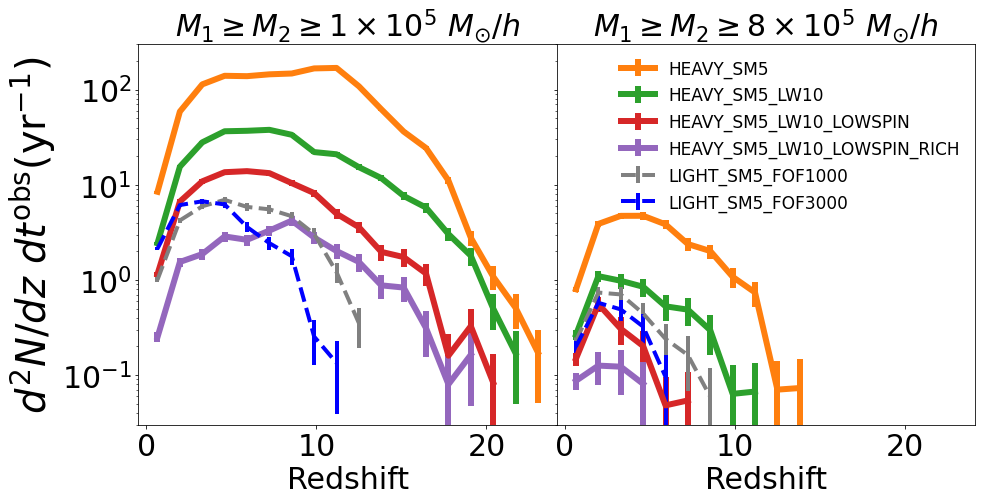

In [3]:

f,axx=plt.subplots(1,2,figsize=(15,7),sharey=True,sharex=True)

redshift_cut=0
mass_cut=0
mass_ratio_cut=0
total_mass_cut=0
apply_host_cuts=0
HDF5=0
ZOOM=0

nbins=20
min_value=0
max_value=25

upto_redshift=0

def do(labl='',width=6):
    HDF5=0

    #path_to_output='/ufrc/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/' # this is the folder containing the simulation run
    #run='/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax10_haloindex4_redshift5.00_logbhseedmass5.00_NSC/' # name of the simulation runs
    #basePath=path_to_output+run+'AREPO/output_upto_3/'

    nbins=20
    min_value=0
    max_value=25
    bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5='')
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])

    if (HDF5):
        simulation_volume=75**3
    else:
        simulation_volume=(arepo_package.get_box_size(basePath)/1000)**3


    merger_rate=dist*1.
    merger_rate_err=dist_err*1.

    merger_rate*=dz_dt
    merger_rate_err*=dz_dt

    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell

    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    #ax[4].errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='$Z<10^{-4}Z_{\odot}$ (levelmax=9)',linewidth=3)
    ax.set_yscale('log')

    ax.tick_params(labelsize=30)

    ax.set_xlabel('Redshift',fontsize=30)

    merger_rate2=dist*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    merger_rate_err2=dist_err*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate2[mask],merger_rate_err2[mask],label=box_label,linewidth=width,color=col,linestyle=style)
    ax.set_yscale('log')


    #data=numpy.loadtxt('./digitized_data/Laura_proposal_illustris_merger_rates.txt')
    #ax[4].errorbar(data[:,0],data[:,1])



 



box_label='HEAVY_SM5'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 
col='C1'
mass_cut=1e5
style='solid'
ax=axx[0]


do()
mass_cut=8e5
style='solid'
ax=axx[1]
do()


box_label='HEAVY_SM5_LW10'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 
col='C2'
mass_cut=1e5
style='solid'
ax=axx[0]


do()
mass_cut=8e5
style='solid'
ax=axx[1]
do()

box_label='HEAVY_SM5_LW10_LOWSPIN'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 
col='C3'
mass_cut=1e5
style='solid'
ax=axx[0]


do()
mass_cut=8e5
style='solid'
ax=axx[1]
do()


box_label='HEAVY_SM5_LW10_LOWSPIN_RICH'

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output

col='C4'
mass_cut=1e5
style='solid'
ax=axx[0]

do()
mass_cut=8e5
style='solid'
ax=axx[1]
do()

box_label='LIGHT_SM5_FOF1000'

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output

col='grey'
mass_cut=1e5
style='dashed'
ax=axx[0]

do(width=4)
mass_cut=8e5

ax=axx[1]
do(width=4)


box_label='LIGHT_SM5_FOF3000'

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output

col='blue'
mass_cut=1e5

ax=axx[0]

do(width=4)
mass_cut=8e5

ax=axx[1]
do(width=4)

    


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 




        
axx[0].set_title(r'$M_1\geq M_2 \geq 1\times10^5 \ M_{\odot}/h$',fontsize=30)
axx[1].set_title(r'$M_1\geq M_2 \geq 8\times10^5 \ M_{\odot}/h$',fontsize=30)



axx

axx[0].set_ylabel('$d^2 N/dz \ dt^{\mathrm{obs}}(\mathrm{yr}^{-1})$',fontsize=40)

#axx[0].legend(loc='lower left',fontsize=30)
axx[1].legend(loc='upper right',fontsize=17,frameon=False)
axx[0].set_ylim(0.03,300)
#axx[0].set_xlim(6.8,26)
plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/merger_rates.png',bbox_inches='tight')



32 2.220446049250313e-16
Total number of mergers 29426
32 2.220446049250313e-16
Total number of mergers 6673
32 2.220446049250313e-16
Total number of mergers 2416
32 2.220446049250313e-16
Total number of mergers 601


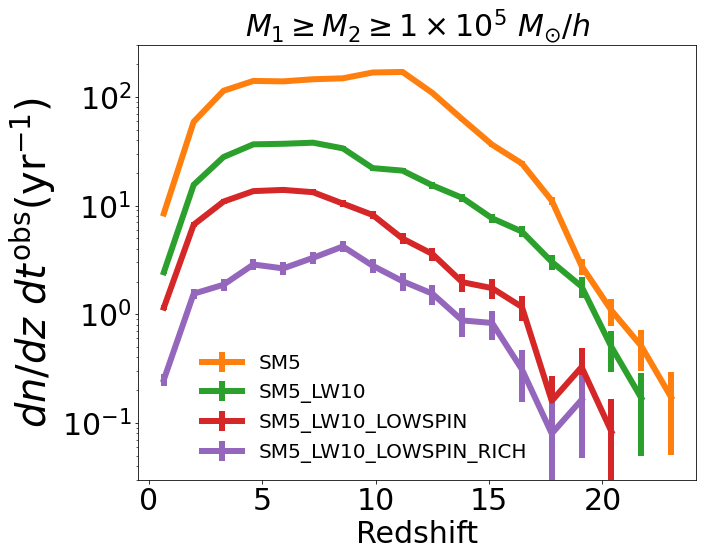

In [6]:

f,axx=plt.subplots(1,1,figsize=(10,8),sharey=True,sharex=True)

redshift_cut=0
mass_cut=0
mass_ratio_cut=0
total_mass_cut=0
apply_host_cuts=0
HDF5=0
ZOOM=0

nbins=20
min_value=0
max_value=25

upto_redshift=0

def do(labl='',width=6):
    HDF5=0

    #path_to_output='/ufrc/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/' # this is the folder containing the simulation run
    #run='/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax10_haloindex4_redshift5.00_logbhseedmass5.00_NSC/' # name of the simulation runs
    #basePath=path_to_output+run+'AREPO/output_upto_3/'

    nbins=20
    min_value=0
    max_value=25
    bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5='')
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])

    if (HDF5):
        simulation_volume=75**3
    else:
        simulation_volume=(arepo_package.get_box_size(basePath)/1000)**3


    merger_rate=dist*1.
    merger_rate_err=dist_err*1.

    merger_rate*=dz_dt
    merger_rate_err*=dz_dt

    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell

    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    #ax[4].errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='$Z<10^{-4}Z_{\odot}$ (levelmax=9)',linewidth=3)
    ax.set_yscale('log')

    ax.tick_params(labelsize=30)

    ax.set_xlabel('Redshift',fontsize=30)

    merger_rate2=dist*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    merger_rate_err2=dist_err*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate2[mask],merger_rate_err2[mask],label=box_label,linewidth=width,color=col,linestyle=style)
    ax.set_yscale('log')


    #data=numpy.loadtxt('./digitized_data/Laura_proposal_illustris_merger_rates.txt')
    #ax[4].errorbar(data[:,0],data[:,1])



 



box_label='SM5'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 
col='C1'
mass_cut=1e5
style='solid'
ax=axx
do()



box_label='SM5_LW10'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 
col='C2'
mass_cut=1e5
style='solid'
ax=axx
do()

box_label='SM5_LW10_LOWSPIN'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 
col='C3'
mass_cut=1e5
style='solid'
ax=axx
do()


box_label='SM5_LW10_LOWSPIN_RICH'

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output

col='C4'
mass_cut=1e5
style='solid'
ax=axx


do()




        
axx.set_title(r'$M_1\geq M_2 \geq 1\times10^5 \ M_{\odot}/h$',fontsize=30)
#axx[1].set_title(r'$M_1\geq M_2 \geq 8\times10^5 \ M_{\odot}/h$',fontsize=30)



axx.set_ylabel('$dn/dz \ dt^{\mathrm{obs}}(\mathrm{yr}^{-1})$',fontsize=40)

#axx[0].legend(loc='lower left',fontsize=30)
axx.legend(loc=(0.1,0.02),fontsize=20,frameon=False)
axx.set_ylim(0.03,300)
#axx[0].set_xlim(6.8,26)
plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/merger_rates.png',bbox_inches='tight')



32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 1253
32 2.220446049250313e-16
Total number of mergers 1253


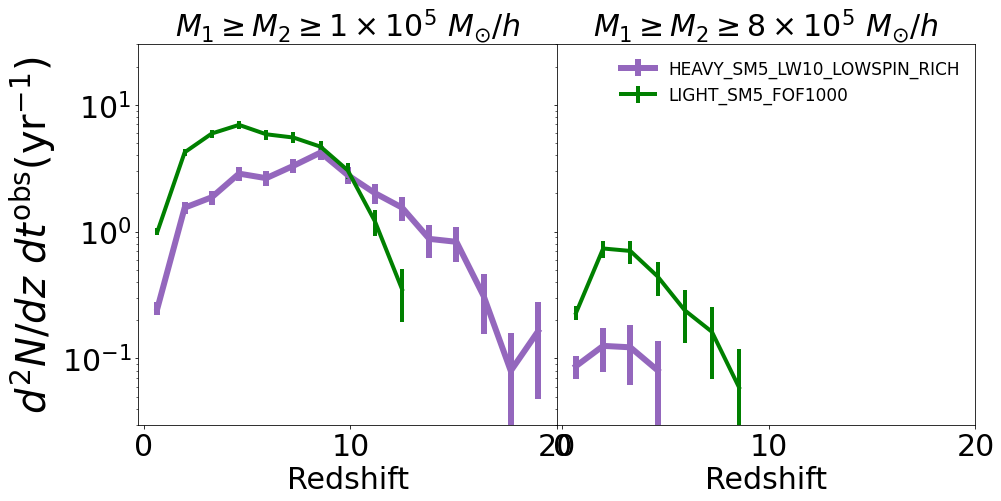

In [10]:

f,axx=plt.subplots(1,2,figsize=(15,7),sharey=True,sharex=True)

redshift_cut=0
mass_cut=0
mass_ratio_cut=0
total_mass_cut=0
apply_host_cuts=0
HDF5=0
ZOOM=0

nbins=20
min_value=0
max_value=25

upto_redshift=0

def do(labl='',width=6):
    HDF5=0

    #path_to_output='/ufrc/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/' # this is the folder containing the simulation run
    #run='/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax10_haloindex4_redshift5.00_logbhseedmass5.00_NSC/' # name of the simulation runs
    #basePath=path_to_output+run+'AREPO/output_upto_3/'

    nbins=20
    min_value=0
    max_value=25
    bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5='')
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])

    if (HDF5):
        simulation_volume=75**3
    else:
        simulation_volume=(arepo_package.get_box_size(basePath)/1000)**3


    merger_rate=dist*1.
    merger_rate_err=dist_err*1.

    merger_rate*=dz_dt
    merger_rate_err*=dz_dt

    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell

    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    #ax[4].errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='$Z<10^{-4}Z_{\odot}$ (levelmax=9)',linewidth=3)
    ax.set_yscale('log')

    ax.tick_params(labelsize=30)

    ax.set_xlabel('Redshift',fontsize=30)

    merger_rate2=dist*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    merger_rate_err2=dist_err*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate2[mask],merger_rate_err2[mask],label=box_label,linewidth=width,color=col,linestyle=style)
    ax.set_yscale('log')


    #data=numpy.loadtxt('./digitized_data/Laura_proposal_illustris_merger_rates.txt')
    #ax[4].errorbar(data[:,0],data[:,1])



 



box_label='HEAVY_SM5'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output 
col='C1'
mass_cut=1e5
style='solid'
ax=axx[0]


#do()
mass_cut=8e5
style='solid'
ax=axx[1]
#do()


box_label='HEAVY_SM5_LW10'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output 
col='C2'
mass_cut=1e5
style='solid'
ax=axx[0]


#do()
mass_cut=8e5
style='solid'
ax=axx[1]
#do()

box_label='HEAVY_SM5_LW10_LOWSPIN'
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output 
col='C3'
mass_cut=1e5
style='solid'
ax=axx[0]


#do()
mass_cut=8e5
style='solid'
ax=axx[1]
#do()


box_label='HEAVY_SM5_LW10_LOWSPIN_RICH'

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output

col='C4'
mass_cut=1e5
style='solid'
ax=axx[0]

do()
mass_cut=8e5
style='solid'
ax=axx[1]
do()

box_label='LIGHT_SM5_FOF1000'

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output

col='green'
mass_cut=1e5
style='solid'
ax=axx[0]

do(width=4)
mass_cut=8e5

ax=axx[1]
do(width=4)




    


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 




        
axx[0].set_title(r'$M_1\geq M_2 \geq 1\times10^5 \ M_{\odot}/h$',fontsize=30)
axx[1].set_title(r'$M_1\geq M_2 \geq 8\times10^5 \ M_{\odot}/h$',fontsize=30)



axx

axx[0].set_ylabel('$d^2 N/dz \ dt^{\mathrm{obs}}(\mathrm{yr}^{-1})$',fontsize=40)

#axx[0].legend(loc='lower left',fontsize=30)
axx[1].legend(loc='upper right',fontsize=17,frameon=False)
axx[0].set_ylim(0.03,30)
#axx[0].set_xlim(6.8,26)
plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/merger_rates.png',bbox_inches='tight')



32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 601
32 2.220446049250313e-16
Total number of mergers 2416
32 2.220446049250313e-16
Total number of mergers 2416
32 2.220446049250313e-16
Total number of mergers 6673
32 2.220446049250313e-16
Total number of mergers 6673
32 2.220446049250313e-16
Total number of mergers 29426
32 2.220446049250313e-16
Total number of mergers 29426
18 7.005417045544533
Total number of mergers 32012
18 7.005417045544533
Total number of mergers 19624
32 2.220446049250313e-16
Total number of mergers 1253
32 2.220446049250313e-16
Total number of mergers 1488


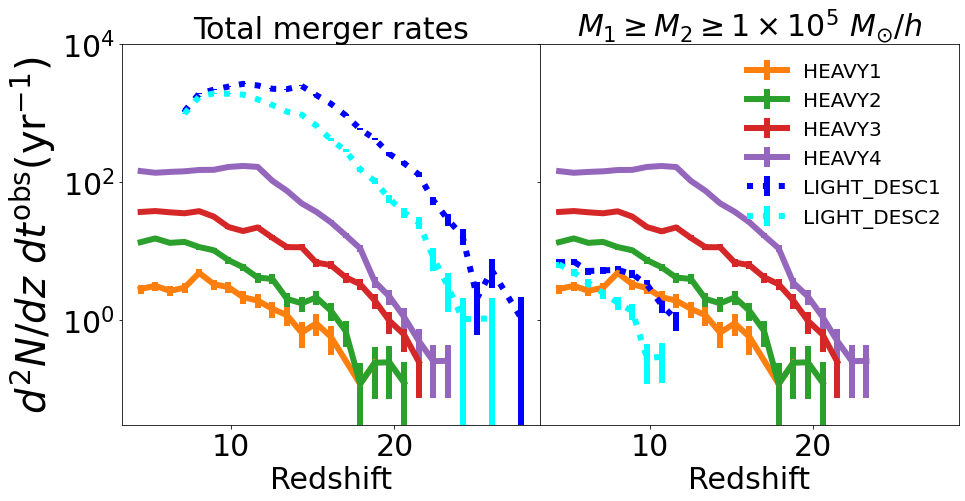

In [117]:

f,axx=plt.subplots(1,2,figsize=(15,7),sharey=True,sharex=True)

redshift_cut=0
mass_cut=0
mass_ratio_cut=0
total_mass_cut=0
apply_host_cuts=0
HDF5=0
ZOOM=0

nbins=30
min_value=7
max_value=25

upto_redshift=0

def do(labl='',width=6):
    HDF5=0

    #path_to_output='/ufrc/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_ZOOM_RUNS4/' # this is the folder containing the simulation run
    #run='/density_and_metallicity_based_criterion_zoom_levelmin7_levelmax10_haloindex4_redshift5.00_logbhseedmass5.00_NSC/' # name of the simulation runs
    #basePath=path_to_output+run+'AREPO/output_upto_3/'

    nbins=30
    min_value=4
    max_value=30
    bins,dist,dist_err,norm,dz_dt=get_merger_distributions(basePath,nbins,min_value,max_value,mass_cut,linear=1,HDF5=HDF5,path_to_hdf5='')
    volume_of_redshift_shell=numpy.array([4*3.14*DC(0,z_bin)**2*dx_dz(z_bin) for z_bin in bins])

    if (HDF5):
        simulation_volume=75**3
    else:
        simulation_volume=(arepo_package.get_box_size(basePath)/1000)**3


    merger_rate=dist*1.
    merger_rate_err=dist_err*1.

    merger_rate*=dz_dt
    merger_rate_err*=dz_dt

    merger_rate/=simulation_volume
    merger_rate_err/=simulation_volume

    merger_rate*=volume_of_redshift_shell
    merger_rate_err*=volume_of_redshift_shell

    merger_rate/=(1+bins)
    merger_rate_err/=(1+bins)

    #ax[4].errorbar(bins[mask],merger_rate[mask],merger_rate_err[mask],label='$Z<10^{-4}Z_{\odot}$ (levelmax=9)',linewidth=3)
    ax.set_yscale('log')

    ax.tick_params(labelsize=30)

    ax.set_xlabel('Redshift',fontsize=30)

    merger_rate2=dist*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    merger_rate_err2=dist_err*dz_dt/(1+bins)*volume_of_redshift_shell/simulation_volume
    mask=dist>0
    ax.errorbar(bins[mask],merger_rate2[mask],merger_rate_err2[mask],label=labl,linewidth=width,color=col,linestyle=style)
    ax.set_yscale('log')


    #data=numpy.loadtxt('./digitized_data/Laura_proposal_illustris_merger_rates.txt')
    #ax[4].errorbar(data[:,0],data[:,1])



 


box_label='Heavy $10^5~M_{\odot}$ seed'

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output

col='C1'
mass_cut=1
style='solid'
ax=axx[0]

do(width=6)
mass_cut=1e5
style='solid'
ax=axx[1]
do(width=6,labl='HEAVY1')

box_label=''


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output

col='C2'
mass_cut=1
style='solid'
ax=axx[0]

do(width=6)
mass_cut=1e5
style='solid'
ax=axx[1]
do(width=6,labl='HEAVY2')


path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output

col='C3'
mass_cut=1
style='solid'
ax=axx[0]

do(width=6)
mass_cut=1e5
style='solid'
ax=axx[1]
do(width=6,labl='HEAVY3')

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

col='C4'
mass_cut=1
style='solid'
ax=axx[0]

do(width=6)
mass_cut=1e5
style='solid'
ax=axx[1]
do(width=6,labl='HEAVY4')



box_label='Light seed models ($10^3~M_{\odot}$)'

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

col='green'
mass_cut=1e3
style='solid'
ax=axx[0]
#do(width=6,labl='Light seed ($10^3~M_{\odot}$)')

box_label=''

path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM150_seed3.19_bFOF/'
basePath=path_to_output+run+output 

col='green'
mass_cut=1e3
style='solid'
ax=axx[0]
#do(width=4,labl='Light seed ($10^3~M_{\odot}$)')


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio1000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

col='blue'
mass_cut=1e3
style='dotted'
ax=axx[0]
do(width=6)


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L6p25n1024//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio3000_SFMFGM5_seed3.19_bFOF/'
basePath=path_to_output+run+output 

col='cyan'
mass_cut=1e3
style='dotted'
ax=axx[0]
do(width=6)





path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output


col='blue'
ax=axx[1]
do(width=6,labl='LIGHT_DESC1')





col='cyan'
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
do(width=6,labl='LIGHT_DESC2')



axx[0].set_title(r'Total merger rates',fontsize=30)
axx[1].set_title(r'$M_1\geq M_2 \geq 1\times10^5 \ M_{\odot}/h$',fontsize=30)





axx[0].set_ylabel('$d^2 N/dz \ dt^{\mathrm{obs}}(\mathrm{yr}^{-1})$',fontsize=40)

axx[1].legend(loc='upper right',fontsize=20,frameon=0)
#axx[1].legend(loc='upper right',fontsize=25,frameon=False)
axx[0].set_ylim(0.03,10000)
#axx[0].set_xlim(6.8,26)
plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/merger_rates.png',bbox_inches='tight')



In [19]:
def make_plot(basePath, desired_redshift,col,mstyle,lstyle,obj,labl='.',make_scatter=1,ZOOM=0,alph=1,hist=0,ms=15):
    hubble=0.6771
    if ('mirror' in basePath):
        suffix='Underdense'
    else:
        suffix='Overdense'
    GroupMassType,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift)
    GroupLenType,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift)
    
    GroupMass1=GroupMassType[:,1]
    GroupMass2=GroupMassType[:,2]
    
    LowResFraction=GroupMass2/(GroupMass1+GroupMass2)
    
    GroupLen=GroupLenType[:,4]
    GroupMass=GroupMassType[:,4]
    #print(GroupLen)
    GroupBHMass,output_redshift=arepo_package.get_subhalo_property(basePath,'SubhaloBHMass',desired_redshift)
    GroupMass*=1e10
    GroupBHMass*=1e10

    if (ZOOM==1):
        mask=LowResFraction<0.5
        mask2=(GroupMass>0)&(GroupBHMass>0)
        mask=mask&mask2
        NBINSGAS=100
        if (hist==1): 
            obj.hist2d(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]), bins=(NBINSGAS,NBINSGAS), norm=mpl.colors.LogNorm(),cmap='Greys_r',alpha=alph,label=labl);
        else:
            obj.errorbar(numpy.log10(GroupMass[mask]/hubble),numpy.log10(GroupBHMass[mask]/hubble),linewidth=0,color=col,marker='o',alpha=alph,label=labl,ms=ms);

            
    else:
        mask=(GroupMass>0)&(GroupBHMass>0)
        NBINSGAS=100
        if (hist==1): 
            obj.hist2d(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]), bins=(NBINSGAS,NBINSGAS), norm=mpl.colors.LogNorm(),cmap='Greys_r',alpha=alph,label=labl);
        else:
            obj.errorbar(numpy.log10(GroupMass[mask]/hubble),numpy.log10(GroupBHMass[mask]/hubble),linewidth=0,color=col,marker='o',alpha=alph,label=labl,ms=ms);
    xlim=numpy.linspace(5,10,20)
    #obj.plot(xlim,xlim-3,linestyle='dashed',linewidth=3,color='black') 
    obj.set_ylim(4.7,9.5)
    #mask=GroupBHMass>0
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,alpha=1);
 
      

    #mask=(GroupLen>100)&(GroupBHMass>0)
    #obj.errorbar(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),ms=10,linewidth=0,color=col,marker=mstyle,label=labl);

    print("Output_redshift is:",output_redshift)
    
    #median_log_halo_mass,median_log_bh_mass,IQR=arepo_package.get_median_with_IQR(numpy.log10(GroupMass[mask]),numpy.log10(GroupBHMass[mask]),False,False,10,25)
    #obj.errorbar(median_log_halo_mass,median_log_bh_mass,yerr=IQR,ms=10,linewidth=3,color=col,linestyle=lstyle,label=labl);
    #obj.set_xlim(3.5,11)
    #obj.set_ylim(3.5,8)
#    obj.plot(obj.get_xlim(),obj.get_xlim())
    
    #obj.plot(obj.get_xlim(),obj.get_xlim())
    obj.tick_params(labelsize=40)
    obj.legend(loc='upper left',fontsize=25)
    #obj.set_title('$z=%.1f$'%output_redshift,fontsize=50)










Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533


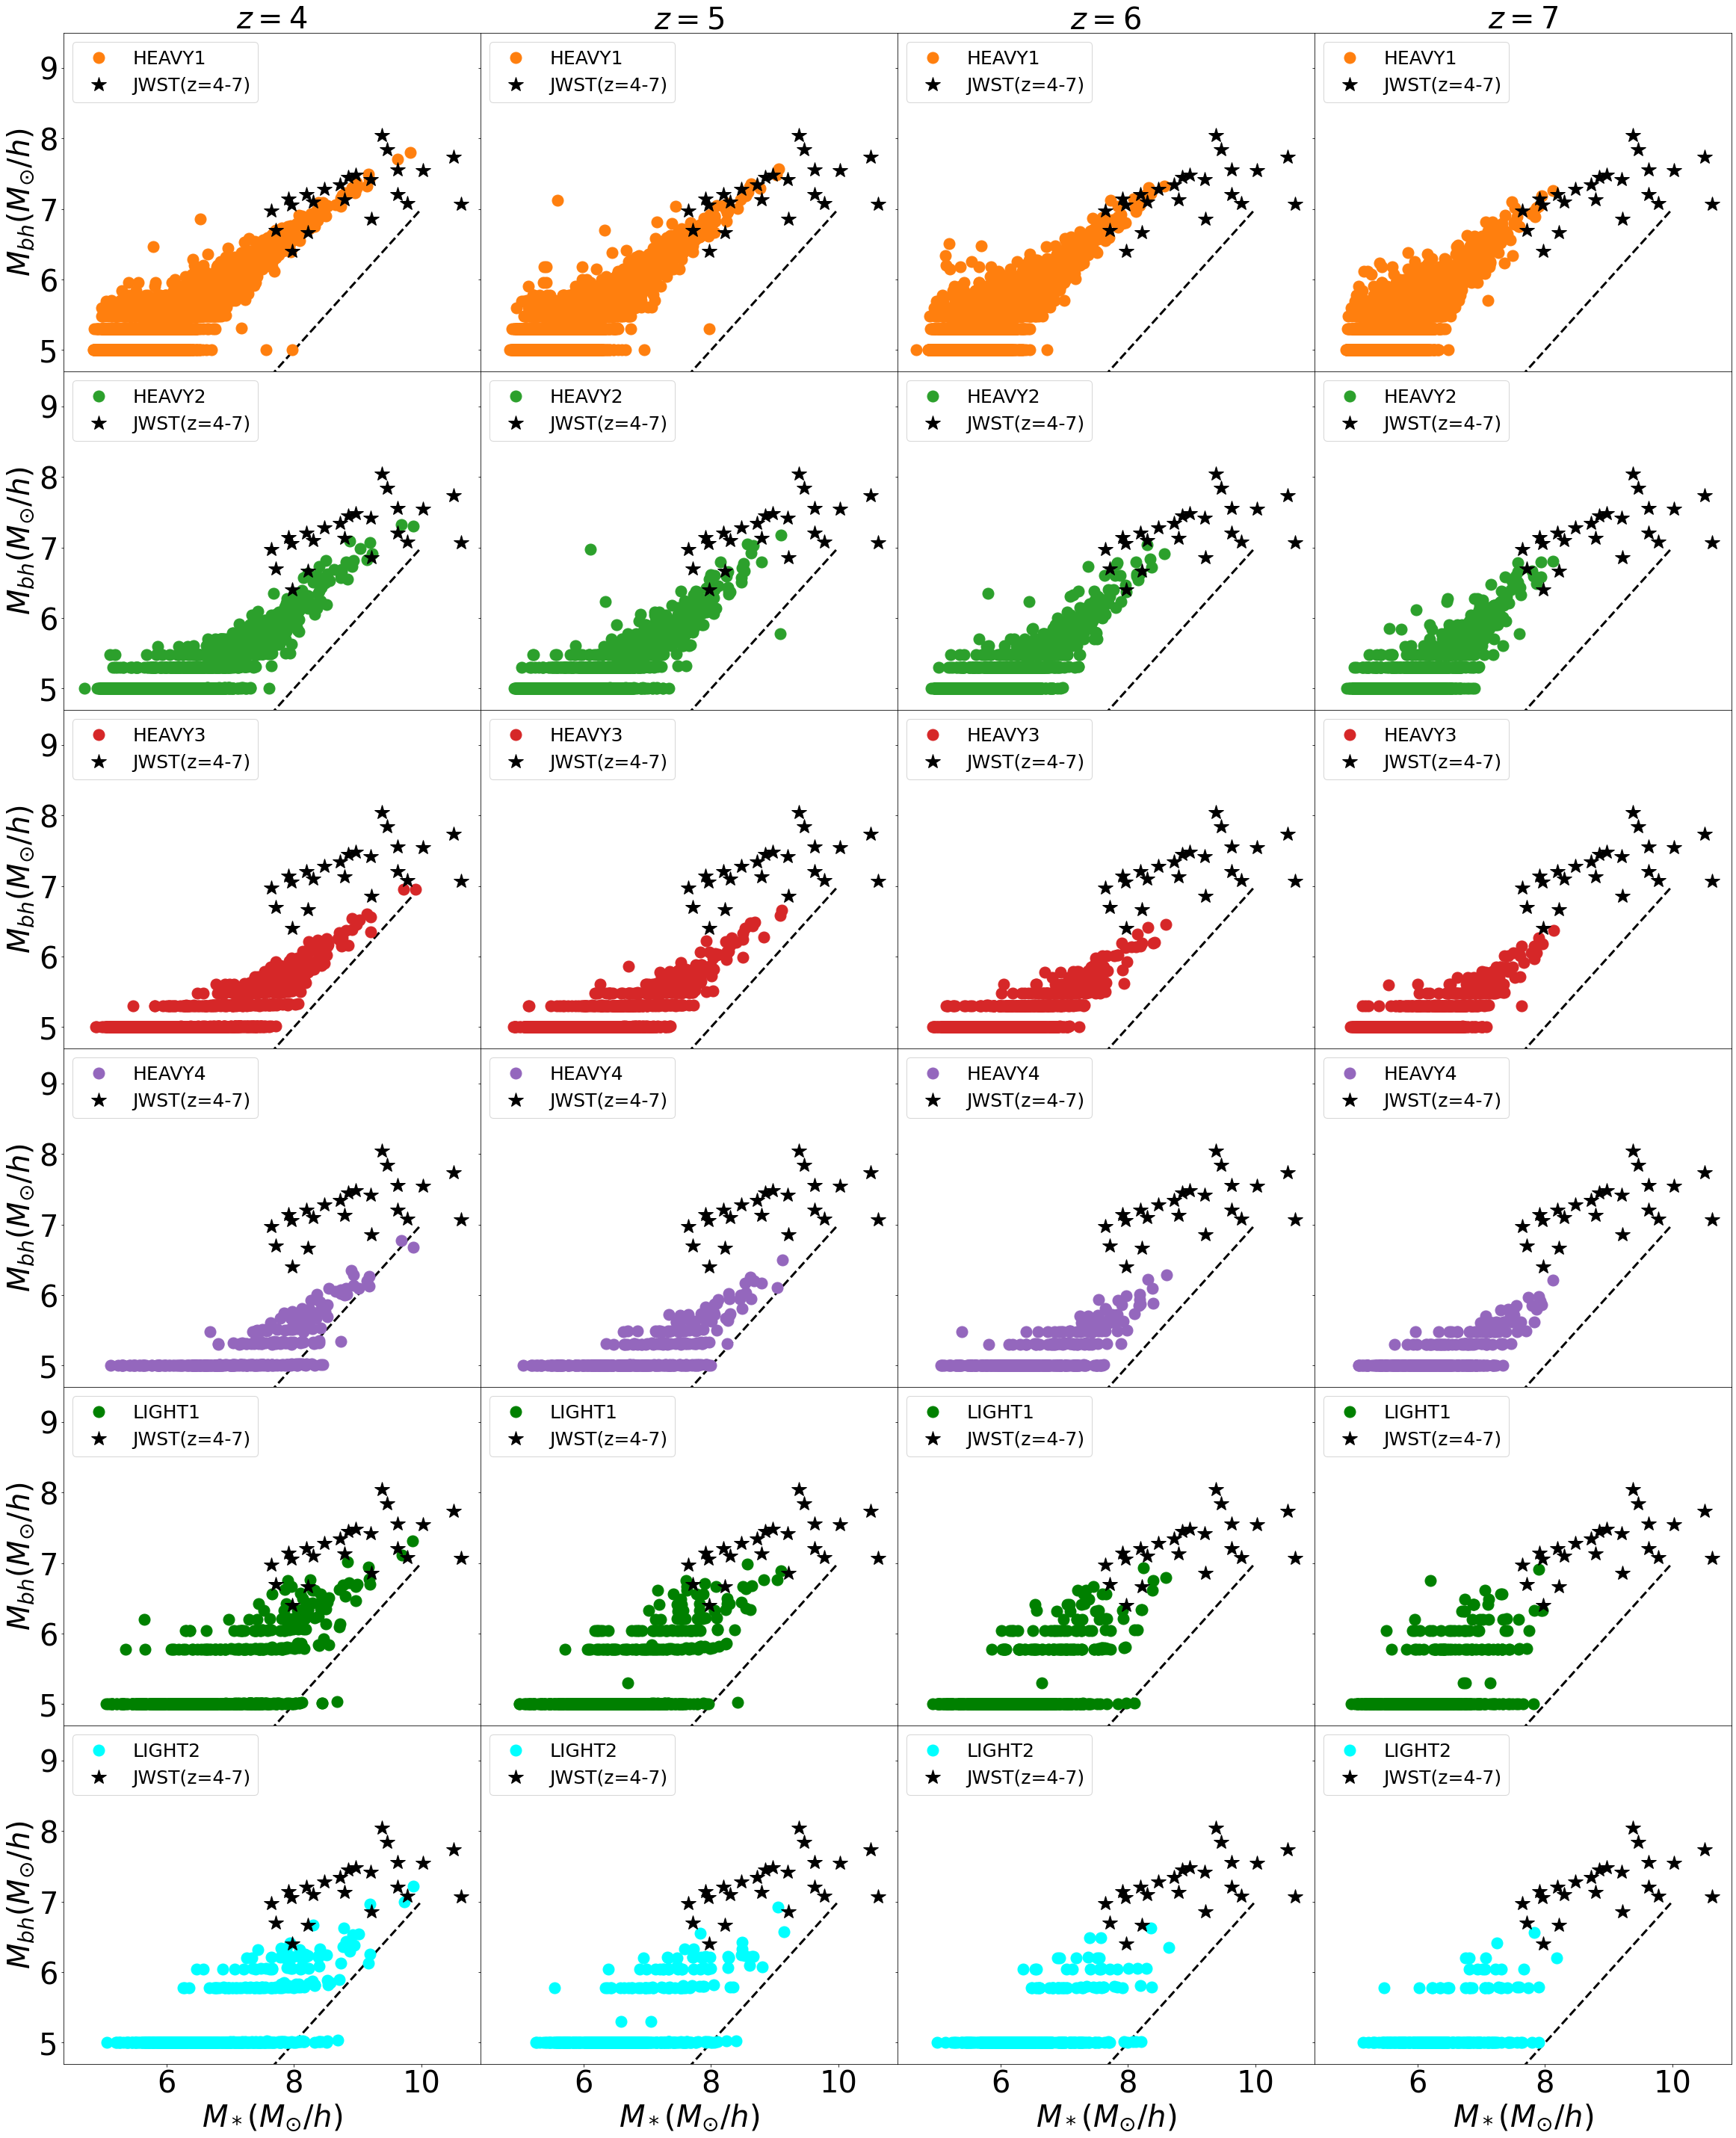

In [14]:
f,axx=plt.subplots(4,4,figsize=(40,40),sharey=True,sharex=True)


labl=''
levelmax=10
logseedmass=5.0  
Msfmp,Mh=5,1000


    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#make_plot(ax,col='blue',style='dashed')


i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[0,i]
    obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'C1','o','solid',obj,labl='HEAVY1',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)      
    i+=1
 
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[1,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C2','o','solid',obj,labl='HEAVY2',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1
    
    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[2,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C3','o','solid',obj,labl='HEAVY3',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[3,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C4','o','solid',obj,labl='HEAVY4',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1 
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)

for desired_redshift in [4,5,6,7]:
    obj=axx[4,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'green','o','solid',obj,labl='LIGHT1',ZOOM=0)
    i+=1
    
    
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=40)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25) 
    
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)
labl=''
for desired_redshift in [4,5,6,7]:
    obj=axx[5,i]
    
    
    
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'cyan','o','solid',obj,labl='LIGHT2',ZOOM=0)
    i+=1
    
    
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=40)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25) 
    
    




#                labl6=''

#                if(i==1)&(k==1):
                        #labl6='ReinesVolonteri15 ($z \sim 0$)'

#data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/volonteri.txt')
#ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='solid',color='C1',linewidth=2,label=labl6)

#if(i==1)&(k==1):
#    labl6='Moggorian+98 ($z \sim 0$)'

#                data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Maggorian1998.txt')
#                ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dashed',color='C1',linewidth=2,label=labl6)

#                if(i==1)&(j==1):
#                        labl6='Terrezas+15 ($z \sim 0$)'

#                data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Terrazas_2015.txt')
#                ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dotted',color='C1',linewidth=2,label=labl6)

    
    
axx[0,0].set_ylabel('$M_{bh}(M_{\odot})$',fontsize=40)

axx[1,0].set_ylabel('$M_{bh}(M_{\odot})$',fontsize=40)

axx[2,0].set_ylabel('$M_{bh}(M_{\odot})$',fontsize=40)

axx[3,0].set_ylabel('$M_{bh}(M_{\odot})$',fontsize=40)

#axx[4,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

#axx[5,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)
#obj.set_xlabel('',fontsize=30)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/SM_BHM.png',bbox_inches='tight')


Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533
Output_redshift is: 4.0079451114652676
Output_redshift is: 4.995933468164624
Output_redshift is: 6.0107573988449
Output_redshift is: 7.005417045544533


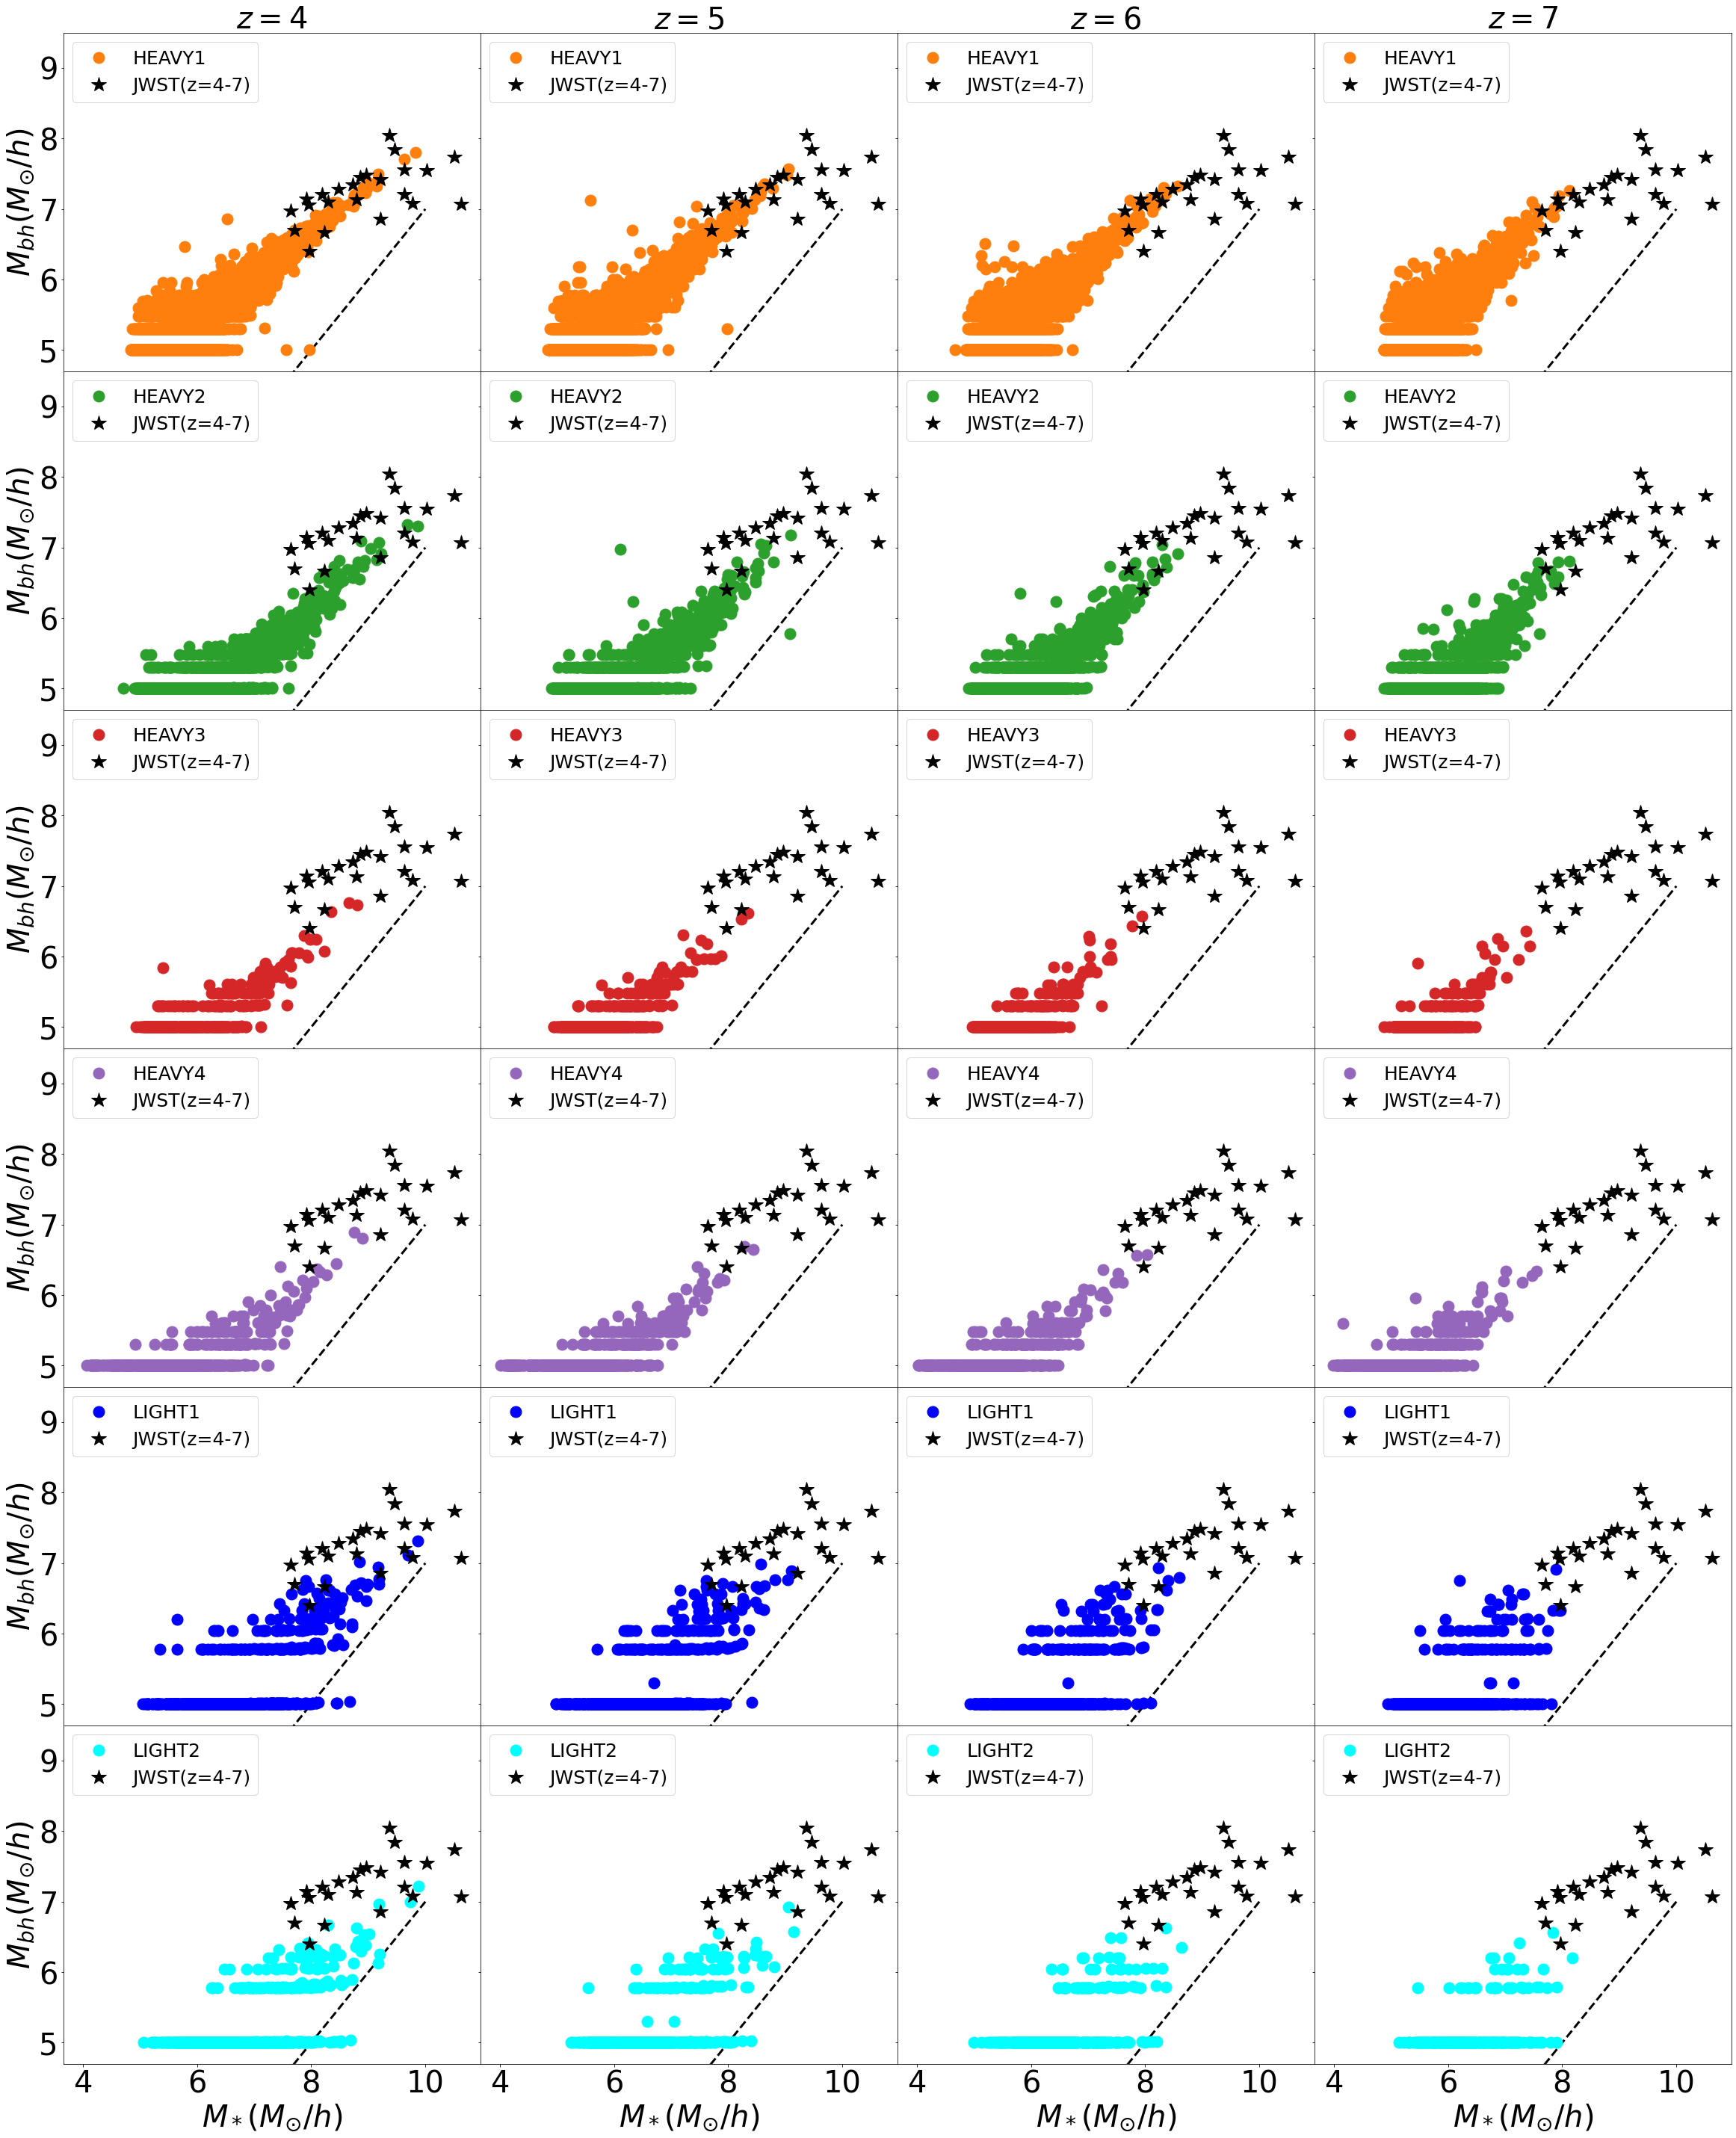

In [18]:
f,axx=plt.subplots(6,4,figsize=(40,50),sharey=True,sharex=True)


labl=''
levelmax=10
logseedmass=5.0  
Msfmp,Mh=5,1000


    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#make_plot(ax,col='blue',style='dashed')


i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[0,i]
    obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'C1','o','solid',obj,labl='HEAVY1',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)      
    i+=1
 
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[1,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C2','o','solid',obj,labl='HEAVY2',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1
    
    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L6p25n256///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[2,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C3','o','solid',obj,labl='HEAVY3',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1

    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L6p25n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [4,5,6,7]:
    obj=axx[3,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C4','o','solid',obj,labl='HEAVY4',ZOOM=0)
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25)       
    i+=1 
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)

for desired_redshift in [4,5,6,7]:
    obj=axx[4,i]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'blue','o','solid',obj,labl='LIGHT1',ZOOM=0)
    i+=1
    
    
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=40)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25) 
    
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)
labl=''
for desired_redshift in [4,5,6,7]:
    obj=axx[5,i]
    
    
    
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'cyan','o','solid',obj,labl='LIGHT2',ZOOM=0)
    i+=1
    
    
    obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=40)
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/arepo_code_development/observational_data/Pacucci_2023_mbh_mstar.txt')
    obj.errorbar(numpy.log10(10**data[:,0]*0.7),numpy.log10(10**data[:,1]*0.7),marker='*',linewidth=0,ms=20,color='black',label='JWST(z=4-7)')

    obj.legend(loc='upper left',fontsize=25) 
    
    




#                labl6=''

#                if(i==1)&(k==1):
                        #labl6='ReinesVolonteri15 ($z \sim 0$)'

#data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/volonteri.txt')
#ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='solid',color='C1',linewidth=2,label=labl6)

#if(i==1)&(k==1):
#    labl6='Moggorian+98 ($z \sim 0$)'

#                data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Maggorian1998.txt')
#                ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dashed',color='C1',linewidth=2,label=labl6)

#                if(i==1)&(j==1):
#                        labl6='Terrezas+15 ($z \sim 0$)'

#                data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Terrazas_2015.txt')
#                ax.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dotted',color='C1',linewidth=2,label=labl6)

    
    
axx[0,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

axx[1,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

axx[2,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

axx[3,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

axx[4,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

axx[5,0].set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)
#obj.set_xlabel('',fontsize=30)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/SM_BHM.png',bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Output_redshift is: 2.220446049250313e-16
Output_redshift is: 2.220446049250313e-16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Output_redshift is: 2.220446049250313e-16
Output_redshift is: 2.220446049250313e-16


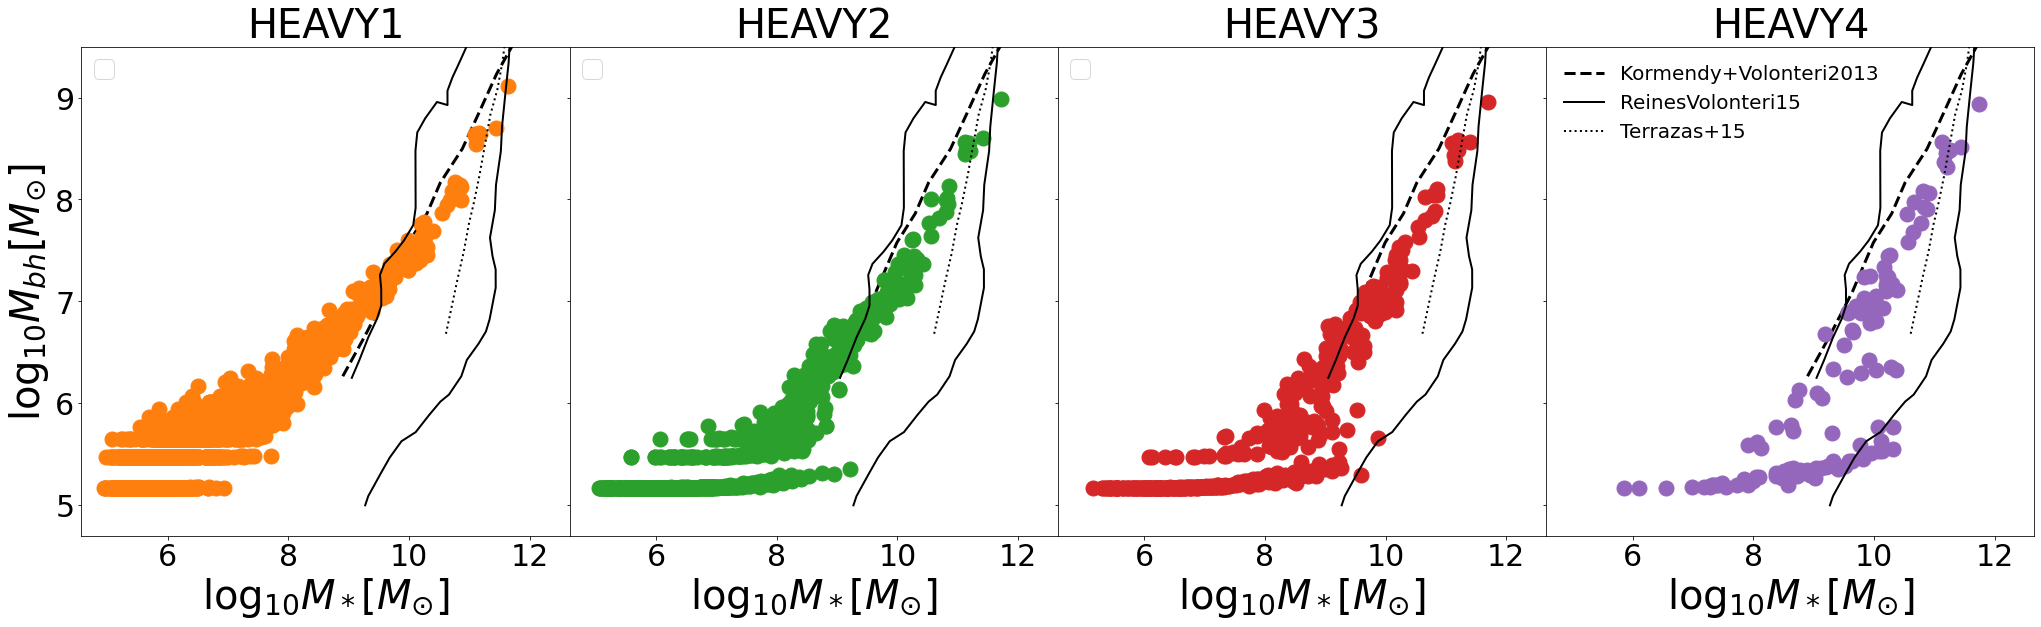

In [23]:
f,axx=plt.subplots(1,4,figsize=(35,9),sharey=True,sharex=True)


labl=''
levelmax=10
logseedmass=5.0  
Msfmp,Mh=5,1000


    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#make_plot(ax,col='blue',style='dashed')


i=0
for desired_redshift in [0]:
    obj=axx[0]
    obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'C1','o','solid',obj,labl='',ZOOM=0)
    #obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
     
    i+=1
 
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[1]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C2','o','solid',obj,labl='',ZOOM=0)
    #obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
     
    i+=1
    
    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[2]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C3','o','solid',obj,labl='',ZOOM=0)
     
    i+=1

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[3]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C4','o','solid',obj,labl='',ZOOM=0)
   
    i+=1 
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)
'''
for desired_redshift in [0]:
    obj=axx[4]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'blue','o','solid',obj,labl='LIGHT1',ZOOM=0)
    i+=1
    
    
 
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'

basePath=path_to_output+run+output
i=0

for desired_redshift in [0]:
    obj=axx[5]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'cyan','o','solid',obj,labl='LIGHT2',ZOOM=0)
    
    i+=1
    
'''
    
    
    

i=0
#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)
labl=''
for desired_redshift in [0,2,3,4]:
    obj=axx[i]
    
    labl6='ReinesVolonteri15'

    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/volonteri.txt')
    obj.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='solid',color='black',linewidth=2,label=labl6)

    #if(i==1)&(k==1):
    labl6='Moggorian+98'
    data=numpy.loadtxt('../observational_data/stellar_mass_bulge_mass_KoHo2013.txt')
    obj.plot(data[:,0],data[:,1],linestyle='dashed',linewidth=3,color='black',label='Kormendy+Volonteri2013') 

    #                if(i==1)&(j==1):
    labl6='Terrazas+15'
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Terrazas_2015.txt')
    obj.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dotted',color='black',linewidth=2,label=labl6)
    obj.tick_params(labelsize=30)
    i+=1
    

obj.legend(loc='upper left',fontsize=20,frameon=False)

axx[0].set_title('HEAVY1',fontsize=40)
axx[1].set_title('HEAVY2',fontsize=40)
axx[2].set_title('HEAVY3',fontsize=40)
axx[3].set_title('HEAVY4',fontsize=40)


axx[0].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)

axx[1].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)

axx[2].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)

axx[3].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)

#axx[4].set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)

#axx[5].set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)

axx[0].set_ylabel('$\log_{10}M_{bh}[M_{\odot}]$',fontsize=40)

#obj.set_xlabel('',fontsize=30)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/SM_BHM_z0.png',bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Output_redshift is: 2.220446049250313e-16
Output_redshift is: 2.220446049250313e-16


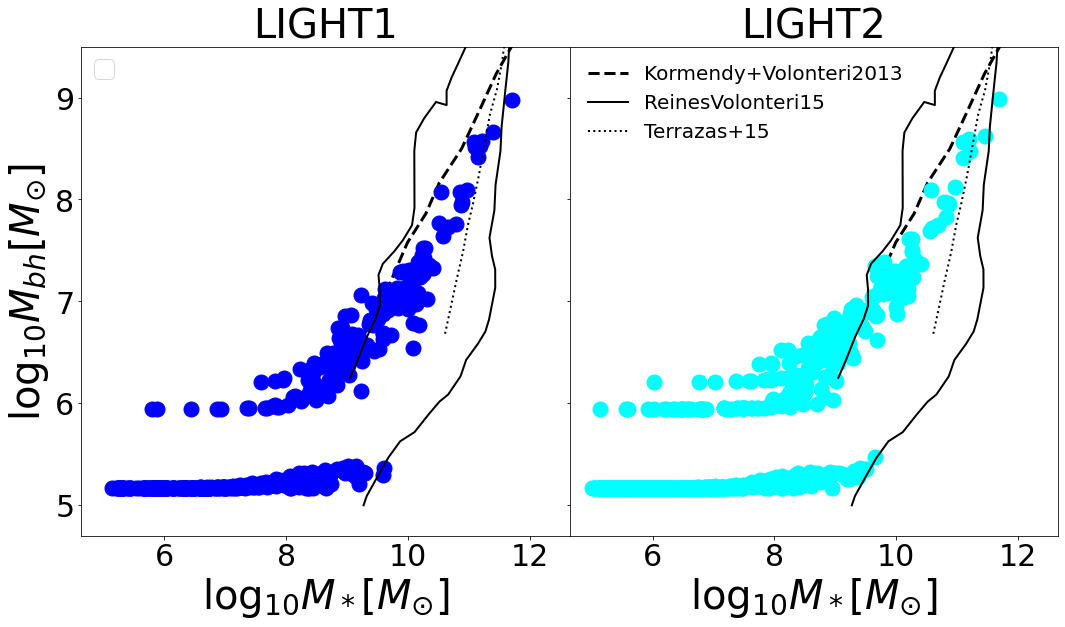

In [26]:
f,axx=plt.subplots(1,2,figsize=(17.5,9),sharey=True,sharex=True)


labl=''
levelmax=10
logseedmass=5.0  
Msfmp,Mh=5,1000


    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#make_plot(ax,col='blue',style='dashed')

'''
i=0
for desired_redshift in [0]:
    obj=axx[0]
    obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'C1','o','solid',obj,labl='',ZOOM=0)
    #obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
     
    i+=1
 
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[1]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C2','o','solid',obj,labl='',ZOOM=0)
    #obj.set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)
     
    i+=1
    
    
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[2]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C3','o','solid',obj,labl='',ZOOM=0)
     
    i+=1

path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output
i=0
for desired_redshift in [0]:
    obj=axx[3]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=30)
    make_plot(basePath, desired_redshift,'C4','o','solid',obj,labl='',ZOOM=0)
   
    i+=1 
'''    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output


i=0

#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)

for desired_redshift in [0]:
    obj=axx[0]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'blue','o','solid',obj,labl='',ZOOM=0)
    i+=1
    
    
 
    
path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'

basePath=path_to_output+run+output
i=0

for desired_redshift in [0]:
    obj=axx[1]
    #obj.set_title('$z=%d$'%desired_redshift,fontsize=40)
    make_plot(basePath, desired_redshift,'cyan','o','solid',obj,labl='',ZOOM=0)
    
    i+=1
    

    
    
    

i=0
#obj.text(6,7.5,r'$M_{\mathrm{seed}}=1\times10^{5} M_{\odot}/h$',fontsize=30)
labl=''
for desired_redshift in [0,2]:
    obj=axx[i]
    
    labl6='ReinesVolonteri15'

    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/volonteri.txt')
    obj.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='solid',color='black',linewidth=2,label=labl6)

    #if(i==1)&(k==1):
    labl6='Moggorian+98'
    data=numpy.loadtxt('../observational_data/stellar_mass_bulge_mass_KoHo2013.txt')
    obj.plot(data[:,0],data[:,1],linestyle='dashed',linewidth=3,color='black',label='Kormendy+Volonteri2013') 

    #                if(i==1)&(j==1):
    labl6='Terrazas+15'
    data=numpy.loadtxt('/home/aklantbhowmick/Aklant/observational_data/stellar_mass_bulge_mass_Terrazas_2015.txt')
    obj.errorbar(numpy.log10(10**data[:,0]),numpy.log10(10**data[:,1]),linestyle='dotted',color='black',linewidth=2,label=labl6)
    obj.tick_params(labelsize=30)
    i+=1
    

obj.legend(loc='upper left',fontsize=20,frameon=False)

axx[0].set_title('LIGHT1',fontsize=40)
axx[1].set_title('LIGHT2',fontsize=40)



axx[0].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)

axx[1].set_xlabel('$\log_{10}M_*[M_{\odot}]$',fontsize=40)



#axx[4].set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)

#axx[5].set_xlabel('$M_*(M_{\odot}/h)$',fontsize=30)

axx[0].set_ylabel('$\log_{10}M_{bh}[M_{\odot}]$',fontsize=40)

#obj.set_xlabel('',fontsize=30)

plt.subplots_adjust(hspace=0,wspace=0)

plt.savefig('./Paper7_figures/SM_BHM_z0_light.png',bbox_inches='tight')


3
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  22
3 8
[3.13157895 3.39473684 3.65789474 3.92105263 4.18421053 4.44736842
 4.71052632 4.97368421 5.23684211 5.5        5.76315789 6.02631579
 6.28947368 6.55263158 6.81578947 7.07894737 7.34210526 7.60526316
 7.86842105] [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 6.066e+03 1.154e+03 7.640e+02 3.840e+02 2.910e+02 1.310e+02 6.900e+01
 4.800e+01 2.400e+01 8.000e+00 3.000e+00 1.000e+00]
4
Desired redshift:  4
Output redshift:  4.0079451114652676
Output snapshot:  21
3 8
[3.13157895 3.39473684 3.65789474 3.92105263 4.18421053 4.44736842
 4.71052632 4.97368421 5.23684211 5.5        5.76315789 6.02631579
 6.28947368 6.55263158 6.81578947 7.07894737 7.34210526 7.60526316
 7.86842105] [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 8.082e+03 1.231e+03 8.430e+02 4.110e+02 2.790e+02 1.340e+02 7.800e+01
 3.900e+01 1.400e+01 9.000e+00 2.000e+00 1.000e+00]
5
Desired redsh

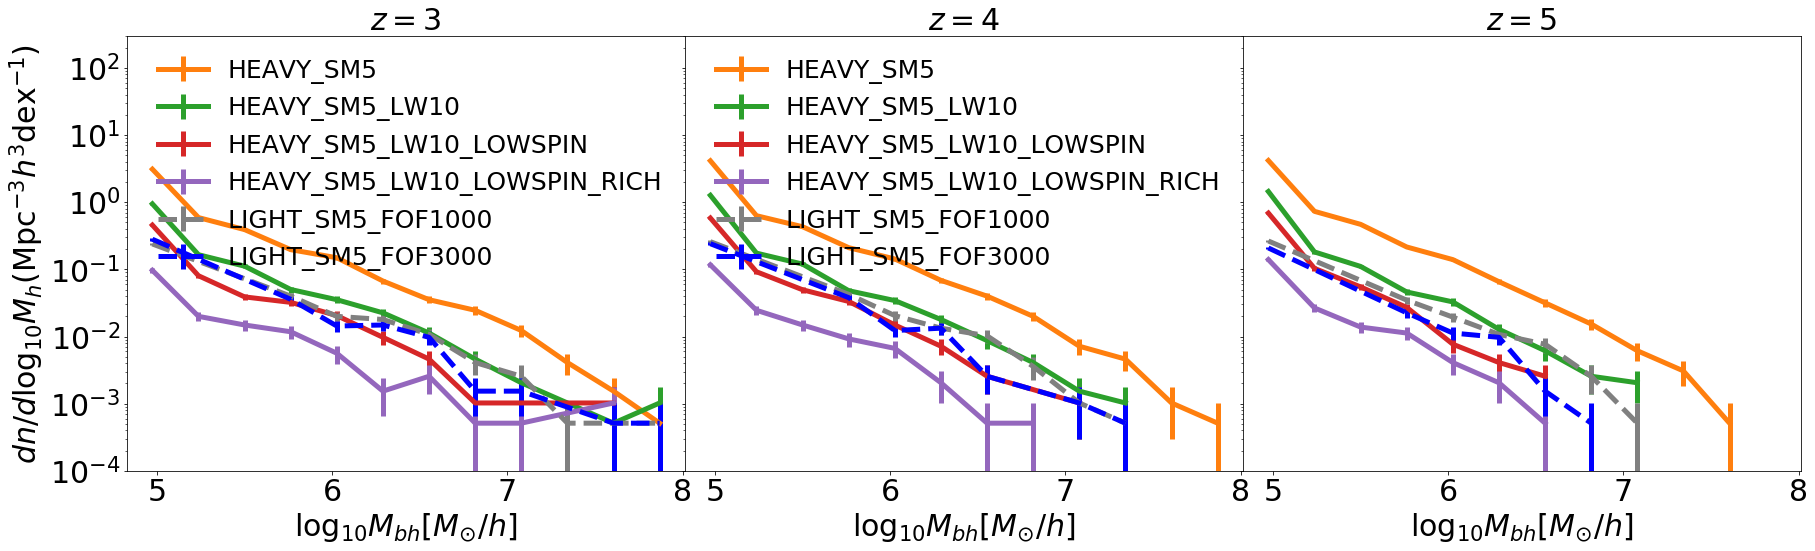

In [62]:
label_fontsize=30
def get_distribution(HM,Nbins,log_HM_min,log_HM_max,linear=0,cumulative=0,density=0):
    #print(HM)
    
    def extract(HM_min,HM_max):
        if (cumulative==1):
            mask=(HM>HM_min)
        else:
            mask=(HM>HM_min)&(HM<HM_max)
        return (HM_min+HM_max)/2,len(HM[mask])
    if (linear):
        HM_bin=numpy.linspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    else:
        HM_bin=numpy.logspace(log_HM_min,log_HM_max,Nbins,endpoint=True)
    out=[extract(HM_bin[i],HM_bin[i+1]) for i in range(0,len(HM_bin)-1)]
    #return out
    centers=numpy.array(list(zip(*out))[0])
    counts=numpy.array(list(zip(*out))[1])
    HMF=counts
    dHMF=numpy.sqrt(counts)
    norm=1.#sum(HMF)
    if (density==1):
        norm=numpy.diff(centers)[0]
    return centers,HMF/norm,dHMF/norm


def make_plot(ax,z_desired,basePath_cur,style='solid',col='black',width=6,log_mass_min=3.19,labl=' '):
    global Nbins, log_HM_min, log_HM_max
    redshift_space=[z_desired]

    BH_no_space=[]
    print(z_desired)
    
    boxsize=arepo_package.get_box_size(basePath_cur)/1e3

    for redshift in [z_desired]:
    

        BH_Mass,o=arepo_package.get_particle_property(basePath_cur,'BH_Mass',5,redshift)
        print(log_HM_min,log_HM_max)
        centers,HMF,dHMF=get_distribution(numpy.log10(BH_Mass*1e10), Nbins, log_HM_min, log_HM_max, linear=1,cumulative=0,density=0)
        #print(BH_Mass*1e10)
        print(centers,HMF)
        
        mask=(centers>log_mass_min)&(HMF>0)
        ax.errorbar(centers[mask],HMF[mask]/boxsize**3,dHMF[mask]/boxsize**3,linewidth=width,linestyle=style,color=col,label=labl,marker='',ms=15)
      
    
        ax.set_yscale('log')

        ax.tick_params(labelsize=label_fontsize)
        ax.set_xlabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=label_fontsize)


LogTargetGroupBHMass=5.00
levelmax_gas,logseedmass_gas=12,3.19
levelmax,logseedmass=12,3.19


f,axx=plt.subplots(1,3,figsize=(30,8),sharey=True,sharex=True)



def do(col='black',basePath_cur='.',style='solid',width=5,labl='',labl2=''):
    global Nbins, log_HM_min, log_HM_max
    i=0
    for z_desired in [3,4,5]:
        axx[i].set_title('$z=%d$'%z_desired,fontsize=30)
        Nbins, log_HM_min, log_HM_max = 20, 3, 8  
        log_mass_min=3.00


        if(z_desired==7):
            flabl=labl
        else:
            flabl=labl2

        make_plot(axx[i],z_desired,basePath_cur,col=col,width=width,log_mass_min=log_mass_min,labl=flabl,style=style)

      
        

        axx[i].set_ylim(1e-4,3e2)
        #axx[i,0].axvline(numpy.log10(2e4))
        
        i+=1
global Nbins, log_HM_min, log_HM_max

Msfmp,Mh=5,1000
j=0
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output        
do('C1',basePath_cur=basePath,labl='',labl2='HEAVY_SM5') 



j=0
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10/'
basePath=path_to_output+run+output        
do('C2',basePath_cur=basePath,labl='',labl2='HEAVY_SM5_LW10') 


j=0
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin/'
basePath=path_to_output+run+output        
do('C3',basePath_cur=basePath,labl='',labl2='HEAVY_SM5_LW10_LOWSPIN') 


j=0
path_to_output='/blue/lblecha/aklantbhowmick/CURRENT_RUNS2/L12p5n512///' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'
basePath=path_to_output+run+output        
do('C4',basePath_cur=basePath,labl='',labl2='HEAVY_SM5_LW10_LOWSPIN_RICH') 


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
do('grey',basePath_cur=basePath,style='dashed',labl='',labl2='LIGHT_SM5_FOF1000') 


path_to_output='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512//' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='/output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6/'
basePath=path_to_output+run+output
do('blue',basePath_cur=basePath,style='dashed',labl='',labl2='LIGHT_SM5_FOF3000') 





axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

axx[0].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)
axx[1].legend(loc='upper right',fontsize=label_fontsize-5,frameon=False)

#axx[0].set_ylabel('$dn/d\log_{10}M_h(\mathrm{Mpc}^{-3}h^{3}\mathrm{dex}^{-1})$',fontsize=label_fontsize)

plt.subplots_adjust(wspace=0)


plt.savefig('./Paper7_figures/mass_functions.png',bbox_inches='tight')





